In [170]:
old_df = pd.read_csv("russian-troll-tweets/tweets.csv")

In [4]:
df.shape

(203482, 16)

user_id -> check to see if any are in non-troll data set
user_key -> 
created at / created str -> use to filter in certain dates
RT count  ->  58000 not Nan
Retweeted -> 58000 not Nan
fav count -> 58000 not Nan

text  -> strip of RT (make new feature), strip hashtags, strip mentions, strip punctuation, check languages, 
tweed id  
source -> drop
hashtag -> look at distributions, expand into columns 
expanded urls -> drop

mentions ->  expand into columns
retweeted status id -> drop
in reply to status id -> drop


In [53]:
df.describe()

user_id    created_at  retweet_count  favorite_count  \
count  1.954170e+05  2.034610e+05   58083.000000    58083.000000   
mean   1.403567e+16  1.473183e+12      39.641909       35.495085   
std    1.017365e+17  1.698586e+10     290.904628      270.201692   
min    1.871082e+07  1.405361e+12       0.000000        0.000000   
25%    1.671235e+09  1.471270e+12       0.000000        0.000000   
50%    1.856829e+09  1.476888e+12       0.000000        0.000000   
75%    2.590038e+09  1.483194e+12       0.000000        0.000000   
max    7.892661e+17  1.506417e+12   20494.000000    26655.000000   

           tweet_id  retweeted_status_id  in_reply_to_status_id  
count  2.011680e+05         3.965100e+04           5.590000e+02  
mean   7.735202e+17         7.808826e+17           7.719047e+17  
std    7.106134e+16         2.034659e+16           1.993880e+16  
min    4.887460e+17         7.675590e+16           6.108386e+17  
25%    7.654796e+17         7.768833e+17           7.627307e+17  
50%    7.887575e+17         7.838451e+17           7.735847e+17  
75%    8.153402e+17         7.892722e+17           7.814269e+17  
max    9.126040e+17         8.927026e+17           8.009970e+17

In [54]:
df.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id'],
      dtype='object')

In [55]:
df.source.describe()

count                                                 58084
unique                                                   19
top       <a href="http://twitter.com" rel="nofollow">Tw...
freq                                                  42685
Name: source, dtype: object

In [56]:
df.posted.describe()

count     203482
unique         1
top       POSTED
freq      203482
Name: posted, dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203482 entries, 0 to 203481
Data columns (total 16 columns):
user_id                  195417 non-null float64
user_key                 203482 non-null object
created_at               203461 non-null float64
created_str              203461 non-null object
retweet_count            58083 non-null float64
retweeted                58083 non-null object
favorite_count           58083 non-null float64
text                     203461 non-null object
tweet_id                 201168 non-null float64
source                   58084 non-null object
hashtags                 203482 non-null object
expanded_urls            203482 non-null object
posted                   203482 non-null object
mentions                 203482 non-null object
retweeted_status_id      39651 non-null float64
in_reply_to_status_id    559 non-null float64
dtypes: float64(7), object(9)
memory usage: 24.8+ MB


In [32]:
df.drop(columns = ['expanded_urls', 'source', 'retweeted_status_id', 'in_reply_to_status_id'], inplace = True)

In [36]:
df['target'] = 1

In [43]:
df.to_csv("russian-troll-tweets/tweets_clean.csv")

In [42]:
df.drop(columns = ["posted"], inplace = True)

In [44]:
df.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'hashtags',
       'mentions', 'target'],
      dtype='object')

In [288]:
users_df = pd.read_csv("russian-troll-tweets/users.csv")

In [289]:
users_df.head()

id                       location              name  \
0   18710816.0  near Utah Ave & Lighthouse an    Robby Delaware   
1  100345056.0  still ⬆️Block⤵️Corner⬇️street  #Ezekiel2517✨...   
2  247165706.0                    Chicago, IL  B E C K S T E R✨   
3  249538861.0                            NaN     Chris Osborne   
4  449689677.0                            NaN    Рамзан Кадыров   

   followers_count  statuses_count                    time_zone verified lang  \
0            304.0         11484.0   Pacific Time (US & Canada)    False   en   
1           1053.0         31858.0                          NaN    False   en   
2            650.0          6742.0  Mountain Time (US & Canada)    False   en   
3             44.0           843.0                          NaN    False   en   
4          94773.0         10877.0                       Moscow    False   ru   

     screen_name                                        description  \
0  RobbyDelaware  I support the free movement of people, ideas a...   
1    SCOTTGOHARD  CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...   
2    Beckster319  Rebecca Lynn Hirschfeld Actress.Model.Writer.A...   
3  skatewake1994                                                NaN   
4  KadirovRussia  Пародийный аккаунт. Озвучиваю то, что политика...   

                       created_at  favourites_count  friends_count  \
0  Wed Jan 07 04:38:02 +0000 2009              17.0          670.0   
1  Tue Dec 29 23:15:22 +0000 2009            2774.0         1055.0   
2  Fri Feb 04 06:38:45 +0000 2011            7273.0          896.0   
3  Wed Feb 09 07:38:44 +0000 2011             227.0          154.0   
4  Thu Dec 29 11:31:09 +0000 2011               0.0            7.0   

   listed_count  
0          13.0  
1          35.0  
2          30.0  
3           1.0  
4         691.0

In [48]:
users_df.time_zone.isnull().sum()

85

In [49]:
len(users_df)

454

In [45]:
tweets_clean_df = pd.read_csv("russian-troll-tweets/tweets_clean.csv", index_col = 0)

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
tweets_clean_df.head()

user_id         user_key       created_at          created_str  \
0  1.868981e+09    ryanmaxwell_1  1458671502000.0  2016-03-22 18:31:42   
1  2.571870e+09  detroitdailynew  1476133020000.0  2016-10-10 20:57:00   
2  1.710805e+09       cookncooks  1487767423000.0  2017-02-22 12:43:43   
3  2.584153e+09     queenofthewo  1482764801000.0  2016-12-26 15:06:41   
4  1.768260e+09     mrclydepratt  1501986984000.0  2017-08-06 02:36:24   

   retweet_count retweeted  favorite_count  \
0            NaN       NaN             NaN   
1            0.0     False             0.0   
2            NaN       NaN             NaN   
3            NaN       NaN             NaN   
4            NaN       NaN             NaN   

                                                text      tweet_id  \
0  #IslamKills Are you trying to say that there w...  7.123460e+17   
1  Clinton: Trump should’ve apologized more, atta...  7.855849e+17   
2  RT @ltapoll: Who was/is the best president of ...  8.343832e+17   
3  RT @jww372: I don't have to guess your religio...  8.134006e+17   
4  RT @Shareblue: Pence and his lawyers decided w...  8.940243e+17   

               hashtags mentions  target  mentions_count  hashtags_count  
0          [IslamKills]       []     1.0               0               1  
1                    []       []     1.0               0               0  
2                    []       []     1.0               0               0  
3  [ChristmasAftermath]       []     1.0               0               1  
4                    []       []     1.0               0               0

In [47]:
def to_list(string):
    pattern = r"\"(.*?)\""
    if type(string) != str:
        return []
    items = re.findall(pattern, string)
    return items
def to_list_count(lst):
    return len(lst)

In [48]:
tweets_clean_df["hashtags"] = tweets_clean_df["hashtags"].apply(to_list)

In [52]:
tweets_clean_df["hashtags_count"] = tweets_clean_df["hashtags"].apply(to_list_count)

In [49]:
tweets_clean_df["mentions"] = tweets_clean_df["mentions"].apply(to_list)

In [50]:
tweets_clean_df["mentions_count"] = tweets_clean_df["mentions"].apply(to_list_count)

In [12]:
tweets_clean_df.dtypes

user_id           float64
user_key           object
created_at         object
created_str        object
retweet_count     float64
retweeted          object
favorite_count    float64
text               object
tweet_id          float64
hashtags           object
mentions           object
target            float64
dtype: object

In [ ]:
>>> df.apply(lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1)

In [55]:
from collections import Counter

In [57]:

hashtag_counter = Counter()
for row in tweets_clean_df["hashtags"]:
    for tag in row:
        hashtag_counter[tag] +=1
print(hashtag_counter)

Counter({'Politics': 3606, 'maga': 3078, 'Trump': 2425, 'tcot': 2365, 'news': 1973, 'NeverHillary': 1375, 'pjnet': 1275, 'TrumpPence16': 980, 'Trump2016': 947, 'MerkelMussBleiben': 796, 'Hillary': 758, 'TrumpTrain': 718, 'HillaryClinton': 704, 'CrookedHillary': 678, 'WakeUpAmerica': 660, 'RejectedDebateTopics': 656, 'CCOT': 600, 'Obama': 599, 'Blacklivesmatter': 581, '2A': 565, 'BetterAlternativeToDebates': 554, 'p2': 548, 'imwithher': 542, 'ThingsYouCantIgnore': 526, 'SurvivalGuideToThanksgiving': 519, 'IHaveARightToKnow': 511, 'ThingsMoreTrustedThanHillary': 496, 'Debate': 494, 'IdRunForPresidentIf': 494, 'ChristmasAftermath': 492, 'nowplaying': 481, 'Clinton': 479, 'MakeAmericaGreatAgain': 478, 'IslamKills': 477, 'RuinADinnerInOnePhrase': 473, 'RealLifeMagicSpells': 471, 'GiftIdeasForPoliticians': 459, 'MakeMeHateYouInOnePhrase': 450, 'TrumpForPresident': 447, 'GOP': 441, 'ElectionDay': 435, 'ItsRiskyTo': 434, 'debatenight': 415, '2016In4Words': 413, 'TrumpsFavoriteHeadline': 399, '

In [61]:
len(hashtag_counter)

12935

In [62]:
len([])

0

In [63]:
df=pd.read_csv('/Users/carolinevanacore/Downloads/all_tweets_.csv')

In [65]:
len(df)

886127

In [66]:
len(tweets_clean_df)

203489

In [67]:
df.head()

Unnamed: 0                     created_str  favorite_count  \
0  789250597266546688  Thu Oct 20 23:43:00 +0000 2016             0.0   
1  789250597526446080  Thu Oct 20 23:43:00 +0000 2016             1.0   
2  789250598004662272  Thu Oct 20 23:43:00 +0000 2016             2.0   
3  789250598017175552  Thu Oct 20 23:43:00 +0000 2016             0.0   
4  789250598239670273  Thu Oct 20 23:43:00 +0000 2016             0.0   

               hashtags lang                           mentions  \
0  ['Trump', 'Clinton']   es                                 []   
1                    []   es                                 []   
2      ['Election2016']   en                                 []   
3        ['nastywoman']   en  ['macsamurai', 'realDonaldTrump']   
4                    []   en                                 []   

   retweet_count retweeted                                               text  \
0            2.0     False  Las frases más contundentes del último debate ...   
1            0.0     False  Maestra de yoga acusa a Donald Trump de tocarl...   
2            7.0     False  Sharing selfies of completed ballots on social...   
3            8.0     False  RT @macsamurai: Perfectly accurate and succinc...   
4            0.0     False  So are yall going to watch the dinner?? I don'...   

       tweet_id       user_id  hashtags_count  mentions_count  
0  7.892506e+17  1.713000e+08               2               0  
1  7.892506e+17  1.413528e+09               0               0  
2  7.892506e+17  1.877762e+07               1               0  
3  7.892506e+17  3.497631e+07               1               2  
4  7.892506e+17  2.914066e+07               0               0

In [68]:
tweets_clean_df.head()

user_id         user_key       created_at          created_str  \
0  1.868981e+09    ryanmaxwell_1  1458671502000.0  2016-03-22 18:31:42   
1  2.571870e+09  detroitdailynew  1476133020000.0  2016-10-10 20:57:00   
2  1.710805e+09       cookncooks  1487767423000.0  2017-02-22 12:43:43   
3  2.584153e+09     queenofthewo  1482764801000.0  2016-12-26 15:06:41   
4  1.768260e+09     mrclydepratt  1501986984000.0  2017-08-06 02:36:24   

   retweet_count retweeted  favorite_count  \
0            NaN       NaN             NaN   
1            0.0     False             0.0   
2            NaN       NaN             NaN   
3            NaN       NaN             NaN   
4            NaN       NaN             NaN   

                                                text      tweet_id  \
0  #IslamKills Are you trying to say that there w...  7.123460e+17   
1  Clinton: Trump should’ve apologized more, atta...  7.855849e+17   
2  RT @ltapoll: Who was/is the best president of ...  8.343832e+17   
3  RT @jww372: I don't have to guess your religio...  8.134006e+17   
4  RT @Shareblue: Pence and his lawyers decided w...  8.940243e+17   

               hashtags mentions  target  mentions_count  hashtags_count  
0          [IslamKills]       []     1.0               0               1  
1                    []       []     1.0               0               0  
2                    []       []     1.0               0               0  
3  [ChristmasAftermath]       []     1.0               0               1  
4                    []       []     1.0               0               0

In [69]:
df.columns

Index(['Unnamed: 0', 'created_str', 'favorite_count', 'hashtags', 'lang',
       'mentions', 'retweet_count', 'retweeted', 'text', 'tweet_id', 'user_id',
       'hashtags_count', 'mentions_count'],
      dtype='object')

In [70]:
tweets_clean_df.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'hashtags',
       'mentions', 'target', 'mentions_count', 'hashtags_count'],
      dtype='object')

In [71]:
tweets_clean_df.to_csv('all_trolls.csv')

In [75]:
tweets_clean_df['tweet_id_str']=tweets_clean_df['tweet_id'].apply(lambda x: str(x))

In [76]:
df['tweet_id_str']=df['tweet_id'].apply(lambda x: str(x))

In [94]:
tweets_clean_df.tweet_id.isnull().sum()

2327

In [79]:
len(df)

886127

In [86]:
joined=df.join(tweets_clean_df,how='inner',on="tweet_id_str",lsuffix='_left',rsuffix='_right')

In [84]:
len(joined)

0

In [ ]:
trolls=tweets_clean_df.user_id

In [ ]:
tweets_clean_df.set_index("")

In [95]:
tweets_clean_df=tweets_clean_df[~tweets_clean_df.index.duplicated(keep='first')]



In [96]:
len(tweets_clean_df)

203488

In [100]:
tweets_clean_df = tweets_clean_df[~tweets_clean_df.tweet_id.duplicated(keep='first')]


In [104]:
df = df[~df.tweet_id.duplicated(keep='first')]


In [105]:
df.tweet_id.value_counts()

7.892919e+17    1
7.892587e+17    1
7.893349e+17    1
7.893337e+17    1
7.892971e+17    1
7.893306e+17    1
7.892945e+17    1
7.892856e+17    1
7.892930e+17    1
7.893268e+17    1
7.892902e+17    1
7.892889e+17    1
7.892883e+17    1
7.892868e+17    1
7.893364e+17    1
7.893903e+17    1
7.892839e+17    1
7.892550e+17    1
7.893868e+17    1
7.893865e+17    1
7.893847e+17    1
7.892785e+17    1
7.893827e+17    1
7.893822e+17    1
7.893801e+17    1
7.892736e+17    1
7.893352e+17    1
7.893369e+17    1
7.893028e+17    1
7.893388e+17    1
               ..
7.892713e+17    1
7.893376e+17    1
7.893143e+17    1
7.894019e+17    1
7.893077e+17    1
7.892595e+17    1
7.893058e+17    1
7.892696e+17    1
7.893010e+17    1
7.893460e+17    1
7.892991e+17    1
7.893169e+17    1
7.892676e+17    1
7.893619e+17    1
7.892653e+17    1
7.893632e+17    1
7.894113e+17    1
7.892643e+17    1
7.893464e+17    1
7.893858e+17    1
7.893393e+17    1
7.893456e+17    1
7.892629e+17    1
7.893251e+17    1
7.892531e+

In [108]:
#before: len(tweets_clean_df) = 203488
len(tweets_clean_df)
# 2832 duplicates

2832

In [267]:
# before: len(df) = 886127
len(df)
# 1140 duplicate tweets

884987

In [112]:
tweets_clean_df['user_id_str']=tweets_clean_df['user_id'].apply(lambda x: str(x))


In [111]:
df['user_id_str']=df['user_id'].apply(lambda x: str(x))

In [146]:
joined=df.join(tweets_clean_df,how='inner',on="user_id_str",lsuffix='_left',rsuffix='_right')


In [206]:
print(df.columns)
print(tweets_clean_df.columns)

Index(['Unnamed: 0', 'created_str', 'favorite_count', 'hashtags', 'lang',
       'mentions', 'retweet_count', 'retweeted', 'text', 'tweet_id', 'user_id',
       'hashtags_count', 'mentions_count', 'tweet_id_str', 'user_id_str'],
      dtype='object')
Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'hashtags',
       'mentions', 'target', 'mentions_count', 'hashtags_count',
       'tweet_id_str', 'user_id_str'],
      dtype='object')


In [147]:
len(joined)

0

In [120]:
df.dtypes

Unnamed: 0         object
created_str        object
favorite_count    float64
hashtags           object
lang               object
mentions           object
retweet_count     float64
retweeted          object
text               object
tweet_id          float64
user_id           float64
hashtags_count      int64
mentions_count      int64
tweet_id_str       object
user_id_str        object
dtype: object

In [150]:
df.head()

Unnamed: 0                     created_str  favorite_count  \
0  789250597266546688  Thu Oct 20 23:43:00 +0000 2016             0.0   
1  789250597526446080  Thu Oct 20 23:43:00 +0000 2016             1.0   
2  789250598004662272  Thu Oct 20 23:43:00 +0000 2016             2.0   
3  789250598017175552  Thu Oct 20 23:43:00 +0000 2016             0.0   
4  789250598239670273  Thu Oct 20 23:43:00 +0000 2016             0.0   

               hashtags lang                           mentions  \
0  ['Trump', 'Clinton']   es                                 []   
1                    []   es                                 []   
2      ['Election2016']   en                                 []   
3        ['nastywoman']   en  ['macsamurai', 'realDonaldTrump']   
4                    []   en                                 []   

   retweet_count retweeted                                               text  \
0            2.0     False  Las frases más contundentes del último debate ...   
1            0.0     False  Maestra de yoga acusa a Donald Trump de tocarl...   
2            7.0     False  Sharing selfies of completed ballots on social...   
3            8.0     False  RT @macsamurai: Perfectly accurate and succinc...   
4            0.0     False  So are yall going to watch the dinner?? I don'...   

       tweet_id       user_id  hashtags_count  mentions_count  \
0  7.892506e+17  1.713000e+08               2               0   
1  7.892506e+17  1.413528e+09               0               0   
2  7.892506e+17  1.877762e+07               1               0   
3  7.892506e+17  3.497631e+07               1               2   
4  7.892506e+17  2.914066e+07               0               0   

            tweet_id_str   user_id_str  
0  7.892505972665466e+17   171299971.0  
1  7.892505975264461e+17  1413528254.0  
2  7.892505980046623e+17    18777618.0  
3  7.892505980171756e+17    34976306.0  
4  7.892505982396703e+17    29140658.0

In [200]:
joined = pd.concat([tweets_clean_df, df])

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [203]:
joined

Unnamed: 0       created_at                     created_str  \
0                      NaN  1458671502000.0             2016-03-22 18:31:42   
1                      NaN  1476133020000.0             2016-10-10 20:57:00   
2                      NaN  1487767423000.0             2017-02-22 12:43:43   
3                      NaN  1482764801000.0             2016-12-26 15:06:41   
4                      NaN  1501986984000.0             2017-08-06 02:36:24   
5                      NaN  1477496038000.0             2016-10-26 15:33:58   
6                      NaN  1488910304000.0             2017-03-07 18:11:44   
7                      NaN  1483102170000.0             2016-12-30 12:49:30   
8                      NaN  1477792099000.0             2016-10-30 01:48:19   
9                      NaN  1458155259000.0             2016-03-16 19:07:39   
10                     NaN  1484149609000.0             2017-01-11 15:46:49   
11                     NaN  1481542991000.0             2016-12-12 11:43:11   
12                     NaN  1433968411000.0             2015-06-10 20:33:31   
13                     NaN  1472608162000.0             2016-08-31 01:49:22   
14                     NaN  1485161965000.0             2017-01-23 08:59:25   
15                     NaN  1483543947000.0             2017-01-04 15:32:27   
16                     NaN  1474326703000.0             2016-09-19 23:11:43   
17                     NaN  1484130978000.0             2017-01-11 10:36:18   
18                     NaN  1436752640000.0             2015-07-13 01:57:20   
19                     NaN  1486635977000.0             2017-02-09 10:26:17   
20                     NaN  1469631339000.0             2016-07-27 14:55:39   
21                     NaN  1477819768000.0             2016-10-30 09:29:28   
22                     NaN  1427390992000.0             2015-03-26 17:29:52   
23                     NaN  1487229625000.0             2017-02-16 07:20:25   
24                     NaN  1495796393000.0             2017-05-26 10:59:53   
25                     NaN  1461346800000.0             2016-04-22 17:40:00   
26                     NaN  1458657994000.0             2016-03-22 14:46:34   
27                     NaN  1421226011000.0             2015-01-14 09:00:11   
28                     NaN  1477053053000.0             2016-10-21 12:30:53   
29                     NaN  1478969696000.0             2016-11-12 16:54:56   
...                    ...              ...                             ...   
886097  789425055323267072              NaN  Fri Oct 21 11:16:14 +0000 2016   
886098  789425055797088257              NaN  Fri Oct 21 11:16:14 +0000 2016   
886099  789424768047013889              NaN  Fri Oct 21 11:15:06 +0000 2016   
886100  789425344545562625              NaN  Fri Oct 21 11:17:23 +0000 2016   
886101  789425345199951872              NaN  Fri Oct 21 11:17:23 +0000 2016   
886102  789425340682821632              NaN  Fri Oct 21 11:17:22 +0000 2016   
886103  789425048838926336              NaN  Fri Oct 21 11:16:13 +0000 2016   
886104  789425056585752576              NaN  Fri Oct 21 11:16:14 +0000 2016   
886105  789425345661399044              NaN  Fri Oct 21 11:17:23 +0000 2016   
886106  789424767661146112              NaN  Fri Oct 21 11:15:06 +0000 2016   
886107  789425047295320064              NaN  Fri Oct 21 11:16:12 +0000 2016   
886108  789424767682088960              NaN  Fri Oct 21 11:15:06 +0000 2016   
886109  789425057328164864              NaN  Fri Oct 21 11:16:15 +0000 2016   
886110  789425055600152576              NaN  Fri Oct 21 11:16:14 +0000 2016   
886111  789424484243611648              NaN  Fri Oct 21 11:13:58 +0000 2016   
886112  789425050793480193              NaN  Fri Oct 21 11:16:13 +0000 2016   
886113  789424766679674880              NaN  Fri Oct 21 11:15:05 +0000 2016   
886114  789425053410680832              NaN  Fri Oct 21 11:16:14 +0000 2016   
886115  789425340942876672              NaN  Fri Oct 21 11:17:22 +

In [234]:
len_joined = len(joined)
len_joined

1085643

In [235]:
new_joined = joined[~joined.tweet_id.duplicated(keep='first')]

In [236]:
len(new_joined)

1085642

In [168]:
df.tweet_id[0]

7.892505972665466e+17

In [166]:
type(df["Unnamed: 0"][0])

str

In [167]:
float(df["Unnamed: 0"][0])

7.892505972665467e+17

In [242]:
joined.tweet_id.isnull().sum()

2

In [254]:
df_dup_removed = df[~df.user_id.duplicated(keep='first')]

In [255]:
tweets_clean_df_dup_removed = tweets_clean_df[~tweets_clean_df.user_id.duplicated(keep='first')]


In [256]:
joined_dup_removed = pd.concat([tweets_clean_df_dup_removed, df_dup_removed])

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [257]:
len(joined_dup_removed)

331426

In [264]:
joined_dup_removed.user_id.value_counts()

3.355441e+07    1
2.826402e+07    1
3.500582e+08    1
7.035433e+17    1
3.046505e+07    1
1.400239e+09    1
7.759218e+17    1
2.800496e+09    1
7.001252e+08    1
2.992339e+09    1
8.751614e+07    1
2.424658e+08    1
4.375822e+07    1
3.104780e+08    1
7.045099e+17    1
7.001352e+08    1
4.375860e+07    1
3.004767e+08    1
2.187948e+07    1
3.500578e+08    1
3.500567e+08    1
1.400225e+09    1
1.400189e+09    1
1.536538e+09    1
1.400173e+09    1
2.800358e+09    1
3.500454e+08    1
8.751145e+07    1
2.187790e+07    1
3.500472e+08    1
               ..
2.265839e+09    1
2.987213e+08    1
1.094302e+08    1
1.550085e+08    1
7.500255e+17    1
2.594906e+09    1
7.892349e+17    1
1.094316e+08    1
7.315444e+17    1
1.025042e+08    1
2.735675e+07    1
7.939324e+08    1
1.408142e+08    1
2.150169e+08    1
1.094229e+08    1
1.104622e+09    1
2.163751e+09    1
3.501557e+09    1
8.753909e+08    1
2.495893e+07    1
4.376973e+08    1
5.471343e+07    1
5.471239e+07    1
6.839062e+06    1
7.747772e+

In [258]:
joined_dup_removed_dup_removed = joined_dup_removed[~joined_dup_removed.user_id.duplicated(keep='first')]


In [259]:
len(joined_dup_removed_dup_removed)

331425

In [252]:
joined.user_id.value_counts()

1.679279e+09    9262
1.671235e+09    6805
2.882014e+09    6578
2.671070e+09    4131
4.508631e+09    3571
1.727482e+09    3328
1.768260e+09    3261
1.868496e+09    3260
1.658421e+09    3213
1.655194e+09    3210
2.572058e+09    3200
1.684524e+09    3196
1.658203e+09    3194
1.623180e+09    3178
1.660771e+09    3174
1.676481e+09    3168
1.694026e+09    3158
1.680366e+09    3155
1.649967e+09    3139
1.690488e+09    3136
1.710805e+09    3124
1.833224e+09    3121
1.617939e+09    3055
2.496600e+09    3018
4.224730e+09    3014
2.589354e+09    2998
2.541946e+09    2993
2.531160e+09    2982
2.584153e+09    2977
2.532612e+09    2957
                ... 
3.180267e+09       1
3.180711e+09       1
7.885115e+17       1
3.180692e+09       1
1.987915e+08       1
1.987885e+08       1
3.180612e+09       1
3.180559e+09       1
3.180496e+09       1
3.180485e+09       1
7.892823e+17       1
3.180428e+09       1
3.180394e+09       1
7.892847e+17       1
3.180263e+09       1
3.179962e+09       1
1.987632e+08 

In [244]:
joined[joined.tweet_id.isnull()]

Unnamed: 0       created_at                     created_str  \
36                   NaN  1432407603000.0             2015-05-23 19:00:03   
6591  789251429403942912              NaN  Thu Oct 20 23:46:19 +0000 2016   

      favorite_count                     hashtags  hashtags_count lang  \
36               NaN  [SearchesGoogleIsAshamedOf]               1  NaN   
6591             0.0                           []               0   en   

                        mentions  mentions_count  retweet_count retweeted  \
36                            []               0            NaN       NaN   
6591  ['CNN', 'realDonaldTrump']               2            0.0     False   

      target                                               text  tweet_id  \
36       1.0  tired of kids how to get rid  #SearchesGoogleI...       NaN   
6591     NaN                             @CNN @realDonaldTrump        NaN   

     tweet_id_str  user_id user_id_str     user_key  
36            nan      NaN         nan  kristyanann  
6591          nan      NaN         nan          NaN

In [245]:
df[df.tweet_id.isnull()]

Unnamed: 0                     created_str  favorite_count  \
6591  789251429403942912  Thu Oct 20 23:46:19 +0000 2016             0.0   

     hashtags lang                    mentions  retweet_count retweeted  \
6591       []   en  ['CNN', 'realDonaldTrump']            0.0     False   

                        text  tweet_id  user_id  hashtags_count  \
6591  @CNN @realDonaldTrump        NaN      NaN               0   

      mentions_count tweet_id_str user_id_str  
6591               2          nan         nan

In [246]:
df.columns

Index(['Unnamed: 0', 'created_str', 'favorite_count', 'hashtags', 'lang',
       'mentions', 'retweet_count', 'retweeted', 'text', 'tweet_id', 'user_id',
       'hashtags_count', 'mentions_count', 'tweet_id_str', 'user_id_str'],
      dtype='object')

In [251]:
df.dtypes

Unnamed: 0         object
created_str        object
favorite_count    float64
hashtags           object
lang               object
mentions           object
retweet_count     float64
retweeted          object
text               object
tweet_id          float64
user_id           float64
hashtags_count      int64
mentions_count      int64
tweet_id_str       object
user_id_str        object
dtype: object

In [247]:
tweets_clean_df.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'hashtags',
       'mentions', 'target', 'mentions_count', 'hashtags_count',
       'tweet_id_str', 'user_id_str'],
      dtype='object')

In [271]:
non_troll_data = df.drop(columns = ["Unnamed: 0", "tweet_id_str", "tweet_id", "user_id", "user_id_str"])



In [379]:
non_troll_data.columns

Index(['created_str', 'favorite_count', 'hashtags', 'lang', 'mentions',
       'retweet_count', 'retweeted', 'text', 'hashtags_count',
       'mentions_count', 'target', 'date_time'],
      dtype='object')

In [272]:
non_troll_data['target'] = 0

In [284]:
non_troll_data.isnull().sum()

created_str       0
favorite_count    0
hashtags          0
lang              0
mentions          0
retweet_count     0
retweeted         0
text              0
hashtags_count    0
mentions_count    0
target            0
dtype: int64

In [295]:
users_df.isnull().sum()

id                   61
location            169
name                 70
followers_count      70
statuses_count       70
time_zone            85
verified             70
lang                 70
screen_name           0
description         115
created_at           70
favourites_count     70
friends_count        70
listed_count         70
dtype: int64

In [298]:
tweets_clean_df[tweets_clean_df['user_key'] in users_df[users_df.lang.isnull()].screen_name]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [299]:
users_df_lang = users_df[["screen_name", "lang"]]

In [302]:
users_df_lang.rename(columns = {"screen_name" : "user_key"}, inplace = True)

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [303]:
users_df_lang.columns

Index(['user_key', 'lang'], dtype='object')

In [555]:
troll_data = tweets_clean_df.merge(users_df_lang, on = "user_key", how = "left")

In [560]:
type(troll_data.hashtags[0][0])

str

In [335]:
len(tweets_clean_df)

200656

In [534]:
len(troll_data)

200656

In [336]:
len(troll_data)

200656

In [307]:
users_df_lang.dtypes

user_key    object
lang        object
dtype: object

In [327]:
tweets_clean_df.user_key.dtypes

dtype('O')

In [325]:
for item in tweets_clean_df.user_key:
    if type(item) == str:
        print(item, type(item))

ryanmaxwell_1 <class 'str'>
detroitdailynew <class 'str'>
cookncooks <class 'str'>
queenofthewo <class 'str'>
mrclydepratt <class 'str'>
giselleevns <class 'str'>
baobaeham <class 'str'>
judelambertusa <class 'str'>
ameliebaldwin <class 'str'>
hiimkhloe <class 'str'>
jasper_fly <class 'str'>
patriotblake <class 'str'>
anthonywoodboy <class 'str'>
pamela_moore13 <class 'str'>
laurabaeley <class 'str'>
giselleevns <class 'str'>
pamela_moore13 <class 'str'>
brianaregland <class 'str'>
patriotraphael <class 'str'>
hyddrox <class 'str'>
kansasdailynews <class 'str'>
ilovesarahrich <class 'str'>
evewebster373 <class 'str'>
patriotblake <class 'str'>
margarethkurz <class 'str'>
malloryjared <class 'str'>
michellearry <class 'str'>
_billy_moyer_ <class 'str'>
giselleevns <class 'str'>
jacquelinisbest <class 'str'>
heyits_toby <class 'str'>
paulinett <class 'str'>
giselleevns <class 'str'>
judelambertusa <class 'str'>
melvinsroberts <class 'str'>
laurabaeley <class 'str'>
kristyanann <class 'st

emileewaren <class 'str'>
patriotblake <class 'str'>
nataturn <class 'str'>
anthonywoodboy <class 'str'>
hiimkhloe <class 'str'>
traceyhappymom <class 'str'>
kathiemrr <class 'str'>
leroylovesusa <class 'str'>
dorothiebell <class 'str'>
paulinett <class 'str'>
traceyhappymom <class 'str'>
nataturn <class 'str'>
traceyhappymom <class 'str'>
happkendrahappy <class 'str'>
pamela_moore13 <class 'str'>
peterkistner <class 'str'>
mil0blake <class 'str'>
finley1589 <class 'str'>
sternandreas404 <class 'str'>
willisbonnerr <class 'str'>
dorothiebell <class 'str'>
jasper_fly <class 'str'>
finley1589 <class 'str'>
hyddrox <class 'str'>
_billy_moyer_ <class 'str'>
cynthiamhunter <class 'str'>
melanymelanin <class 'str'>
malloryjared <class 'str'>
ten_gop <class 'str'>
thefoundingson <class 'str'>
traceyhappymom <class 'str'>
cassieweltch <class 'str'>
jacquelinisbest <class 'str'>
traceyhappymom <class 'str'>
drmichaelgarcia <class 'str'>
mr_clampin <class 'str'>
puredavie <class 'str'>
giselleev

patriotblake <class 'str'>
hiimkhloe <class 'str'>
puredavie <class 'str'>
judelambertusa <class 'str'>
garrettsimpson_ <class 'str'>
queenofthewo <class 'str'>
michellearry <class 'str'>
_nickluna_ <class 'str'>
hyddrox <class 'str'>
jasper_fly <class 'str'>
krasilnikovbor <class 'str'>
baobaeham <class 'str'>
melvinsroberts <class 'str'>
jacquelinisbest <class 'str'>
emileewaren <class 'str'>
ameliebaldwin <class 'str'>
youjustctrlc <class 'str'>
drmichaelgarcia <class 'str'>
tpartynews <class 'str'>
malloryjared <class 'str'>
cassishere <class 'str'>
puredavie <class 'str'>
patriotraphael <class 'str'>
mr_clampin <class 'str'>
logan_whatsup <class 'str'>
evagreen69 <class 'str'>
mr_clampin <class 'str'>
willisbonnerr <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
baobaeham <class 'str'>
michellearry <class 'str'>
thefoundingson <class 'str'>
kateritterrrr <class 'str'>
paulinett <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
brianaregland <class 'str'

laurabaeley <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
laurabaeley <class 'str'>
hyddrox <class 'str'>
notritahart <class 'str'>
ameliebaldwin <class 'str'>
evewebster373 <class 'str'>
batonrougevoice <class 'str'>
notritahart <class 'str'>
alecmooooody <class 'str'>
johnbranchh <class 'str'>
emileewaren <class 'str'>
hollandpatrickk <class 'str'>
pamblmdaniels <class 'str'>
tpartynews <class 'str'>
newspeakdaily <class 'str'>
patriotblake <class 'str'>
anthonywoodboy <class 'str'>
baltimore0nline <class 'str'>
ameliebaldwin <class 'str'>
dorothiebell <class 'str'>
traceyhappymom <class 'str'>
chicagodailynew <class 'str'>
hyddrox <class 'str'>
jassscott <class 'str'>
thefoundingson <class 'str'>
ameliebaldwin <class 'str'>
paulinett <class 'str'>
garrettsimpson_ <class 'str'>
dorothiebell <class 'str'>
cookncooks <class 'str'>
willisbonnerr <class 'str'>
finley1589 <class 'str'>
watchmewalkin <class 'str'>
emileewaren <class 'str'>
notritahart <class 'str'>
finley15

thefoundingson <class 'str'>
giselleevns <class 'str'>
redlanews <class 'str'>
dorothiebell <class 'str'>
_nickluna_ <class 'str'>
hyddrox <class 'str'>
laurabaeley <class 'str'>
malloryjared <class 'str'>
jeffreykahunas <class 'str'>
jacquelinisbest <class 'str'>
jeannemccarthy0 <class 'str'>
ameliebaldwin <class 'str'>
todaybostonma <class 'str'>
kathiemrr <class 'str'>
giselleevns <class 'str'>
tpartynews <class 'str'>
mr_clampin <class 'str'>
chesplayschess <class 'str'>
traceyhappymom <class 'str'>
paolakinck <class 'str'>
michellearry <class 'str'>
watchmewalkin <class 'str'>
notritahart <class 'str'>
hiimkhloe <class 'str'>
kathiemrr <class 'str'>
giselleevns <class 'str'>
malloryjared <class 'str'>
jeffreykahunas <class 'str'>
giselleevns <class 'str'>
priceforpierce <class 'str'>
hollydler <class 'str'>
redlanews <class 'str'>
brianaregland <class 'str'>
c__wells <class 'str'>
ameliebaldwin <class 'str'>
laurabaeley <class 'str'>
garrettsimpson_ <class 'str'>
ameliebaldwin <cl

ryanmaxwell_1 <class 'str'>
datwisenigga <class 'str'>
crystal1johnson <class 'str'>
giselleevns <class 'str'>
queenofthewo <class 'str'>
daileyjadon <class 'str'>
margarethkurz <class 'str'>
drmichaelgarcia <class 'str'>
giselleevns <class 'str'>
mil0blake <class 'str'>
anthonywoodboy <class 'str'>
heyits_toby <class 'str'>
cassieweltch <class 'str'>
cassieweltch <class 'str'>
hollydler <class 'str'>
melvinsroberts <class 'str'>
camosaseko <class 'str'>
phoenixdailynew <class 'str'>
cynthiamhunter <class 'str'>
usa_gunslinger <class 'str'>
evagreen69 <class 'str'>
usa_gunslinger <class 'str'>
zzzacharyzzz <class 'str'>
baobaeham <class 'str'>
jasper_fly <class 'str'>
kenzdonovan <class 'str'>
ameliebaldwin <class 'str'>
jasper_fly <class 'str'>
lazykstafford <class 'str'>
blacktolive <class 'str'>
pamela_moore13 <class 'str'>
johnbranchh <class 'str'>
jeannemccarthy0 <class 'str'>
usa_gunslinger <class 'str'>
alecmooooody <class 'str'>
ameliebaldwin <class 'str'>
judelambertusa <class

prettylaraplace <class 'str'>
heyits_toby <class 'str'>
ameliebaldwin <class 'str'>
klara_sauber <class 'str'>
batonrougevoice <class 'str'>
heyits_toby <class 'str'>
judelambertusa <class 'str'>
garrettsimpson_ <class 'str'>
notritahart <class 'str'>
paulinett <class 'str'>
thefoundingson <class 'str'>
iiddaamarks <class 'str'>
pamela_moore13 <class 'str'>
leroylovesusa <class 'str'>
evagreen69 <class 'str'>
evagreen69 <class 'str'>
jacquelinisbest <class 'str'>
thefoundingson <class 'str'>
evagreen69 <class 'str'>
laurabaeley <class 'str'>
cassishere <class 'str'>
melvinsroberts <class 'str'>
sternandreas404 <class 'str'>
ten_gop <class 'str'>
mr_clampin <class 'str'>
giselleevns <class 'str'>
willisbonnerr <class 'str'>
mrclydepratt <class 'str'>
prettylaraplace <class 'str'>
jeffreykahunas <class 'str'>
heyits_toby <class 'str'>
newspeakdaily <class 'str'>
willisbonnerr <class 'str'>
kathiemrr <class 'str'>
willisbonnerr <class 'str'>
brianaregland <class 'str'>
notritahart <class 

cannonsher <class 'str'>
ryanmaxwell_1 <class 'str'>
evewebster373 <class 'str'>
hyddrox <class 'str'>
_nickluna_ <class 'str'>
ten_gop <class 'str'>
evewebster373 <class 'str'>
newspeakdaily <class 'str'>
datwisenigga <class 'str'>
notritahart <class 'str'>
johnbranchh <class 'str'>
ameliebaldwin <class 'str'>
melvinsroberts <class 'str'>
cassieweltch <class 'str'>
jeannemccarthy0 <class 'str'>
logan_whatsup <class 'str'>
heyheyhailey <class 'str'>
leroylovesusa <class 'str'>
baobaeham <class 'str'>
patriotka_rusi <class 'str'>
giselleevns <class 'str'>
thefoundingson <class 'str'>
ameliebaldwin <class 'str'>
marianeuberg1 <class 'str'>
garrettsimpson_ <class 'str'>
puredavie <class 'str'>
dorothiebell <class 'str'>
heyits_toby <class 'str'>
laurabaeley <class 'str'>
blacktolive <class 'str'>
mr_clampin <class 'str'>
leroylovesusa <class 'str'>
margarethkurz <class 'str'>
lazykstafford <class 'str'>
baobaeham <class 'str'>
tpartynews <class 'str'>
datwisenigga <class 'str'>
kateritter

michellearry <class 'str'>
emileewaren <class 'str'>
dorothiebell <class 'str'>
jacquelinisbest <class 'str'>
micparrish <class 'str'>
ten_gop <class 'str'>
baobaeham <class 'str'>
traceyhappymom <class 'str'>
leroylovesusa <class 'str'>
priceforpierce <class 'str'>
traceyhappymom <class 'str'>
notritahart <class 'str'>
peterkistner <class 'str'>
hyddrox <class 'str'>
lazykstafford <class 'str'>
notritahart <class 'str'>
queenofthewo <class 'str'>
giselleevns <class 'str'>
todaycincinnati <class 'str'>
baobaeham <class 'str'>
paolakinck <class 'str'>
puredavie <class 'str'>
queenofthewo <class 'str'>
kenzdonovan <class 'str'>
ameliebaldwin <class 'str'>
jasper_fly <class 'str'>
ryanmaxwell_1 <class 'str'>
lazykstafford <class 'str'>
traceyhappymom <class 'str'>
daileyjadon <class 'str'>
sternandreas404 <class 'str'>
ameliebaldwin <class 'str'>
baobaeham <class 'str'>
alecmooooody <class 'str'>
mr_clampin <class 'str'>
mrclydepratt <class 'str'>
giselleevns <class 'str'>
garrettsimpson_

batonrougevoice <class 'str'>
jacquelinisbest <class 'str'>
melanymelanin <class 'str'>
hollandpatrickk <class 'str'>
lazykstafford <class 'str'>
hyddrox <class 'str'>
carriethornthon <class 'str'>
willisbonnerr <class 'str'>
todaymiami <class 'str'>
drmichaelgarcia <class 'str'>
daileyjadon <class 'str'>
klara_sauber <class 'str'>
mil0blake <class 'str'>
paulinett <class 'str'>
willisbonnerr <class 'str'>
mil0blake <class 'str'>
hyddrox <class 'str'>
thefoundingson <class 'str'>
ameliebaldwin <class 'str'>
melanymelanin <class 'str'>
laurabaeley <class 'str'>
finley1589 <class 'str'>
michellearry <class 'str'>
datwisenigga <class 'str'>
thefoundingson <class 'str'>
heyits_toby <class 'str'>
ten_gop <class 'str'>
kansasdailynews <class 'str'>
hyddrox <class 'str'>
evagreen69 <class 'str'>
brianaregland <class 'str'>
patriotblake <class 'str'>
worldnewspoli <class 'str'>
ten_gop <class 'str'>
kathiemrr <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
michellearry <clas

brianthelifter <class 'str'>
puredavie <class 'str'>
rosieonfleek <class 'str'>
paulinett <class 'str'>
mr_clampin <class 'str'>
jamie_mccarthy_ <class 'str'>
jerstoner <class 'str'>
lazykstafford <class 'str'>
cookncooks <class 'str'>
ten_gop <class 'str'>
queenofthewo <class 'str'>
emileewaren <class 'str'>
hiimkhloe <class 'str'>
puredavie <class 'str'>
melanymelanin <class 'str'>
lazykstafford <class 'str'>
evewebster373 <class 'str'>
leroylovesusa <class 'str'>
ameliebaldwin <class 'str'>
happkendrahappy <class 'str'>
hiimkhloe <class 'str'>
johnbranchh <class 'str'>
heyits_toby <class 'str'>
queenofthewo <class 'str'>
anthonywoodboy <class 'str'>
notritahart <class 'str'>
johnbranchh <class 'str'>
evagreen69 <class 'str'>
cassieweltch <class 'str'>
giselleevns <class 'str'>
ten_gop <class 'str'>
malloryjared <class 'str'>
patriotblake <class 'str'>
brianthelifter <class 'str'>
emileewaren <class 'str'>
giselleevns <class 'str'>
priceforpierce <class 'str'>
garrettsimpson_ <class 

jacquelinisbest <class 'str'>
laurabaeley <class 'str'>
brianaregland <class 'str'>
datwisenigga <class 'str'>
heyits_toby <class 'str'>
hiimkhloe <class 'str'>
patriotraphael <class 'str'>
nataturn <class 'str'>
johnbranchh <class 'str'>
puredavie <class 'str'>
malloryjared <class 'str'>
michellearry <class 'str'>
giselleevns <class 'str'>
cookncooks <class 'str'>
ameliebaldwin <class 'str'>
prettylaraplace <class 'str'>
michellearry <class 'str'>
daileyjadon <class 'str'>
melvinsroberts <class 'str'>
drmichaelgarcia <class 'str'>
patriotblake <class 'str'>
anthonywoodboy <class 'str'>
phoenixdailynew <class 'str'>
j0hnlarsen <class 'str'>
evagreen69 <class 'str'>
dorothiebell <class 'str'>
jacquelinisbest <class 'str'>
screamymonkey <class 'str'>
worldnewspoli <class 'str'>
finley1589 <class 'str'>
malloryjared <class 'str'>
jeffreykahunas <class 'str'>
ten_gop <class 'str'>
leroylovesusa <class 'str'>
mrclydepratt <class 'str'>
cookncooks <class 'str'>
judelambertusa <class 'str'>
l

nataturn <class 'str'>
c__wells <class 'str'>
hyddrox <class 'str'>
dorothiebell <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
kathiemrr <class 'str'>
malloryjared <class 'str'>
ameliebaldwin <class 'str'>
judelambertusa <class 'str'>
puredavie <class 'str'>
marianeuberg1 <class 'str'>
onlinecleveland <class 'str'>
cookncooks <class 'str'>
javonhidp <class 'str'>
queenofthewo <class 'str'>
patriotblake <class 'str'>
evagreen69 <class 'str'>
leroylovesusa <class 'str'>
worldofhashtags <class 'str'>
hollandpatrickk <class 'str'>
hyddrox <class 'str'>
hollydler <class 'str'>
paulinett <class 'str'>
evagreen69 <class 'str'>
westernwindwes <class 'str'>
lazykstafford <class 'str'>
heyits_toby <class 'str'>
giselleevns <class 'str'>
brianaregland <class 'str'>
willisbonnerr <class 'str'>
_nickluna_ <class 'str'>
mrclydepratt <class 'str'>
holycrapchrix <class 'str'>
emileewaren <class 'str'>
ryanmaxwell_1 <class 'str'>
hyddrox <class 'str'>
judelambertusa <class 'str'>
arch

screamymonkey <class 'str'>
dorothiebell <class 'str'>
hyddrox <class 'str'>
jasper_fly <class 'str'>
melanymelanin <class 'str'>
rh0lbr00k <class 'str'>
queenofthewo <class 'str'>
paulinett <class 'str'>
patriotblake <class 'str'>
mr_clampin <class 'str'>
mrclydepratt <class 'str'>
mrclydepratt <class 'str'>
patriotblake <class 'str'>
melanymelanin <class 'str'>
johnbranchh <class 'str'>
heyits_toby <class 'str'>
marianeuberg1 <class 'str'>
drmichaelgarcia <class 'str'>
_billy_moyer_ <class 'str'>
jacquelinisbest <class 'str'>
queenofthewo <class 'str'>
worldnewspoli <class 'str'>
jeffreykahunas <class 'str'>
hyddrox <class 'str'>
mr_clampin <class 'str'>
jeannemccarthy0 <class 'str'>
brianaregland <class 'str'>
malloryjared <class 'str'>
cookncooks <class 'str'>
pamela_moore13 <class 'str'>
brianaregland <class 'str'>
laurabaeley <class 'str'>
melvinsroberts <class 'str'>
paulinett <class 'str'>
traceyhappymom <class 'str'>
notritahart <class 'str'>
jacquelinisbest <class 'str'>
amel

giselleevns <class 'str'>
imaswerve <class 'str'>
emileewaren <class 'str'>
leroylovesusa <class 'str'>
jasper_fly <class 'str'>
melanymelanin <class 'str'>
cookncooks <class 'str'>
jeannemccarthy0 <class 'str'>
melanymelanin <class 'str'>
jeannemccarthy0 <class 'str'>
puredavie <class 'str'>
hollandpatrickk <class 'str'>
rh0lbr00k <class 'str'>
dailysandiego <class 'str'>
hyddrox <class 'str'>
politweecs <class 'str'>
giselleevns <class 'str'>
mil0blake <class 'str'>
lagonehoe <class 'str'>
johnbranchh <class 'str'>
leroylovesusa <class 'str'>
cookncooks <class 'str'>
sanantotopnews <class 'str'>
laurabaeley <class 'str'>
brianaregland <class 'str'>
notritahart <class 'str'>
neworleanson <class 'str'>
traceyhappymom <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
daileyjadon <class 'str'>
rightnpr <class 'str'>
willisbonnerr <class 'str'>
hiimkhloe <class 'str'>
hyddrox <class 'str'>
hollydler <class 'str'>
hollandpatrickk <class 'str'>
tpartynews <class 'str'>
gi

drmichaelgarcia <class 'str'>
march_for_trump <class 'str'>
kateritterrrr <class 'str'>
willisbonnerr <class 'str'>
lazykstafford <class 'str'>
hyddrox <class 'str'>
rh0lbr00k <class 'str'>
michellearry <class 'str'>
traceyhappymom <class 'str'>
jacquelinisbest <class 'str'>
mrclydepratt <class 'str'>
datwisenigga <class 'str'>
melanymelanin <class 'str'>
ten_gop <class 'str'>
logan_whatsup <class 'str'>
melanymelanin <class 'str'>
willisbonnerr <class 'str'>
baobaeham <class 'str'>
cassieweltch <class 'str'>
dorothiebell <class 'str'>
evewebster373 <class 'str'>
ameliebaldwin <class 'str'>
evewebster373 <class 'str'>
rh0lbr00k <class 'str'>
jamie_mccarthy_ <class 'str'>
queenofthewo <class 'str'>
ameliebaldwin <class 'str'>
_nickluna_ <class 'str'>
_nickluna_ <class 'str'>
malloryjared <class 'str'>
traceyhappymom <class 'str'>
malloryjared <class 'str'>
michellearry <class 'str'>
jasper_fly <class 'str'>
hyddrox <class 'str'>
notritahart <class 'str'>
traceyhappymom <class 'str'>
mel

patriotblake <class 'str'>
todaycincinnati <class 'str'>
notritahart <class 'str'>
finley1589 <class 'str'>
garrettsimpson_ <class 'str'>
cassieweltch <class 'str'>
traceyhappymom <class 'str'>
thefoundingson <class 'str'>
_nickluna_ <class 'str'>
patriotraphael <class 'str'>
paulinett <class 'str'>
richmondvoice <class 'str'>
whitehousecards <class 'str'>
melanymelanin <class 'str'>
notritahart <class 'str'>
puredavie <class 'str'>
ten_gop <class 'str'>
c__wells <class 'str'>
tpartynews <class 'str'>
lazykstafford <class 'str'>
_nickluna_ <class 'str'>
patriotblake <class 'str'>
pamela_moore13 <class 'str'>
malloryjared <class 'str'>
lazykstafford <class 'str'>
mrclydepratt <class 'str'>
thefoundingson <class 'str'>
cassieweltch <class 'str'>
giselleevns <class 'str'>
jacquelinisbest <class 'str'>
dorothiebell <class 'str'>
jasper_fly <class 'str'>
hyddrox <class 'str'>
patriotblake <class 'str'>
jasper_fly <class 'str'>
michellearry <class 'str'>
hyddrox <class 'str'>
laurabaeley <cl

jeffreykahunas <class 'str'>
westernwindwes <class 'str'>
dorothiebell <class 'str'>
bigseanbeast <class 'str'>
micparrish <class 'str'>
ameliebaldwin <class 'str'>
washingtonline <class 'str'>
thefoundingson <class 'str'>
judelambertusa <class 'str'>
prettylaraplace <class 'str'>
kathiemrr <class 'str'>
westernwindwes <class 'str'>
michellearry <class 'str'>
ameliebaldwin <class 'str'>
cassieweltch <class 'str'>
emileewaren <class 'str'>
screamymonkey <class 'str'>
melanymelanin <class 'str'>
traceyhappymom <class 'str'>
gab1aldana <class 'str'>
cassieweltch <class 'str'>
jeannemccarthy0 <class 'str'>
ten_gop <class 'str'>
emileewaren <class 'str'>
dorothiebell <class 'str'>
melvinsroberts <class 'str'>
queenofthewo <class 'str'>
kathiemrr <class 'str'>
anthonywoodboy <class 'str'>
malloryjared <class 'str'>
kathiemrr <class 'str'>
lazykstafford <class 'str'>
thefoundingson <class 'str'>
notritahart <class 'str'>
ameliebaldwin <class 'str'>
jeffreykahunas <class 'str'>
leroylovesusa <

daileyjadon <class 'str'>
brianaregland <class 'str'>
_nickluna_ <class 'str'>
logan_whatsup <class 'str'>
judelambertusa <class 'str'>
anthonywoodboy <class 'str'>
dorothiebell <class 'str'>
jasper_fly <class 'str'>
finley1589 <class 'str'>
hollandpatrickk <class 'str'>
paulinett <class 'str'>
ten_gop <class 'str'>
ten_gop <class 'str'>
cookncooks <class 'str'>
hyddrox <class 'str'>
jacquelinisbest <class 'str'>
mrclydepratt <class 'str'>
datwisenigga <class 'str'>
hyddrox <class 'str'>
willisbonnerr <class 'str'>
judelambertusa <class 'str'>
j0hnlarsen <class 'str'>
logan_whatsup <class 'str'>
patriotraphael <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
wadeharriot <class 'str'>
kateritterrrr <class 'str'>
hollandpatrickk <class 'str'>
jeffreykahunas <class 'str'>
lazykstafford <class 'str'>
laurabaeley <class 'str'>
kathiemrr <class 'str'>
puredavie <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
ryanmaxwell_1 <class '

emileewaren <class 'str'>
puredavie <class 'str'>
melanymelanin <class 'str'>
mr_clampin <class 'str'>
chesplayschess <class 'str'>
ameliebaldwin <class 'str'>
_nickluna_ <class 'str'>
jeannemccarthy0 <class 'str'>
mr_clampin <class 'str'>
micparrish <class 'str'>
klara_sauber <class 'str'>
jasper_fly <class 'str'>
melvinsroberts <class 'str'>
mil0blake <class 'str'>
angelabach991 <class 'str'>
jasper_fly <class 'str'>
camosaseko <class 'str'>
rh0lbr00k <class 'str'>
liljordamn <class 'str'>
jaydaastonishin <class 'str'>
puredavie <class 'str'>
ten_gop <class 'str'>
margarethkurz <class 'str'>
logan_whatsup <class 'str'>
evagreen69 <class 'str'>
notritahart <class 'str'>
chadsloyer <class 'str'>
willisbonnerr <class 'str'>
evewebster373 <class 'str'>
ameliebaldwin <class 'str'>
priceforpierce <class 'str'>
baobaeham <class 'str'>
evewebster373 <class 'str'>
daileyjadon <class 'str'>
whitehousecards <class 'str'>
lazykstafford <class 'str'>
cliftonhughes_ <class 'str'>
peterkistner <cla

patriotraphael <class 'str'>
jacquelinisbest <class 'str'>
queenofthewo <class 'str'>
ten_gop <class 'str'>
rh0lbr00k <class 'str'>
notritahart <class 'str'>
finley1589 <class 'str'>
brianaregland <class 'str'>
jenn_abrams <class 'str'>
traceyhappymom <class 'str'>
c__wells <class 'str'>
brianaregland <class 'str'>
ameliebaldwin <class 'str'>
todaycincinnati <class 'str'>
screamymonkey <class 'str'>
stlouisonline <class 'str'>
hyddrox <class 'str'>
c__wells <class 'str'>
malloryjared <class 'str'>
cynthiamhunter <class 'str'>
puredavie <class 'str'>
malloryjared <class 'str'>
baobaeham <class 'str'>
screamymonkey <class 'str'>
paulinett <class 'str'>
traceyhappymom <class 'str'>
jacquelinisbest <class 'str'>
jeffreykahunas <class 'str'>
dorothiebell <class 'str'>
paulinett <class 'str'>
phoenixdailynew <class 'str'>
jenn_abrams <class 'str'>
notritahart <class 'str'>
paulinett <class 'str'>
hiimkhloe <class 'str'>
baobaeham <class 'str'>
notritahart <class 'str'>
ameliebaldwin <class '

dorothiebell <class 'str'>
chicagodailynew <class 'str'>
prettylaraplace <class 'str'>
brianaregland <class 'str'>
ten_gop <class 'str'>
giselleevns <class 'str'>
jeannemccarthy0 <class 'str'>
daileyjadon <class 'str'>
cassieweltch <class 'str'>
notritahart <class 'str'>
notritahart <class 'str'>
cookncooks <class 'str'>
traceyhappymom <class 'str'>
klara_sauber <class 'str'>
pamela_moore13 <class 'str'>
garrettsimpson_ <class 'str'>
hyddrox <class 'str'>
judelambertusa <class 'str'>
mrclydepratt <class 'str'>
baobaeham <class 'str'>
j0hnlarsen <class 'str'>
kenzdonovan <class 'str'>
hiimkhloe <class 'str'>
patriotblake <class 'str'>
margarethkurz <class 'str'>
lazykstafford <class 'str'>
notritahart <class 'str'>
michellearry <class 'str'>
thefoundingson <class 'str'>
laurabaeley <class 'str'>
heyits_toby <class 'str'>
_nickluna_ <class 'str'>
willisbonnerr <class 'str'>
westernwindwes <class 'str'>
leroylovesusa <class 'str'>
cookncooks <class 'str'>
jamie_mccarthy_ <class 'str'>
coo

brianaregland <class 'str'>
melvinsroberts <class 'str'>
ameliebaldwin <class 'str'>
washingtonline <class 'str'>
ameliebaldwin <class 'str'>
thefoundingson <class 'str'>
hollandpatrickk <class 'str'>
evewebster373 <class 'str'>
ten_gop <class 'str'>
dorothiebell <class 'str'>
puredavie <class 'str'>
tpartynews <class 'str'>
ten_gop <class 'str'>
kansasdailynews <class 'str'>
tpartynews <class 'str'>
hyddrox <class 'str'>
thefoundingson <class 'str'>
westernwindwes <class 'str'>
hyddrox <class 'str'>
_nickluna_ <class 'str'>
_nickluna_ <class 'str'>
ramonasnails <class 'str'>
malloryjared <class 'str'>
brianaregland <class 'str'>
giselleevns <class 'str'>
mil0blake <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
michellearry <class 'str'>
traceyhappymom <class 'str'>
melvinsroberts <class 'str'>
malloryjared <class 'str'>
cookncooks <class 'str'>
cassieweltch <class 'str'>
baobaeham <class 'str'>
judelambertusa <class 'str'>
judelambertusa <class 'str'>
cynthiamhunter <cl

ryanmaxwell_1 <class 'str'>
datwisenigga <class 'str'>
alecmooooody <class 'str'>
giselleevns <class 'str'>
cookncooks <class 'str'>
willisbonnerr <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
_billy_moyer_ <class 'str'>
johnbranchh <class 'str'>
datwisenigga <class 'str'>
garrettsimpson_ <class 'str'>
hollandpatrickk <class 'str'>
malloryjared <class 'str'>
hyddrox <class 'str'>
mr_clampin <class 'str'>
emileewaren <class 'str'>
mr_clampin <class 'str'>
jeffreykahunas <class 'str'>
laurabaeley <class 'str'>
anthonywoodboy <class 'str'>
daileyjadon <class 'str'>
anthonywoodboy <class 'str'>
cookncooks <class 'str'>
screamymonkey <class 'str'>
jeannemccarthy0 <class 'str'>
hyddrox <class 'str'>
hyddrox <class 'str'>
garrettsimpson_ <class 'str'>
_billy_moyer_ <class 'str'>
judelambertusa <class 'str'>
emileewaren <class 'str'>
lilylilyhasse <class 'str'>
evewebster373 <class 'str'>
laurabaeley <class 'str'>
baobaeham <class 'str'>
dailysanfran <class 'str'>
thefoundi

klara_sauber <class 'str'>
rh0lbr00k <class 'str'>
priceforpierce <class 'str'>
imapharrelfake <class 'str'>
emileewaren <class 'str'>
patriotblake <class 'str'>
kathiemrr <class 'str'>
ryanmaxwell_1 <class 'str'>
ameliebaldwin <class 'str'>
donnabrivera <class 'str'>
ameliebaldwin <class 'str'>
finley1589 <class 'str'>
ten_gop <class 'str'>
kathiemrr <class 'str'>
willisbonnerr <class 'str'>
mrclydepratt <class 'str'>
jacquelinisbest <class 'str'>
patriotblake <class 'str'>
sternandreas404 <class 'str'>
melvinsroberts <class 'str'>
kateritterrrr <class 'str'>
queenofthewo <class 'str'>
tpartynews <class 'str'>
hyddrox <class 'str'>
laurabaeley <class 'str'>
notritahart <class 'str'>
lazykstafford <class 'str'>
melvinsroberts <class 'str'>
paulinett <class 'str'>
c__wells <class 'str'>
mil0blake <class 'str'>
jeannemccarthy0 <class 'str'>
carriethornthon <class 'str'>
baobaeham <class 'str'>
thefoundingson <class 'str'>
dorothiebell <class 'str'>
chrixmorgan <class 'str'>
heyits_toby <

patriotraphael <class 'str'>
dorothiebell <class 'str'>
hiimkhloe <class 'str'>
mil0blake <class 'str'>
ameliebaldwin <class 'str'>
jacquelinisbest <class 'str'>
blmsoldier <class 'str'>
ten_gop <class 'str'>
queenofthewo <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
pamela_moore13 <class 'str'>
leroylovesusa <class 'str'>
dorothiebell <class 'str'>
newspeakdaily <class 'str'>
klara_sauber <class 'str'>
notritahart <class 'str'>
austinlovesbeer <class 'str'>
tpartynews <class 'str'>
brentmcclure275 <class 'str'>
mr_clampin <class 'str'>
priceforpierce <class 'str'>
mr_clampin <class 'str'>
leroylovesusa <class 'str'>
johnbranchh <class 'str'>
hiimkhloe <class 'str'>
mr_clampin <class 'str'>
jeannemccarthy0 <class 'str'>
cookncooks <class 'str'>
eliasbrick <class 'str'>
giselleevns <class 'str'>
micparrish <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
mil0blake <class 'str'>
datwisenigga <class 'str'>
giselleevns <class 'str'>
hyddrox <class 'str'>
pu

pamela_moore13 <class 'str'>
ameliebaldwin <class 'str'>
evagreen69 <class 'str'>
puredavie <class 'str'>
queenofthewo <class 'str'>
thefoundingson <class 'str'>
jacquelinisbest <class 'str'>
giselleevns <class 'str'>
mr_clampin <class 'str'>
ameliebaldwin <class 'str'>
evagreen69 <class 'str'>
usa_gunslinger <class 'str'>
kathiemrr <class 'str'>
jeffreykahunas <class 'str'>
_nickluna_ <class 'str'>
ameliebaldwin <class 'str'>
johnbranchh <class 'str'>
jeffreykahunas <class 'str'>
ameliebaldwin <class 'str'>
tpartynews <class 'str'>
logan_whatsup <class 'str'>
laurabaeley <class 'str'>
ten_gop <class 'str'>
crystal1johnson <class 'str'>
johnbranchh <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
rh0lbr00k <class 'str'>
nojonathonno <class 'str'>
cassieweltch <class 'str'>
karenparker93 <class 'str'>
datwisenigga <class 'str'>
alecmooooody <class 'str'>
mil0blake <class 'str'>
patriotblake <class 'str'>
whitehousecards <class 'str'>
worldnewspoli <class 'str'>
queenofthewo

_nickluna_ <class 'str'>
jasper_fly <class 'str'>
patriotblake <class 'str'>
tpartynews <class 'str'>
anthonywoodboy <class 'str'>
puredavie <class 'str'>
baobaeham <class 'str'>
leroylovesusa <class 'str'>
jacquelinisbest <class 'str'>
judelambertusa <class 'str'>
micparrish <class 'str'>
jacquelinisbest <class 'str'>
onlinecleveland <class 'str'>
melvinsroberts <class 'str'>
heyits_toby <class 'str'>
lazykstafford <class 'str'>
hiimkhloe <class 'str'>
baobaeham <class 'str'>
_nickluna_ <class 'str'>
screamymonkey <class 'str'>
carriethornthon <class 'str'>
datwisenigga <class 'str'>
cookncooks <class 'str'>
cynthiamhunter <class 'str'>
newspeakdaily <class 'str'>
cookncooks <class 'str'>
karenparker93 <class 'str'>
chadsloyer <class 'str'>
giselleevns <class 'str'>
ameliebaldwin <class 'str'>
notritahart <class 'str'>
_billy_moyer_ <class 'str'>
patriotraphael <class 'str'>
priceforpierce <class 'str'>
thefoundingson <class 'str'>
chicagodailynew <class 'str'>
heyits_toby <class 'str

kathiemrr <class 'str'>
kathiemrr <class 'str'>
_nickluna_ <class 'str'>
malloryjared <class 'str'>
jeffreykahunas <class 'str'>
patriotraphael <class 'str'>
staywoke88 <class 'str'>
jeffreykahunas <class 'str'>
ameliebaldwin <class 'str'>
mil0blake <class 'str'>
paulinett <class 'str'>
wadeharriot <class 'str'>
traceyhappymom <class 'str'>
_billy_moyer_ <class 'str'>
kathiemrr <class 'str'>
crystal1johnson <class 'str'>
_nickluna_ <class 'str'>
baobaeham <class 'str'>
heyits_toby <class 'str'>
willisbonnerr <class 'str'>
rh0lbr00k <class 'str'>
datwisenigga <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
melvinsroberts <class 'str'>
marianeuberg1 <class 'str'>
michellearry <class 'str'>
mil0blake <class 'str'>
brianaregland <class 'str'>
evewebster373 <class 'str'>
hunteroddddom <class 'str'>
hyddrox <class 'str'>
mr_clampin <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
emileewaren <class 'str'>
evagreen69 <class 'str'>
sternandreas404 <class 's

puredavie <class 'str'>
judelambertusa <class 'str'>
mr_clampin <class 'str'>
melanymelanin <class 'str'>
laurabaeley <class 'str'>
dorothiebell <class 'str'>
adamchapmanjr <class 'str'>
notritahart <class 'str'>
crystal1johnson <class 'str'>
melvinsroberts <class 'str'>
melvinsroberts <class 'str'>
priceforpierce <class 'str'>
cookncooks <class 'str'>
heyits_toby <class 'str'>
nojonathonno <class 'str'>
heyits_toby <class 'str'>
baobaeham <class 'str'>
jaydaastonishin <class 'str'>
giselleevns <class 'str'>
karenparker93 <class 'str'>
mr_clampin <class 'str'>
thefoundingson <class 'str'>
daileyjadon <class 'str'>
baobaeham <class 'str'>
paulinett <class 'str'>
patriotraphael <class 'str'>
ten_gop <class 'str'>
judelambertusa <class 'str'>
c__wells <class 'str'>
daileyjadon <class 'str'>
ameliebaldwin <class 'str'>
daileyjadon <class 'str'>
brianaregland <class 'str'>
westernwindwes <class 'str'>
garrettsimpson_ <class 'str'>
dailysanfran <class 'str'>
priceforpierce <class 'str'>
ryan

thefoundingson <class 'str'>
thefoundingson <class 'str'>
leroylovesusa <class 'str'>
giselleevns <class 'str'>
johnbranchh <class 'str'>
queenofthewo <class 'str'>
pigeontoday <class 'str'>
mrclydepratt <class 'str'>
javonhidp <class 'str'>
sternandreas404 <class 'str'>
jasper_fly <class 'str'>
laurabaeley <class 'str'>
margarethkurz <class 'str'>
hyddrox <class 'str'>
kathiemrr <class 'str'>
happkendrahappy <class 'str'>
leroylovesusa <class 'str'>
queenofthewo <class 'str'>
laurabaeley <class 'str'>
judelambertusa <class 'str'>
jacquelinisbest <class 'str'>
watchmewalkin <class 'str'>
phoenixdailynew <class 'str'>
heyits_toby <class 'str'>
notritahart <class 'str'>
ameliebaldwin <class 'str'>
michellearry <class 'str'>
ten_gop <class 'str'>
ryanmaxwell_1 <class 'str'>
hyddrox <class 'str'>
logan_whatsup <class 'str'>
jasper_fly <class 'str'>
onlinecleveland <class 'str'>
emileewaren <class 'str'>
traceyhappymom <class 'str'>
emileewaren <class 'str'>
thefoundingson <class 'str'>
ame

pamela_moore13 <class 'str'>
queenofthewo <class 'str'>
hyddrox <class 'str'>
mr_clampin <class 'str'>
karenparker93 <class 'str'>
melvinsroberts <class 'str'>
tpartynews <class 'str'>
chrixmorgan <class 'str'>
cookncooks <class 'str'>
westernwindwes <class 'str'>
giselleevns <class 'str'>
cassieweltch <class 'str'>
philadelphiaon <class 'str'>
laurabaeley <class 'str'>
ameliebaldwin <class 'str'>
malloryjared <class 'str'>
jasper_fly <class 'str'>
mil0blake <class 'str'>
heyits_toby <class 'str'>
malloryjared <class 'str'>
traceyhappymom <class 'str'>
laurabaeley <class 'str'>
karenparker93 <class 'str'>
jacquelinisbest <class 'str'>
puredavie <class 'str'>
jaydaastonishin <class 'str'>
lazykstafford <class 'str'>
ten_gop <class 'str'>
paulinett <class 'str'>
jacquelinisbest <class 'str'>
loragreeen <class 'str'>
garrettsimpson_ <class 'str'>
mil0blake <class 'str'>
willisbonnerr <class 'str'>
paolakinck <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
emileewaren <cl

baobaeham <class 'str'>
paulinett <class 'str'>
giselleevns <class 'str'>
jeannemccarthy0 <class 'str'>
finley1589 <class 'str'>
datwisenigga <class 'str'>
hiimkhloe <class 'str'>
westernwindwes <class 'str'>
brianaregland <class 'str'>
mr_clampin <class 'str'>
jacquelinisbest <class 'str'>
jeannemccarthy0 <class 'str'>
micparrish <class 'str'>
willisbonnerr <class 'str'>
leroylovesusa <class 'str'>
ogdeandre <class 'str'>
ameliebaldwin <class 'str'>
giselleevns <class 'str'>
leroylovesusa <class 'str'>
queenofthewo <class 'str'>
usa_gunslinger <class 'str'>
mrclydepratt <class 'str'>
evewebster373 <class 'str'>
margarethkurz <class 'str'>
datwisenigga <class 'str'>
worldofhashtags <class 'str'>
mrclydepratt <class 'str'>
batonrougevoice <class 'str'>
klara_sauber <class 'str'>
mrclydepratt <class 'str'>
brianaregland <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
ameliebaldwin <class 'str'>
kenzdonovan <class 'str'

giselleevns <class 'str'>
_nickluna_ <class 'str'>
lazykstafford <class 'str'>
melvinsroberts <class 'str'>
cookncooks <class 'str'>
wadeharriot <class 'str'>
cookncooks <class 'str'>
ameliebaldwin <class 'str'>
mr_clampin <class 'str'>
ryanmaxwell_1 <class 'str'>
cassieweltch <class 'str'>
wadeharriot <class 'str'>
notritahart <class 'str'>
daileyjadon <class 'str'>
emileewaren <class 'str'>
jacquelinisbest <class 'str'>
_nickluna_ <class 'str'>
jeffreykahunas <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
mrclydepratt <class 'str'>
kateritterrrr <class 'str'>
leroylovesusa <class 'str'>
rh0lbr00k <class 'str'>
priceforpierce <class 'str'>
malloryjared <class 'str'>
emileewaren <class 'str'>
traceyhappymom <class 'str'>
hyddrox <class 'str'>
jeffreykahunas <class 'str'>
judelambertusa <class 'str'>
ameliebaldwin <class 'str'>
mrclydepratt <class 'str'>
jeffreykahunas <class 'str'>
judelambertusa <class 'str'>
tpartynews <class 'str'>
ogdea

thefoundingson <class 'str'>
ameliebaldwin <class 'str'>
datwisenigga <class 'str'>
jeffreykahunas <class 'str'>
mrclydepratt <class 'str'>
thefoundingson <class 'str'>
cookncooks <class 'str'>
realten_gop <class 'str'>
leroylovesusa <class 'str'>
karenparker93 <class 'str'>
paulinett <class 'str'>
patriotblake <class 'str'>
dorothiebell <class 'str'>
kathiemrr <class 'str'>
ameliebaldwin <class 'str'>
heyits_toby <class 'str'>
daileyjadon <class 'str'>
detroitdailynew <class 'str'>
westernwindwes <class 'str'>
regieblackmon <class 'str'>
ryanmaxwell_1 <class 'str'>
thefoundingson <class 'str'>
crystal1johnson <class 'str'>
kathiemrr <class 'str'>
giselleevns <class 'str'>
traceyhappymom <class 'str'>
jeffreykahunas <class 'str'>
ameliebaldwin <class 'str'>
kansasdailynews <class 'str'>
finley1589 <class 'str'>
daileyjadon <class 'str'>
mrclydepratt <class 'str'>
laurabaeley <class 'str'>
garrettsimpson_ <class 'str'>
heyits_toby <class 'str'>
willisbonnerr <class 'str'>
queenofthewo <

melanymelanin <class 'str'>
dorothiebell <class 'str'>
cookncooks <class 'str'>
thefoundingson <class 'str'>
emileewaren <class 'str'>
queenofthewo <class 'str'>
judelambertusa <class 'str'>
kathiemrr <class 'str'>
paulinett <class 'str'>
laurabaeley <class 'str'>
ten_gop <class 'str'>
paulinett <class 'str'>
kateritterrrr <class 'str'>
hollandpatrickk <class 'str'>
brianaregland <class 'str'>
evagreen69 <class 'str'>
willisbonnerr <class 'str'>
heyits_toby <class 'str'>
watchmewalkin <class 'str'>
garrettsimpson_ <class 'str'>
cassieweltch <class 'str'>
willisbonnerr <class 'str'>
evagreen69 <class 'str'>
malloryjared <class 'str'>
garrettsimpson_ <class 'str'>
c__wells <class 'str'>
hyddrox <class 'str'>
cookncooks <class 'str'>
michellearry <class 'str'>
hyddrox <class 'str'>
michellearry <class 'str'>
jeffreykahunas <class 'str'>
patriotblake <class 'str'>
jassscott <class 'str'>
kateritterrrr <class 'str'>
ameliebaldwin <class 'str'>
westernwindwes <class 'str'>
malloryjared <clas

rh0lbr00k <class 'str'>
jacquelinisbest <class 'str'>
darknally <class 'str'>
datwisenigga <class 'str'>
hollandpatrickk <class 'str'>
hyddrox <class 'str'>
melvinsroberts <class 'str'>
mr_clampin <class 'str'>
marissaimstrong <class 'str'>
willisbonnerr <class 'str'>
_nickluna_ <class 'str'>
cassieweltch <class 'str'>
michellearry <class 'str'>
jacquelinisbest <class 'str'>
jeannemccarthy0 <class 'str'>
margarethkurz <class 'str'>
mr_clampin <class 'str'>
watchmewalkin <class 'str'>
kathiemrr <class 'str'>
ameliebaldwin <class 'str'>
cassishere <class 'str'>
brightandglory <class 'str'>
melvinsroberts <class 'str'>
brentmcclure275 <class 'str'>
prettylaraplace <class 'str'>
garrettsimpson_ <class 'str'>
laurabaeley <class 'str'>
traceyhappymom <class 'str'>
pati_cooper <class 'str'>
pamela_moore13 <class 'str'>
ameliebaldwin <class 'str'>
worldofhashtags <class 'str'>
daileyjadon <class 'str'>
ameliebaldwin <class 'str'>
happkendrahappy <class 'str'>
jeannemccarthy0 <class 'str'>
paol

puredavie <class 'str'>
micparrish <class 'str'>
traceyhappymom <class 'str'>
carriethornthon <class 'str'>
leroylovesusa <class 'str'>
mr_clampin <class 'str'>
hellieedwards <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
mr_clampin <class 'str'>
lazykstafford <class 'str'>
mrclydepratt <class 'str'>
cookncooks <class 'str'>
jeffreykahunas <class 'str'>
j0hnlarsen <class 'str'>
patriotraphael <class 'str'>
ryanmaxwell_1 <class 'str'>
mrmoraan <class 'str'>
giselleevns <class 'str'>
jeannemccarthy0 <class 'str'>
kathiemrr <class 'str'>
austinlovesbeer <class 'str'>
giselleevns <class 'str'>
jasper_fly <class 'str'>
j0hnlarsen <class 'str'>
_nickluna_ <class 'str'>
queenofthewo <class 'str'>
traceyhappymom <class 'str'>
neworleanson <class 'str'>
paulinett <class 'str'>
hyddrox <class 'str'>
dorothiebell <class 'str'>
paolakinck <class 'str'>
ameliebaldwin <class 'str'>
queenofthewo <class 'str'>
ameliebaldwin <class 'str'>
ten_gop <class 'str'>
batonrougevoice <class 's

heyits_toby <class 'str'>
baobaeham <class 'str'>
emileewaren <class 'str'>
kathiemrr <class 'str'>
evewebster373 <class 'str'>
ten_gop <class 'str'>
hiimkhloe <class 'str'>
paulinett <class 'str'>
todaynycity <class 'str'>
malloryjared <class 'str'>
judelambertusa <class 'str'>
jacquelinisbest <class 'str'>
jadonhutchinson <class 'str'>
onlinememphis <class 'str'>
paulinett <class 'str'>
usa_gunslinger <class 'str'>
johnbranchh <class 'str'>
michellearry <class 'str'>
traceyhappymom <class 'str'>
errivvvvers <class 'str'>
traceyhappymom <class 'str'>
mrclydepratt <class 'str'>
jasper_fly <class 'str'>
malloryjared <class 'str'>
kansasdailynews <class 'str'>
priceforpierce <class 'str'>
kathiemrr <class 'str'>
hiimkhloe <class 'str'>
ten_gop <class 'str'>
priceforpierce <class 'str'>
ryanmaxwell_1 <class 'str'>
hiimkhloe <class 'str'>
jeffreykahunas <class 'str'>
kansasdailynews <class 'str'>
tpartynews <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
patriotraphael <

newarkvoice <class 'str'>
emileewaren <class 'str'>
traceyhappymom <class 'str'>
malloryjared <class 'str'>
melanymelanin <class 'str'>
southlonestar <class 'str'>
hiimkhloe <class 'str'>
garrettsimpson_ <class 'str'>
puredavie <class 'str'>
heyits_toby <class 'str'>
priceforpierce <class 'str'>
jeffreykahunas <class 'str'>
hyddrox <class 'str'>
lazykstafford <class 'str'>
mr_clampin <class 'str'>
jenn_abrams <class 'str'>
hiimkhloe <class 'str'>
kathiemrr <class 'str'>
mr_clampin <class 'str'>
hyddrox <class 'str'>
daileyjadon <class 'str'>
lazykstafford <class 'str'>
cynthiamhunter <class 'str'>
garrettsimpson_ <class 'str'>
notritahart <class 'str'>
patriotraphael <class 'str'>
datwisenigga <class 'str'>
tpartynews <class 'str'>
malloryjared <class 'str'>
jacquelinisbest <class 'str'>
baobaeham <class 'str'>
priceforpierce <class 'str'>
judelambertusa <class 'str'>
michellearry <class 'str'>
tpartynews <class 'str'>
willisbonnerr <class 'str'>
laurabaeley <class 'str'>
melvinsrobert

brianaregland <class 'str'>
traceyhappymom <class 'str'>
heyheyhailey <class 'str'>
emileewaren <class 'str'>
patriotblake <class 'str'>
wadeharriot <class 'str'>
laurabaeley <class 'str'>
hyddrox <class 'str'>
cookncooks <class 'str'>
patriotraphael <class 'str'>
mr_clampin <class 'str'>
baltimore0nline <class 'str'>
kathiemrr <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
pamela_moore13 <class 'str'>
garrettsimpson_ <class 'str'>
kansasdailynews <class 'str'>
westernwindwes <class 'str'>
logan_whatsup <class 'str'>
queenofthewo <class 'str'>
patriototus <class 'str'>
priceforpierce <class 'str'>
patriototus <class 'str'>
hiimkhloe <class 'str'>
jeffreykahunas <class 'str'>
logan_whatsup <class 'str'>
datwisenigga <class 'str'>
baobaeham <class 'str'>
lazykstafford <class 'str'>
cookncooks <class 'str'>
damanimiles <class 'str'>
hiimkhloe <class 'str'>
dorothiebell <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
melvinsroberts <class 'str'>
jacqu

lazykstafford <class 'str'>
ameliebaldwin <class 'str'>
jeffreykahunas <class 'str'>
holycrapchrix <class 'str'>
neworleanson <class 'str'>
ameliebaldwin <class 'str'>
lazykstafford <class 'str'>
evagreen69 <class 'str'>
jasper_fly <class 'str'>
malloryjared <class 'str'>
paulinett <class 'str'>
daileyjadon <class 'str'>
johnbranchh <class 'str'>
willisbonnerr <class 'str'>
thefoundingson <class 'str'>
notritahart <class 'str'>
daileyjadon <class 'str'>
baobaeham <class 'str'>
datwisenigga <class 'str'>
_nickluna_ <class 'str'>
heyits_toby <class 'str'>
giselleevns <class 'str'>
puredavie <class 'str'>
screamymonkey <class 'str'>
phoenixdailynew <class 'str'>
jenn_abrams <class 'str'>
melvinsroberts <class 'str'>
leroylovesusa <class 'str'>
lazykstafford <class 'str'>
jeannemccarthy0 <class 'str'>
dorothiebell <class 'str'>
baobaeham <class 'str'>
michellearry <class 'str'>
finley1589 <class 'str'>
ameliebaldwin <class 'str'>
jacquelinisbest <class 'str'>
marianeuberg1 <class 'str'>
mi

drmichaelgarcia <class 'str'>
patriotblake <class 'str'>
austinlovesbeer <class 'str'>
realten_gop <class 'str'>
willisbonnerr <class 'str'>
kathiemrr <class 'str'>
datwisenigga <class 'str'>
ryanmaxwell_1 <class 'str'>
hiimkhloe <class 'str'>
lazykstafford <class 'str'>
queenofthewo <class 'str'>
_nickluna_ <class 'str'>
kateritterrrr <class 'str'>
anthonywoodboy <class 'str'>
michellearry <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
michellearry <class 'str'>
paulinett <class 'str'>
jasper_fly <class 'str'>
melvinsroberts <class 'str'>
hiimkhloe <class 'str'>
thefoundingson <class 'str'>
gwennythot <class 'str'>
mr_clampin <class 'str'>
notritahart <class 'str'>
cynthiamhunter <class 'str'>
notritahart <class 'str'>
ryanmaxwell_1 <class 'str'>
jeffreykahunas <class 'str'>
newspeakdaily <class 'str'>
daileyjadon <class 'str'>
newspeakdaily <class 'str'>
giselleevns <class 'str'>
jery_robertsyo <class 'str'>
imissobama <class 'str'>
melanymelanin <class 'str'>


ameliebaldwin <class 'str'>
paulinett <class 'str'>
laurabaeley <class 'str'>
willisbonnerr <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
melvinsroberts <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
willisbonnerr <class 'str'>
michellearry <class 'str'>
daileyjadon <class 'str'>
ryanmaxwell_1 <class 'str'>
johnieboycooks <class 'str'>
emileewaren <class 'str'>
ryanmaxwell_1 <class 'str'>
notritahart <class 'str'>
jeannemccarthy0 <class 'str'>
_nickluna_ <class 'str'>
patriotraphael <class 'str'>
patriotraphael <class 'str'>
washingtonline <class 'str'>
puredavie <class 'str'>
mr_clampin <class 'str'>
jeffreykahunas <class 'str'>
johnbranchh <class 'str'>
interfischer <class 'str'>
_nickluna_ <class 'str'>
mil0blake <class 'str'>
daileyjadon <class 'str'>
melvinsroberts <class 'str'>
cookncooks <class 'str'>
hyddrox <class 'str'>
cassieweltch <class 'str'>
lazykstafford <class 'str'>
ameliebaldwin <class 'str'>
paulinett <class 'str'>
jasper

queenofthewo <class 'str'>
logan_whatsup <class 'str'>
datwisenigga <class 'str'>
fishalexanderr <class 'str'>
giselleevns <class 'str'>
ameliebaldwin <class 'str'>
politweecs <class 'str'>
ameliebaldwin <class 'str'>
michellearry <class 'str'>
michellearry <class 'str'>
mrclydepratt <class 'str'>
philadelphiaon <class 'str'>
baobaeham <class 'str'>
batonrougevoice <class 'str'>
donnabrivera <class 'str'>
klara_sauber <class 'str'>
traceyhappymom <class 'str'>
dorothiebell <class 'str'>
willisbonnerr <class 'str'>
brianaregland <class 'str'>
blacktolive <class 'str'>
michellearry <class 'str'>
hiimkhloe <class 'str'>
jeffreykahunas <class 'str'>
heyits_toby <class 'str'>
usa_gunslinger <class 'str'>
brianaregland <class 'str'>
patriotblake <class 'str'>
heyits_toby <class 'str'>
leroylovesusa <class 'str'>
giselleevns <class 'str'>
patriototus <class 'str'>
dorothiebell <class 'str'>
brianaregland <class 'str'>
giselleevns <class 'str'>
garrettsimpson_ <class 'str'>
patriotraphael <cla

garrettsimpson_ <class 'str'>
johnbranchh <class 'str'>
_billy_moyer_ <class 'str'>
dorothiebell <class 'str'>
puredavie <class 'str'>
emileewaren <class 'str'>
thefoundingson <class 'str'>
cynthiamhunter <class 'str'>
priceforpierce <class 'str'>
johnbranchh <class 'str'>
heyits_toby <class 'str'>
heyits_toby <class 'str'>
judelambertusa <class 'str'>
evagreen69 <class 'str'>
mr_clampin <class 'str'>
thefoundingson <class 'str'>
leroylovesusa <class 'str'>
kateritterrrr <class 'str'>
giselleevns <class 'str'>
melvinsroberts <class 'str'>
mil0blake <class 'str'>
ameliebaldwin <class 'str'>
kateritterrrr <class 'str'>
hollandpatrickk <class 'str'>
sternandreas404 <class 'str'>
malloryjared <class 'str'>
jamie_mccarthy_ <class 'str'>
malloryjared <class 'str'>
laurabaeley <class 'str'>
jeffreykahunas <class 'str'>
lazykstafford <class 'str'>
finley1589 <class 'str'>
wadeharriot <class 'str'>
mil0blake <class 'str'>
ten_gop <class 'str'>
sternandreas404 <class 'str'>
michellearry <class '

mrclydepratt <class 'str'>
jeffreykahunas <class 'str'>
hyddrox <class 'str'>
priceforpierce <class 'str'>
daileyjadon <class 'str'>
kansasdailynews <class 'str'>
willisbonnerr <class 'str'>
lazykstafford <class 'str'>
puredavie <class 'str'>
itstimetosecede <class 'str'>
giselleevns <class 'str'>
thefoundingson <class 'str'>
emileewaren <class 'str'>
hiimkhloe <class 'str'>
patriotblake <class 'str'>
_billy_moyer_ <class 'str'>
patriotblake <class 'str'>
thefoundingson <class 'str'>
heyits_toby <class 'str'>
tpartynews <class 'str'>
ten_gop <class 'str'>
willisbonnerr <class 'str'>
malloryjared <class 'str'>
todaybostonma <class 'str'>
ameliebaldwin <class 'str'>
paulinett <class 'str'>
chrixmorgan <class 'str'>
mrclydepratt <class 'str'>
ameliebaldwin <class 'str'>
judelambertusa <class 'str'>
melvinsroberts <class 'str'>
priceforpierce <class 'str'>
baobaeham <class 'str'>
_nickluna_ <class 'str'>
alecmooooody <class 'str'>
ten_gop <class 'str'>
laurabaeley <class 'str'>
patriotblak

giselleevns <class 'str'>
patriotraphael <class 'str'>
pamela_moore13 <class 'str'>
emileewaren <class 'str'>
usa_gunslinger <class 'str'>
dailysanfran <class 'str'>
emileewaren <class 'str'>
hyddrox <class 'str'>
johnbranchh <class 'str'>
margarethkurz <class 'str'>
ryanmaxwell_1 <class 'str'>
priceforpierce <class 'str'>
anthonywoodboy <class 'str'>
daileyjadon <class 'str'>
_nickluna_ <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
_billy_moyer_ <class 'str'>
dorothiebell <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
ten_gop <class 'str'>
mil0blake <class 'str'>
jeannemccarthy0 <class 'str'>
emileewaren <class 'str'>
brianaregland <class 'str'>
brianaregland <class 'str'>
giselleevns <class 'str'>
datwisenigga <class 'str'>
paolakinck <class 'str'>
evagreen69 <class 'str'>
jacquelinisbest <class 'str'>
priceforpierce <class 'str'>
garrettsimpson_ <class 'str'>
_billy_moyer_ <class 'str'>
thefoundingson <class 'str'>
brianthelifter <class 'str'>


cookncooks <class 'str'>
datwisenigga <class 'str'>
lagonehoe <class 'str'>
jacquelinisbest <class 'str'>
westernwindwes <class 'str'>
kateritterrrr <class 'str'>
heyits_toby <class 'str'>
hyddrox <class 'str'>
leroylovesusa <class 'str'>
jeannemccarthy0 <class 'str'>
cookncooks <class 'str'>
priceforpierce <class 'str'>
puredavie <class 'str'>
newarkvoice <class 'str'>
ameliebaldwin <class 'str'>
kathiemrr <class 'str'>
garrettsimpson_ <class 'str'>
hyddrox <class 'str'>
peytoncashout <class 'str'>
ameliebaldwin <class 'str'>
judelambertusa <class 'str'>
jacquelinisbest <class 'str'>
johnbranchh <class 'str'>
ten_gop <class 'str'>
mrclydepratt <class 'str'>
notritahart <class 'str'>
cassieweltch <class 'str'>
evagreen69 <class 'str'>
traceyhappymom <class 'str'>
lazykstafford <class 'str'>
giselleevns <class 'str'>
cassishere <class 'str'>
tpartynews <class 'str'>
micparrish <class 'str'>
philadelphiaon <class 'str'>
richmondvoice <class 'str'>
wadeharriot <class 'str'>
lazykstafford 

cassishere <class 'str'>
prettylaraplace <class 'str'>
laurabaeley <class 'str'>
_nickluna_ <class 'str'>
ameliebaldwin <class 'str'>
hiimkhloe <class 'str'>
finley1589 <class 'str'>
evewebster373 <class 'str'>
baobaeham <class 'str'>
baobaeham <class 'str'>
daileyjadon <class 'str'>
michellearry <class 'str'>
jasper_fly <class 'str'>
patriotraphael <class 'str'>
michellearry <class 'str'>
datwisenigga <class 'str'>
ameliebaldwin <class 'str'>
kathiemrr <class 'str'>
garrettsimpson_ <class 'str'>
priceforpierce <class 'str'>
ameliebaldwin <class 'str'>
hiimkhloe <class 'str'>
jeffreykahunas <class 'str'>
_billy_moyer_ <class 'str'>
willisbonnerr <class 'str'>
puredavie <class 'str'>
klara_sauber <class 'str'>
margarethkurz <class 'str'>
cassishere <class 'str'>
patriotraphael <class 'str'>
cookncooks <class 'str'>
ameliebaldwin <class 'str'>
melanymelanin <class 'str'>
prettylaraplace <class 'str'>
queenofthewo <class 'str'>
atlanta_online <class 'str'>
jihadist2ndwife <class 'str'>
da

mr_clampin <class 'str'>
hyddrox <class 'str'>
mil0blake <class 'str'>
neworleanson <class 'str'>
hiimkhloe <class 'str'>
ten_gop <class 'str'>
queenofthewo <class 'str'>
dorothiebell <class 'str'>
jeannemccarthy0 <class 'str'>
hollandpatrickk <class 'str'>
priceforpierce <class 'str'>
evagreen69 <class 'str'>
mil0blake <class 'str'>
heyits_toby <class 'str'>
westernwindwes <class 'str'>
leroylovesusa <class 'str'>
puredavie <class 'str'>
pamela_moore13 <class 'str'>
hyddrox <class 'str'>
laurabaeley <class 'str'>
prettylaraplace <class 'str'>
ryanmaxwell_1 <class 'str'>
patriotraphael <class 'str'>
traceyhappymom <class 'str'>
todayinsyria <class 'str'>
thefoundingson <class 'str'>
priceforpierce <class 'str'>
iiddaamarks <class 'str'>
_nickluna_ <class 'str'>
_nickluna_ <class 'str'>
heyits_toby <class 'str'>
cookncooks <class 'str'>
jeffreykahunas <class 'str'>
paolakinck <class 'str'>
mr_clampin <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
willisbonnerr <class 'str

cassishere <class 'str'>
blacktolive <class 'str'>
judelambertusa <class 'str'>
westernwindwes <class 'str'>
mr_clampin <class 'str'>
patriotblake <class 'str'>
patriotblake <class 'str'>
logan_whatsup <class 'str'>
cassieweltch <class 'str'>
mrclydepratt <class 'str'>
datwisenigga <class 'str'>
prettylaraplace <class 'str'>
ryanmaxwell_1 <class 'str'>
daileyjadon <class 'str'>
patriotblake <class 'str'>
lazykstafford <class 'str'>
_nickluna_ <class 'str'>
patriototus <class 'str'>
heyits_toby <class 'str'>
laurabaeley <class 'str'>
datwisenigga <class 'str'>
datwisenigga <class 'str'>
aiden7757 <class 'str'>
thefoundingson <class 'str'>
paulinett <class 'str'>
cassishere <class 'str'>
kathiemrr <class 'str'>
berlinbote <class 'str'>
giselleevns <class 'str'>
thefoundingson <class 'str'>
anthonywoodboy <class 'str'>
logan_whatsup <class 'str'>
leroylovesusa <class 'str'>
onlinecleveland <class 'str'>
ameliebaldwin <class 'str'>
heyits_toby <class 'str'>
mr_clampin <class 'str'>
evagree

anthonywoodboy <class 'str'>
michellearry <class 'str'>
ameliebaldwin <class 'str'>
emileewaren <class 'str'>
laurabaeley <class 'str'>
jani_s_jac <class 'str'>
ameliebaldwin <class 'str'>
brianaregland <class 'str'>
mr_clampin <class 'str'>
laurabaeley <class 'str'>
datwisenigga <class 'str'>
c__wells <class 'str'>
thefoundingson <class 'str'>
patriotraphael <class 'str'>
willisbonnerr <class 'str'>
cynthiamhunter <class 'str'>
queenofthewo <class 'str'>
brianaregland <class 'str'>
garrettsimpson_ <class 'str'>
cookncooks <class 'str'>
mr_clampin <class 'str'>
cassieweltch <class 'str'>
paulinett <class 'str'>
malloryjared <class 'str'>
oaklandonline <class 'str'>
mr_clampin <class 'str'>
brianaregland <class 'str'>
heyits_toby <class 'str'>
acejinev <class 'str'>
evagreen69 <class 'str'>
staywoke88 <class 'str'>
brianaregland <class 'str'>
westernwindwes <class 'str'>
baobaeham <class 'str'>
usa_gunslinger <class 'str'>
patriotblake <class 'str'>
gloed_up <class 'str'>
_nickluna_ <cl

lazykstafford <class 'str'>
jaydaastonishin <class 'str'>
mil0blake <class 'str'>
mrclydepratt <class 'str'>
_nickluna_ <class 'str'>
hollandpatrickk <class 'str'>
chadsloyer <class 'str'>
datwisenigga <class 'str'>
cookncooks <class 'str'>
melanymelanin <class 'str'>
garrettsimpson_ <class 'str'>
thefoundingson <class 'str'>
priceforpierce <class 'str'>
cookncooks <class 'str'>
anthonywoodboy <class 'str'>
paulinett <class 'str'>
todaycincinnati <class 'str'>
willisbonnerr <class 'str'>
rh0lbr00k <class 'str'>
staywoke88 <class 'str'>
cassishere <class 'str'>
baobaeham <class 'str'>
garrettsimpson_ <class 'str'>
jasper_fly <class 'str'>
baobaeham <class 'str'>
jeffreykahunas <class 'str'>
willisbonnerr <class 'str'>
datwisenigga <class 'str'>
queenofthewo <class 'str'>
ameliebaldwin <class 'str'>
thefoundingson <class 'str'>
hyddrox <class 'str'>
screamymonkey <class 'str'>
dorothiebell <class 'str'>
laurabaeley <class 'str'>
cookncooks <class 'str'>
cookncooks <class 'str'>
traceyhap

jeffreykahunas <class 'str'>
giselleevns <class 'str'>
blk_voice <class 'str'>
paulinett <class 'str'>
thefoundingson <class 'str'>
queenofthewo <class 'str'>
puredavie <class 'str'>
mil0blake <class 'str'>
j0hnlarsen <class 'str'>
hyddrox <class 'str'>
ramonasnails <class 'str'>
hollandpatrickk <class 'str'>
ten_gop <class 'str'>
willisbonnerr <class 'str'>
sternandreas404 <class 'str'>
cookncooks <class 'str'>
melanymelanin <class 'str'>
kansasdailynews <class 'str'>
patriotblake <class 'str'>
leroylovesusa <class 'str'>
malloryjared <class 'str'>
baobaeham <class 'str'>
westernwindwes <class 'str'>
laurabaeley <class 'str'>
jenn_abrams <class 'str'>
paolakinck <class 'str'>
patriotraphael <class 'str'>
jeannemccarthy0 <class 'str'>
mrclydepratt <class 'str'>
rh0lbr00k <class 'str'>
patriotblake <class 'str'>
brianaregland <class 'str'>
michellearry <class 'str'>
onlinecleveland <class 'str'>
michellearry <class 'str'>
giselleevns <class 'str'>
laurabaeley <class 'str'>
hollydler <cl

cassieweltch <class 'str'>
traceyhappymom <class 'str'>
cookncooks <class 'str'>
leroylovesusa <class 'str'>
patriotblake <class 'str'>
garrettsimpson_ <class 'str'>
ten_gop <class 'str'>
daileyjadon <class 'str'>
garrettsimpson_ <class 'str'>
judelambertusa <class 'str'>
j0hnlarsen <class 'str'>
evagreen69 <class 'str'>
heyits_toby <class 'str'>
cynthiamhunter <class 'str'>
leroylovesusa <class 'str'>
thefoundingson <class 'str'>
onemightyfish <class 'str'>
micparrish <class 'str'>
willisbonnerr <class 'str'>
traceyhappymom <class 'str'>
ameliebaldwin <class 'str'>
_nickluna_ <class 'str'>
puredavie <class 'str'>
baobaeham <class 'str'>
paulinett <class 'str'>
cookncooks <class 'str'>
blacknewsoutlet <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
jeannemccarthy0 <class 'str'>
malloryjared <class 'str'>
melanymelanin <class 'str'>
hollydler <class 'str'>
pamela_moore13 <class 'str'>
micparrish <class 'str'>
hyddrox <class 'str'>
baobaeham <class 'str'>
emileewaren <c

j0hnlarsen <class 'str'>
ten_gop <class 'str'>
michellearry <class 'str'>
garrettsimpson_ <class 'str'>
tpartynews <class 'str'>
ameliebaldwin <class 'str'>
garrettsimpson_ <class 'str'>
patriotblake <class 'str'>
patriotblake <class 'str'>
ameliebaldwin <class 'str'>
willisbonnerr <class 'str'>
manuelkrosss <class 'str'>
paulinett <class 'str'>
laurabaeley <class 'str'>
cookncooks <class 'str'>
notritahart <class 'str'>
dorothiebell <class 'str'>
melvinsroberts <class 'str'>
laurabaeley <class 'str'>
malloryjared <class 'str'>
micparrish <class 'str'>
giselleevns <class 'str'>
rh0lbr00k <class 'str'>
ten_gop <class 'str'>
crystal1johnson <class 'str'>
cassishere <class 'str'>
willisbonnerr <class 'str'>
dorothiebell <class 'str'>
dominicvalent <class 'str'>
ameliebaldwin <class 'str'>
giselleevns <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
judelambertusa <class 'str'>
paulinett <class 'str'>
jacquelinisbest <class 'str'>
jeffreykahunas <class 'str'>
ten_gop <cla

baobaeham <class 'str'>
puredavie <class 'str'>
logan_whatsup <class 'str'>
kansasdailynews <class 'str'>
paulinett <class 'str'>
dorothiebell <class 'str'>
giselleevns <class 'str'>
mrclydepratt <class 'str'>
laurabaeley <class 'str'>
onlinecleveland <class 'str'>
wonderhann <class 'str'>
laurabaeley <class 'str'>
queenofthewo <class 'str'>
puredavie <class 'str'>
jacquelinisbest <class 'str'>
nojonathonno <class 'str'>
rh0lbr00k <class 'str'>
thefoundingson <class 'str'>
giselleevns <class 'str'>
dorothiebell <class 'str'>
hyddrox <class 'str'>
onemightyfish <class 'str'>
cassieweltch <class 'str'>
washingtonline <class 'str'>
alecmooooody <class 'str'>
tpartynews <class 'str'>
mil0blake <class 'str'>
emileewaren <class 'str'>
mil0blake <class 'str'>
malloryjared <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
ryanmaxwell_1 <class 'str'>
mil0blake <class 'str'>
dorothiebell <class 'str'>
kathiemrr <class 'str'>
kathiemrr <class 'str'>
emileewaren <class 'str'>
ba

_nickluna_ <class 'str'>
heyits_toby <class 'str'>
puredavie <class 'str'>
baobaeham <class 'str'>
emileewaren <class 'str'>
anthonywoodboy <class 'str'>
pamela_moore13 <class 'str'>
michellearry <class 'str'>
jeffreykahunas <class 'str'>
leroylovesusa <class 'str'>
jacquelinisbest <class 'str'>
jeffreykahunas <class 'str'>
_billy_moyer_ <class 'str'>
jasper_fly <class 'str'>
gloed_up <class 'str'>
heyits_toby <class 'str'>
ten_gop <class 'str'>
lazykstafford <class 'str'>
notritahart <class 'str'>
melvinsroberts <class 'str'>
melvinsroberts <class 'str'>
brianaregland <class 'str'>
batonrougevoice <class 'str'>
blackeyeblog <class 'str'>
ameliebaldwin <class 'str'>
garrettsimpson_ <class 'str'>
paulinett <class 'str'>
melvinsroberts <class 'str'>
bleepthepolice <class 'str'>
jacquelinisbest <class 'str'>
jeffreykahunas <class 'str'>
jeannemccarthy0 <class 'str'>
anthonywoodboy <class 'str'>
cookncooks <class 'str'>
tpartynews <class 'str'>
ameliebaldwin <class 'str'>
mil0blake <class 

jacquelinisbest <class 'str'>
heyits_toby <class 'str'>
heyits_toby <class 'str'>
tpartynews <class 'str'>
traceyhappymom <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
kathiemrr <class 'str'>
judelambertusa <class 'str'>
patriotblake <class 'str'>
anthonywoodboy <class 'str'>
jacquelinisbest <class 'str'>
evagreen69 <class 'str'>
brianaregland <class 'str'>
ameliebaldwin <class 'str'>
dailysandiego <class 'str'>
brianaregland <class 'str'>
cookncooks <class 'str'>
onlinecleveland <class 'str'>
mrclydepratt <class 'str'>
puredavie <class 'str'>
patriotblake <class 'str'>
dorothiebell <class 'str'>
heyits_toby <class 'str'>
kenzdonovan <class 'str'>
hyddrox <class 'str'>
daileyjadon <class 'str'>
kathiemrr <class 'str'>
cassieweltch <class 'str'>
kathiemrr <class 'str'>
ameliebaldwin <class 'str'>
jeffreykahunas <class 'str'>
jeffreykahunas <class 'str'>
kateritterrrr <class 'str'>
willisbonnerr <class 'str'>
ten_gop <class 'str'>
lazykstafford <class 'str'>
margarethkurz

patriotblake <class 'str'>
leroylovesusa <class 'str'>
puredavie <class 'str'>
hipppo_ <class 'str'>
rh0lbr00k <class 'str'>
laurabaeley <class 'str'>
_billy_moyer_ <class 'str'>
datwisenigga <class 'str'>
datwisenigga <class 'str'>
notritahart <class 'str'>
dorothiebell <class 'str'>
cookncooks <class 'str'>
leroylovesusa <class 'str'>
michellearry <class 'str'>
blmsoldier <class 'str'>
baobaeham <class 'str'>
mil0blake <class 'str'>
michellearry <class 'str'>
hyddrox <class 'str'>
ravenicholson <class 'str'>
jeffreykahunas <class 'str'>
puredavie <class 'str'>
laurabaeley <class 'str'>
jeffreykahunas <class 'str'>
heyits_toby <class 'str'>
thefoundingson <class 'str'>
hyddrox <class 'str'>
notritahart <class 'str'>
ameliebaldwin <class 'str'>
malloryjared <class 'str'>
malloryjared <class 'str'>
mrclydepratt <class 'str'>
hyddrox <class 'str'>
batonrougevoice <class 'str'>
jenn_abrams <class 'str'>
jasper_fly <class 'str'>
judelambertusa <class 'str'>
melanymelanin <class 'str'>
mall

emileewaren <class 'str'>
hollandpatrickk <class 'str'>
malloryjared <class 'str'>
jeannemccarthy0 <class 'str'>
queenofthewo <class 'str'>
notritahart <class 'str'>
giselleevns <class 'str'>
brianaregland <class 'str'>
sternandreas404 <class 'str'>
garrettsimpson_ <class 'str'>
jeffreykahunas <class 'str'>
lazykstafford <class 'str'>
garrettsimpson_ <class 'str'>
queenofthewo <class 'str'>
mrclydepratt <class 'str'>
hyddrox <class 'str'>
cassishere <class 'str'>
judelambertusa <class 'str'>
imapharrelfake <class 'str'>
washingtonline <class 'str'>
brianaregland <class 'str'>
c__wells <class 'str'>
priceforpierce <class 'str'>
heyits_toby <class 'str'>
cassieweltch <class 'str'>
paulinett <class 'str'>
jacquelinisbest <class 'str'>
datwisenigga <class 'str'>
jeffreykahunas <class 'str'>
jenn_abrams <class 'str'>
mr_clampin <class 'str'>
judelambertusa <class 'str'>
evewebster373 <class 'str'>
cassishere <class 'str'>
willisbonnerr <class 'str'>
hiimkhloe <class 'str'>
pamela_moore13 <c

notritahart <class 'str'>
giselleevns <class 'str'>
ryanmaxwell_1 <class 'str'>
rightnpr <class 'str'>
michellearry <class 'str'>
datwisenigga <class 'str'>
priceforpierce <class 'str'>
notritahart <class 'str'>
datwisenigga <class 'str'>
rh0lbr00k <class 'str'>
dorothiebell <class 'str'>
jacquelinisbest <class 'str'>
melanymelanin <class 'str'>
_nickluna_ <class 'str'>
ameliebaldwin <class 'str'>
thefoundingson <class 'str'>
baobaeham <class 'str'>
queenofthewo <class 'str'>
evewebster373 <class 'str'>
mrclydepratt <class 'str'>
jeffreykahunas <class 'str'>
malloryjared <class 'str'>
pamela_moore13 <class 'str'>
hyddrox <class 'str'>
lazykstafford <class 'str'>
puredavie <class 'str'>
kateritterrrr <class 'str'>
garrettsimpson_ <class 'str'>
jacquelinisbest <class 'str'>
jeffreykahunas <class 'str'>
daileyjadon <class 'str'>
dominicvalent <class 'str'>
giselleevns <class 'str'>
michellearry <class 'str'>
garrettsimpson_ <class 'str'>
daileyjadon <class 'str'>
chadsloyer <class 'str'>


mrclydepratt <class 'str'>
_nickluna_ <class 'str'>
patriotraphael <class 'str'>
bigboysneed <class 'str'>
notritahart <class 'str'>
melvinsroberts <class 'str'>
patriotblake <class 'str'>
willisbonnerr <class 'str'>
ameliebaldwin <class 'str'>
ryanmaxwell_1 <class 'str'>
karenparker93 <class 'str'>
rh0lbr00k <class 'str'>
hyddrox <class 'str'>
youjustctrlc <class 'str'>
evagreen69 <class 'str'>
cookncooks <class 'str'>
melvinsroberts <class 'str'>
puredavie <class 'str'>
westernwindwes <class 'str'>
loragreeen <class 'str'>
puredavie <class 'str'>
brianaregland <class 'str'>
mr_clampin <class 'str'>
jeannemccarthy0 <class 'str'>
washingtonline <class 'str'>
erdollum <class 'str'>
puredavie <class 'str'>
laurabaeley <class 'str'>
puredavie <class 'str'>
baobaeham <class 'str'>
michellearry <class 'str'>
notritahart <class 'str'>
ameliebaldwin <class 'str'>
patriotraphael <class 'str'>
puredavie <class 'str'>
datwisenigga <class 'str'>
queenofthewo <class 'str'>
priceforpierce <class 's

mr_clampin <class 'str'>
cookncooks <class 'str'>
jeffreykahunas <class 'str'>
rh0lbr00k <class 'str'>
queenofthewo <class 'str'>
rh0lbr00k <class 'str'>
evagreen69 <class 'str'>
thefoundingson <class 'str'>
willisbonnerr <class 'str'>
watchmewalkin <class 'str'>
mil0blake <class 'str'>
rh0lbr00k <class 'str'>
malloryjared <class 'str'>
baobaeham <class 'str'>
mrclydepratt <class 'str'>
daileyjadon <class 'str'>
hollandpatrickk <class 'str'>
hipppo_ <class 'str'>
mr_clampin <class 'str'>
mil0blake <class 'str'>
leroylovesusa <class 'str'>
ameliebaldwin <class 'str'>
priceforpierce <class 'str'>
patriotblake <class 'str'>
jasper_fly <class 'str'>
judelambertusa <class 'str'>
jeffreykahunas <class 'str'>
javonhidp <class 'str'>
baobaeham <class 'str'>
garrettsimpson_ <class 'str'>
laurabaeley <class 'str'>
datwisenigga <class 'str'>
baobaeham <class 'str'>
thefoundingson <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
puredavie <class 'str'>
kateritterrrr <class 'str'>


ameliebaldwin <class 'str'>
hyddrox <class 'str'>
c__wells <class 'str'>
emileewaren <class 'str'>
c__wells <class 'str'>
staywoke88 <class 'str'>
giselleevns <class 'str'>
screamymonkey <class 'str'>
evagreen69 <class 'str'>
jacquelinisbest <class 'str'>
mrclydepratt <class 'str'>
patriotblake <class 'str'>
lazykstafford <class 'str'>
datwisenigga <class 'str'>
prettylaraplace <class 'str'>
jacquelinisbest <class 'str'>
evewebster373 <class 'str'>
hollandpatrickk <class 'str'>
hyddrox <class 'str'>
phoenixdailynew <class 'str'>
thefoundingson <class 'str'>
hyddrox <class 'str'>
notritahart <class 'str'>
daileyjadon <class 'str'>
realten_gop <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
dorothiebell <class 'str'>
wadeharriot <class 'str'>
melvinsroberts <class 'str'>
cassishere <class 'str'>
ameliebaldwin <class 'str'>
heyits_toby <class 'str'>
jasper_fly <class 'str'>
westernwindwes <class 'str'>
mrclydepratt <class 'str'>
ameliebaldwin <class 'str'>
cynthiamhunter

hyddrox <class 'str'>
pamela_moore13 <class 'str'>
jaydaastonishin <class 'str'>
donnabrivera <class 'str'>
leroylovesusa <class 'str'>
_nickluna_ <class 'str'>
baobaeham <class 'str'>
logan_whatsup <class 'str'>
paulinett <class 'str'>
c__wells <class 'str'>
watchmewalkin <class 'str'>
malloryjared <class 'str'>
datwisenigga <class 'str'>
patriotraphael <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
evewebster373 <class 'str'>
dorothiebell <class 'str'>
melvinsroberts <class 'str'>
darknally <class 'str'>
jeannemccarthy0 <class 'str'>
baobaeham <class 'str'>
garrettsimpson_ <class 'str'>
brianaregland <class 'str'>
staywoke88 <class 'str'>
daileyjadon <class 'str'>
stepansazono <class 'str'>
melanymelanin <class 'str'>
thefoundingson <class 'str'>
ten_gop <class 'str'>
hollandpatrickk <class 'str'>
dailysanfran <class 'str'>
thefoundingson <class 'str'>
jeannemccarthy0 <class 'str'>
melanymelanin <class 'str'>
puredavie <class 'str'>
loragreeen <class 'str'>
cassiew

evewebster373 <class 'str'>
cookncooks <class 'str'>
micparrish <class 'str'>
hyddrox <class 'str'>
willisbonnerr <class 'str'>
anthonywoodboy <class 'str'>
hyddrox <class 'str'>
evewebster373 <class 'str'>
worldnewspoli <class 'str'>
patriotraphael <class 'str'>
prettylaraplace <class 'str'>
kateritterrrr <class 'str'>
southlonestar <class 'str'>
willisbonnerr <class 'str'>
onlinecleveland <class 'str'>
daileyjadon <class 'str'>
finley1589 <class 'str'>
notritahart <class 'str'>
leroylovesusa <class 'str'>
specialaffair <class 'str'>
jeannemccarthy0 <class 'str'>
dorothiebell <class 'str'>
ten_gop <class 'str'>
ten_gop <class 'str'>
melanymelanin <class 'str'>
emileewaren <class 'str'>
paulinett <class 'str'>
tpartynews <class 'str'>
jeffreykahunas <class 'str'>
willisbonnerr <class 'str'>
garrettsimpson_ <class 'str'>
leroylovesusa <class 'str'>
rh0lbr00k <class 'str'>
melvinsroberts <class 'str'>
jaydaastonishin <class 'str'>
baobaeham <class 'str'>
jeannemccarthy0 <class 'str'>
chi

cassieweltch <class 'str'>
kateritterrrr <class 'str'>
willisbonnerr <class 'str'>
brianaregland <class 'str'>
kateritterrrr <class 'str'>
priceforpierce <class 'str'>
evewebster373 <class 'str'>
klara_sauber <class 'str'>
westernwindwes <class 'str'>
garrettsimpson_ <class 'str'>
bleepthepolice <class 'str'>
melvinsroberts <class 'str'>
j0hnlarsen <class 'str'>
cassieweltch <class 'str'>
giselleevns <class 'str'>
jasper_fly <class 'str'>
giselleevns <class 'str'>
logan_whatsup <class 'str'>
patriotblake <class 'str'>
hyddrox <class 'str'>
kathiemrr <class 'str'>
dailysandiego <class 'str'>
patriotblake <class 'str'>
marissaimstrong <class 'str'>
evewebster373 <class 'str'>
laurabaeley <class 'str'>
priceforpierce <class 'str'>
giselleevns <class 'str'>
cookncooks <class 'str'>
paulinett <class 'str'>
kathiemrr <class 'str'>
detroitdailynew <class 'str'>
hyddrox <class 'str'>
patriotblake <class 'str'>
brentmcclure275 <class 'str'>
_nickluna_ <class 'str'>
ameliebaldwin <class 'str'>
a

judelambertusa <class 'str'>
_nickluna_ <class 'str'>
kathiemrr <class 'str'>
melvinsroberts <class 'str'>
willisbonnerr <class 'str'>
giselleevns <class 'str'>
fishalexanderr <class 'str'>
evewebster373 <class 'str'>
baobaeham <class 'str'>
mr_clampin <class 'str'>
giselleevns <class 'str'>
jacquelinisbest <class 'str'>
mr_clampin <class 'str'>
melanymelanin <class 'str'>
hollandpatrickk <class 'str'>
ryanmaxwell_1 <class 'str'>
laurabaeley <class 'str'>
melanymelanin <class 'str'>
_nickluna_ <class 'str'>
alexharritonov <class 'str'>
queenofthewo <class 'str'>
_billy_moyer_ <class 'str'>
traceyhappymom <class 'str'>
evagreen69 <class 'str'>
mil0blake <class 'str'>
deusxyx <class 'str'>
margarethkurz <class 'str'>
jasper_fly <class 'str'>
kenzdonovan <class 'str'>
traceyhappymom <class 'str'>
kateritterrrr <class 'str'>
johnbranchh <class 'str'>
michellearry <class 'str'>
priceforpierce <class 'str'>
willisbonnerr <class 'str'>
emileewaren <class 'str'>
brianaregland <class 'str'>
hey

westernwindwes <class 'str'>
klara_sauber <class 'str'>
camosaseko <class 'str'>
dailysanfran <class 'str'>
jeannemccarthy0 <class 'str'>
puredavie <class 'str'>
malloryjared <class 'str'>
giselleevns <class 'str'>
daileyjadon <class 'str'>
emileewaren <class 'str'>
michellearry <class 'str'>
ameliebaldwin <class 'str'>
kateritterrrr <class 'str'>
ameliebaldwin <class 'str'>
daileyjadon <class 'str'>
giselleevns <class 'str'>
melanymelanin <class 'str'>
kansasdailynews <class 'str'>
johnbranchh <class 'str'>
mil0blake <class 'str'>
javonhidp <class 'str'>
evewebster373 <class 'str'>
ryanmaxwell_1 <class 'str'>
dorothiebell <class 'str'>
laurabaeley <class 'str'>
ameliebaldwin <class 'str'>
ten_gop <class 'str'>
priceforpierce <class 'str'>
evagreen69 <class 'str'>
alecmooooody <class 'str'>
laurabaeley <class 'str'>
melvinsroberts <class 'str'>
cassieweltch <class 'str'>
cassieweltch <class 'str'>
patriotblake <class 'str'>
happkendrahappy <class 'str'>
hiimkhloe <class 'str'>
traceyha

blacktolive <class 'str'>
cassieweltch <class 'str'>
donnabrivera <class 'str'>
donnabrivera <class 'str'>
hyddrox <class 'str'>
mrclydepratt <class 'str'>
ameliebaldwin <class 'str'>
kansasdailynews <class 'str'>
rightnpr <class 'str'>
datwisenigga <class 'str'>
lazykstafford <class 'str'>
cynthiamhunter <class 'str'>
evagreen69 <class 'str'>
judelambertusa <class 'str'>
chernenkonikola <class 'str'>
jacquelinisbest <class 'str'>
_nickluna_ <class 'str'>
thefoundingson <class 'str'>
blacktolive <class 'str'>
dorothiebell <class 'str'>
kathiemrr <class 'str'>
mrclydepratt <class 'str'>
logan_whatsup <class 'str'>
ameliebaldwin <class 'str'>
melanymelanin <class 'str'>
malloryjared <class 'str'>
giselleevns <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
jacquelinisbest <class 'str'>
michellearry <class 'str'>
c__wells <class 'str'>
michellearry <class 'str'>
hyddrox <class 'str'>
melanymelanin <class 'str'>
jacksoncitypost <class 'str'>
datwisenigga <class 'str'>
bigboyja

laurabaeley <class 'str'>
hiimkhloe <class 'str'>
lazykstafford <class 'str'>
jeffreykahunas <class 'str'>
baobaeham <class 'str'>
hyddrox <class 'str'>
mrclydepratt <class 'str'>
paulinett <class 'str'>
patriotblake <class 'str'>
iiddaamarks <class 'str'>
mrclydepratt <class 'str'>
jasper_fly <class 'str'>
specialaffair <class 'str'>
klara_sauber <class 'str'>
kathiemrr <class 'str'>
_nickluna_ <class 'str'>
ogdeandre <class 'str'>
kathiemrr <class 'str'>
lazykstafford <class 'str'>
c__wells <class 'str'>
brianaregland <class 'str'>
ameliebaldwin <class 'str'>
patriotraphael <class 'str'>
willisbonnerr <class 'str'>
loragreeen <class 'str'>
mrclydepratt <class 'str'>
cassieweltch <class 'str'>
curtisbigman <class 'str'>
kathiemrr <class 'str'>
paolakinck <class 'str'>
priceforpierce <class 'str'>
klara_sauber <class 'str'>
malloryjared <class 'str'>
patriotblake <class 'str'>
cassieweltch <class 'str'>
jasper_fly <class 'str'>
lazykstafford <class 'str'>
queenofthewo <class 'str'>
kat

_nickluna_ <class 'str'>
michellearry <class 'str'>
dorothiebell <class 'str'>
brianaregland <class 'str'>
priceforpierce <class 'str'>
mr_clampin <class 'str'>
daileyjadon <class 'str'>
malloryjared <class 'str'>
hyddrox <class 'str'>
traceyhappymom <class 'str'>
melanymelanin <class 'str'>
kenzdonovan <class 'str'>
erdollum <class 'str'>
ten_gop <class 'str'>
anthonywoodboy <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
blacktolive <class 'str'>
mrclydepratt <class 'str'>
christinapool61 <class 'str'>
puredavie <class 'str'>
giselleevns <class 'str'>
brianaregland <class 'str'>
queenofthewo <class 'str'>
patriotraphael <class 'str'>
jeannemccarthy0 <class 'str'>
ryanmaxwell_1 <class 'str'>
micparrish <class 'str'>
judelambertusa <class 'str'>
evagreen69 <class 'str'>
cookncooks <class 'str'>
tpartynews <class 'str'>
brianaregland <class 'str'>
ryanmaxwell_1 <class 'str'>
laurabaeley <class 'str'>
dorothiebell <class 'str'>
paulinett <class 'str'>
paulinett <cla

giselleevns <class 'str'>
mr_clampin <class 'str'>
leroylovesusa <class 'str'>
ryanmaxwell_1 <class 'str'>
klara_sauber <class 'str'>
onlinecleveland <class 'str'>
micparrish <class 'str'>
dailysanfran <class 'str'>
melvinsroberts <class 'str'>
willisbonnerr <class 'str'>
rh0lbr00k <class 'str'>
dorothiebell <class 'str'>
traceyhappymom <class 'str'>
mrclydepratt <class 'str'>
brianaregland <class 'str'>
daileyjadon <class 'str'>
heyits_toby <class 'str'>
jmscoxxx <class 'str'>
acejinev <class 'str'>
chicagodailynew <class 'str'>
thefoundingson <class 'str'>
jasper_fly <class 'str'>
judelambertusa <class 'str'>
wadeharriot <class 'str'>
dailysanfran <class 'str'>
leroylovesusa <class 'str'>
ameliebaldwin <class 'str'>
_billy_moyer_ <class 'str'>
patriotblake <class 'str'>
leroylovesusa <class 'str'>
mil0blake <class 'str'>
thefoundingson <class 'str'>
garrettsimpson_ <class 'str'>
thefoundingson <class 'str'>
travisrespek <class 'str'>
newspeakdaily <class 'str'>
ameliebaldwin <class '

michellearry <class 'str'>
patriotblake <class 'str'>
mrclydepratt <class 'str'>
mrclydepratt <class 'str'>
acejinev <class 'str'>
malloryjared <class 'str'>
notritahart <class 'str'>
kenzdonovan <class 'str'>
baobaeham <class 'str'>
javonhidp <class 'str'>
politweecs <class 'str'>
lazykstafford <class 'str'>
notritahart <class 'str'>
kathiemrr <class 'str'>
cassieweltch <class 'str'>
melanymelanin <class 'str'>
dorothiebell <class 'str'>
garrettsimpson_ <class 'str'>
robbydelaware <class 'str'>
jeffreykahunas <class 'str'>
ryanmaxwell_1 <class 'str'>
pamela_moore13 <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
daileyjadon <class 'str'>
hyddrox <class 'str'>
evagreen69 <class 'str'>
notritahart <class 'str'>
jeannemccarthy0 <class 'str'>
hollandpatrickk <class 'str'>
lazykstafford <class 'str'>
politweecs <class 'str'>
ameliebaldwin <class 'str'>
daileyjadon <class 'str'>
notritahart <class 'str'>
westernwindwes <class 'str'>
_nickluna_ <class 'str'>
cassieweltc

melanymelanin <class 'str'>
paulinett <class 'str'>
oaklandonline <class 'str'>
mil0blake <class 'str'>
evagreen69 <class 'str'>
tpartynews <class 'str'>
fishalexanderr <class 'str'>
jeannemccarthy0 <class 'str'>
sternandreas404 <class 'str'>
mr_clampin <class 'str'>
michellearry <class 'str'>
tpartynews <class 'str'>
brianaregland <class 'str'>
paulinett <class 'str'>
tpartynews <class 'str'>
mr_clampin <class 'str'>
jaydaastonishin <class 'str'>
anthonywoodboy <class 'str'>
jenn_abrams <class 'str'>
mr_clampin <class 'str'>
southlonestar <class 'str'>
krasilnikovbor <class 'str'>
dorothiebell <class 'str'>
politweecs <class 'str'>
queenofthewo <class 'str'>
ameliebaldwin <class 'str'>
datwisenigga <class 'str'>
pamela_moore13 <class 'str'>
tpartynews <class 'str'>
paulinett <class 'str'>
mr_clampin <class 'str'>
jeffreykahunas <class 'str'>
melvinsroberts <class 'str'>
mrmoraan <class 'str'>
ten_gop <class 'str'>
kathiemrr <class 'str'>
ameliebaldwin <class 'str'>
giselleevns <class 

stanleyparris <class 'str'>
ryanmaxwell_1 <class 'str'>
cassishere <class 'str'>
_billy_moyer_ <class 'str'>
notritahart <class 'str'>
anthonywoodboy <class 'str'>
evagreen69 <class 'str'>
queenofthewo <class 'str'>
giselleevns <class 'str'>
pamela_moore13 <class 'str'>
leroylovesusa <class 'str'>
brianaregland <class 'str'>
cookncooks <class 'str'>
beckster319 <class 'str'>
karenparker93 <class 'str'>
giselleevns <class 'str'>
hyddrox <class 'str'>
cassieweltch <class 'str'>
johnbranchh <class 'str'>
hyddrox <class 'str'>
traceyhappymom <class 'str'>
thefoundingson <class 'str'>
brianaregland <class 'str'>
priceforpierce <class 'str'>
notritahart <class 'str'>
giselleevns <class 'str'>
javonhidp <class 'str'>
cookncooks <class 'str'>
queenofthewo <class 'str'>
toneporter <class 'str'>
hollandpatrickk <class 'str'>
drmichaelgarcia <class 'str'>
jasper_fly <class 'str'>
melanymelanin <class 'str'>
_nickluna_ <class 'str'>
daileyjadon <class 'str'>
onlinecleveland <class 'str'>
cassisher

loragreeen <class 'str'>
cassieweltch <class 'str'>
jeannemccarthy0 <class 'str'>
queenofthewo <class 'str'>
traceyhappymom <class 'str'>
jenn_abrams <class 'str'>
anthonywoodboy <class 'str'>
jeannemccarthy0 <class 'str'>
jeffreykahunas <class 'str'>
hyddrox <class 'str'>
kathiemrr <class 'str'>
thefoundingson <class 'str'>
_nickluna_ <class 'str'>
notritahart <class 'str'>
baobaeham <class 'str'>
dailysandiego <class 'str'>
patriotraphael <class 'str'>
johnbranchh <class 'str'>
willisbonnerr <class 'str'>
mr_clampin <class 'str'>
puredavie <class 'str'>
notritahart <class 'str'>
melvinsroberts <class 'str'>
onlinecleveland <class 'str'>
jenn_abrams <class 'str'>
pamela_moore13 <class 'str'>
rightnpr <class 'str'>
_nickluna_ <class 'str'>
evagreen69 <class 'str'>
willisbonnerr <class 'str'>
hollandpatrickk <class 'str'>
mr_clampin <class 'str'>
giselleevns <class 'str'>
brianaregland <class 'str'>
ryanmaxwell_1 <class 'str'>
realten_gop <class 'str'>
dorothiebell <class 'str'>
jeffrey

leroylovesusa <class 'str'>
emileewaren <class 'str'>
paulinett <class 'str'>
melvinsroberts <class 'str'>
evagreen69 <class 'str'>
giselleevns <class 'str'>
mrclydepratt <class 'str'>
jeannemccarthy0 <class 'str'>
logan_whatsup <class 'str'>
michellearry <class 'str'>
cassieweltch <class 'str'>
ogdeandre <class 'str'>
westernwindwes <class 'str'>
paulinett <class 'str'>
dorothiebell <class 'str'>
laurabaeley <class 'str'>
thefoundingson <class 'str'>
kateritterrrr <class 'str'>
baobaeham <class 'str'>
daileyjadon <class 'str'>
jasper_fly <class 'str'>
datwisenigga <class 'str'>
jeffreykahunas <class 'str'>
thefoundingson <class 'str'>
garrettsimpson_ <class 'str'>
maymaymyy <class 'str'>
tpartynews <class 'str'>
drmichaelgarcia <class 'str'>
pamela_moore13 <class 'str'>
lazykstafford <class 'str'>
giselleevns <class 'str'>
crystal1johnson <class 'str'>
dorothiebell <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
ten_gop <class 'str'>
johnbranchh <class 'str'>
paolakinc

laurabaeley <class 'str'>
traceyhappymom <class 'str'>
cookncooks <class 'str'>
klara_sauber <class 'str'>
paulinett <class 'str'>
patriotraphael <class 'str'>
jenn_abrams <class 'str'>
crystal1johnson <class 'str'>
peterkistner <class 'str'>
emileewaren <class 'str'>
datwisenigga <class 'str'>
malloryjared <class 'str'>
mil0blake <class 'str'>
melanymelanin <class 'str'>
patriotraphael <class 'str'>
blacktolive <class 'str'>
sternandreas404 <class 'str'>
newspeakdaily <class 'str'>
johnbranchh <class 'str'>
notritahart <class 'str'>
jacquelinisbest <class 'str'>
cassieweltch <class 'str'>
dorothiebell <class 'str'>
giselleevns <class 'str'>
ryanmaxwell_1 <class 'str'>
jeffreykahunas <class 'str'>
judelambertusa <class 'str'>
dickyirwin <class 'str'>
johnbranchh <class 'str'>
jeannemccarthy0 <class 'str'>
mrclydepratt <class 'str'>
ameliebaldwin <class 'str'>
kateritterrrr <class 'str'>
jacquelinisbest <class 'str'>
_nickluna_ <class 'str'>
klara_sauber <class 'str'>
ameliebaldwin <cla

emileewaren <class 'str'>
westernwindwes <class 'str'>
brianaregland <class 'str'>
notritahart <class 'str'>
c__wells <class 'str'>
mil0blake <class 'str'>
hollandpatrickk <class 'str'>
chesplayschess <class 'str'>
michellearry <class 'str'>
melvinsroberts <class 'str'>
stanleyparris <class 'str'>
datwisenigga <class 'str'>
giselleevns <class 'str'>
malloryjared <class 'str'>
brianaregland <class 'str'>
heyits_toby <class 'str'>
hyddrox <class 'str'>
heyits_toby <class 'str'>
cookncooks <class 'str'>
cassieweltch <class 'str'>
drmichaelgarcia <class 'str'>
baltimore0nline <class 'str'>
queenofthewo <class 'str'>
lazykstafford <class 'str'>
thefoundingson <class 'str'>
mr_clampin <class 'str'>
melvinsroberts <class 'str'>
jacquelinisbest <class 'str'>
ten_gop <class 'str'>
judelambertusa <class 'str'>
kathiemrr <class 'str'>
hyddrox <class 'str'>
michellearry <class 'str'>
happkendrahappy <class 'str'>
onlinecleveland <class 'str'>
giselleevns <class 'str'>
mrclydepratt <class 'str'>
la

ameliebaldwin <class 'str'>
traceyhappymom <class 'str'>
daileyjadon <class 'str'>
jeffreykahunas <class 'str'>
cassieweltch <class 'str'>
brianaregland <class 'str'>
jeffreykahunas <class 'str'>
cassieweltch <class 'str'>
todaypittsburgh <class 'str'>
willisbonnerr <class 'str'>
kateritterrrr <class 'str'>
jasper_fly <class 'str'>
hollandpatrickk <class 'str'>
notritahart <class 'str'>
daileyjadon <class 'str'>
wadeharriot <class 'str'>
gloed_up <class 'str'>
ryanmaxwell_1 <class 'str'>
ameliebaldwin <class 'str'>
laurabaeley <class 'str'>
washingtonline <class 'str'>
ten_gop <class 'str'>
emileewaren <class 'str'>
hollandpatrickk <class 'str'>
dorothiebell <class 'str'>
daileyjadon <class 'str'>
_nickluna_ <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
melanymelanin <class 'str'>
melanymelanin <class 'str'>
_billy_moyer_ <class 'str'>
hyddrox <class 'str'>
hyddrox <class 'str'>
melanymelanin <class 'str'>
hyddrox <class 'str'>
austinlov

mr_clampin <class 'str'>
ameliebaldwin <class 'str'>
dorothiebell <class 'str'>
lazykstafford <class 'str'>
willisbonnerr <class 'str'>
neworleanson <class 'str'>
thefoundingson <class 'str'>
datwisenigga <class 'str'>
patriotraphael <class 'str'>
jenn_abrams <class 'str'>
mrclydepratt <class 'str'>
klara_sauber <class 'str'>
_billy_moyer_ <class 'str'>
camosaseko <class 'str'>
ryanmaxwell_1 <class 'str'>
leroylovesusa <class 'str'>
ten_gop <class 'str'>
mrclydepratt <class 'str'>
hollandpatrickk <class 'str'>
thefoundingson <class 'str'>
mrclydepratt <class 'str'>
hiimkhloe <class 'str'>
jacquelinisbest <class 'str'>
priceforpierce <class 'str'>
todaybostonma <class 'str'>
brianaregland <class 'str'>
queenofthewo <class 'str'>
daileyjadon <class 'str'>
ameliebaldwin <class 'str'>
willisbonnerr <class 'str'>
logan_whatsup <class 'str'>
patriotblake <class 'str'>
jeannemccarthy0 <class 'str'>
traceyhappymom <class 'str'>
luke_jones13 <class 'str'>
donnabrivera <class 'str'>
traceyhappym

tpartynews <class 'str'>
judelambertusa <class 'str'>
malloryjared <class 'str'>
berlinbote <class 'str'>
anthonywoodboy <class 'str'>
worldofhashtags <class 'str'>
hiimkhloe <class 'str'>
chicagodailynew <class 'str'>
heyits_toby <class 'str'>
patriotblake <class 'str'>
michellearry <class 'str'>
malloryjared <class 'str'>
logan_whatsup <class 'str'>
_billy_moyer_ <class 'str'>
melvinsroberts <class 'str'>
paulinett <class 'str'>
hollandpatrickk <class 'str'>
ameliebaldwin <class 'str'>
anthonywoodboy <class 'str'>
worldofhashtags <class 'str'>
dorothiebell <class 'str'>
patriotblake <class 'str'>
paulinett <class 'str'>
trayneshacole <class 'str'>
mr_clampin <class 'str'>
leroylovesusa <class 'str'>
micparrish <class 'str'>
leroylovesusa <class 'str'>
michellearry <class 'str'>
chrixmorgan <class 'str'>
lazykstafford <class 'str'>
heyits_toby <class 'str'>
johnbranchh <class 'str'>
usa_gunslinger <class 'str'>
brianaregland <class 'str'>
michellearry <class 'str'>
laurabaeley <class 

kansasdailynews <class 'str'>
daileyjadon <class 'str'>
cookncooks <class 'str'>
giselleevns <class 'str'>
melanymelanin <class 'str'>
cassieweltch <class 'str'>
brianaregland <class 'str'>
krasilnikovbor <class 'str'>
thefoundingson <class 'str'>
melanymelanin <class 'str'>
lazykstafford <class 'str'>
mil0blake <class 'str'>
giselleevns <class 'str'>
lazykstafford <class 'str'>
willisbonnerr <class 'str'>
giselleevns <class 'str'>
evagreen69 <class 'str'>
anthonywoodboy <class 'str'>
jacquelinisbest <class 'str'>
evagreen69 <class 'str'>
cookncooks <class 'str'>
heyits_toby <class 'str'>
baobaeham <class 'str'>
redlanews <class 'str'>
finnaglo <class 'str'>
pamblmdaniels <class 'str'>
evewebster373 <class 'str'>
ameliebaldwin <class 'str'>
brianaregland <class 'str'>
pamela_moore13 <class 'str'>
dailysanfran <class 'str'>
mr_clampin <class 'str'>
melvinsroberts <class 'str'>
melanymelanin <class 'str'>
_nickluna_ <class 'str'>
michellearry <class 'str'>
j0hnlarsen <class 'str'>
gisell

hiimkhloe <class 'str'>
willisbonnerr <class 'str'>
datwisenigga <class 'str'>
chrixmorgan <class 'str'>
jeannemccarthy0 <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
ameliebaldwin <class 'str'>
usa_gunslinger <class 'str'>
taraformation <class 'str'>
datwisenigga <class 'str'>
melanymelanin <class 'str'>
mr_clampin <class 'str'>
jamie_mccarthy_ <class 'str'>
prettylaraplace <class 'str'>
ramonasnails <class 'str'>
patriotblake <class 'str'>
_billy_moyer_ <class 'str'>
imapharrelfake <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
cookncooks <class 'str'>
kathiemrr <class 'str'>
heyits_toby <class 'str'>
kansasdailynews <class 'str'>
jasper_fly <class 'str'>
mr_clampin <class 'str'>
puredavie <class 'str'>
giselleevns <class 'str'>
cookncooks <class 'str'>
heyits_toby <class 'str'>
specialaffair <class 'str'>
westernwindwes <class 'str'>
finley1589 <class 'str'>
evewebster373 <class 'str'>
anthonywoodboy <class 'str'>
emileewaren <class 'str'>
margarethk

wadeharriot <class 'str'>
kathiemrr <class 'str'>
johnbranchh <class 'str'>
judelambertusa <class 'str'>
mil0blake <class 'str'>
dannythehappies <class 'str'>
cassieweltch <class 'str'>
jasper_fly <class 'str'>
garrettsimpson_ <class 'str'>
heyits_toby <class 'str'>
mr_clampin <class 'str'>
giselleevns <class 'str'>
jacquelinisbest <class 'str'>
queenofthewo <class 'str'>
hyddrox <class 'str'>
baobaeham <class 'str'>
ameliebaldwin <class 'str'>
jasper_fly <class 'str'>
brightandglory <class 'str'>
jeffreykahunas <class 'str'>
thefoundingson <class 'str'>
kansasdailynews <class 'str'>
ten_gop <class 'str'>
laurabaeley <class 'str'>
dorothiebell <class 'str'>
ameliebaldwin <class 'str'>
hollandpatrickk <class 'str'>
evewebster373 <class 'str'>
dorothiebell <class 'str'>
malloryjared <class 'str'>
hollandpatrickk <class 'str'>
cassieweltch <class 'str'>
melvinsroberts <class 'str'>
brianaregland <class 'str'>
usa_gunslinger <class 'str'>
evagreen69 <class 'str'>
ameliebaldwin <class 'str'

lazykstafford <class 'str'>
evagreen69 <class 'str'>
garrettsimpson_ <class 'str'>
nataturn <class 'str'>
heyits_toby <class 'str'>
judelambertusa <class 'str'>
wonderhann <class 'str'>
_nickluna_ <class 'str'>
ryanmaxwell_1 <class 'str'>
johnbranchh <class 'str'>
queenofthewo <class 'str'>
hyddrox <class 'str'>
patriotblake <class 'str'>
jamie_mccarthy_ <class 'str'>
hyddrox <class 'str'>
cookncooks <class 'str'>
ameliebaldwin <class 'str'>
washingtonline <class 'str'>
judelambertusa <class 'str'>
jamie_mccarthy_ <class 'str'>
hollandpatrickk <class 'str'>
puredavie <class 'str'>
giselleevns <class 'str'>
michellearry <class 'str'>
jeannemccarthy0 <class 'str'>
melanymelanin <class 'str'>
mrclydepratt <class 'str'>
melanymelanin <class 'str'>
jeffreykahunas <class 'str'>
paulinett <class 'str'>
mrclydepratt <class 'str'>
ameliebaldwin <class 'str'>
drmichaelgarcia <class 'str'>
mr_clampin <class 'str'>
chadsloyer <class 'str'>
dailysanfran <class 'str'>
heyits_toby <class 'str'>
lazyk

hyddrox <class 'str'>
tpartynews <class 'str'>
giselleevns <class 'str'>
leroylovesusa <class 'str'>
judelambertusa <class 'str'>
emileewaren <class 'str'>
rh0lbr00k <class 'str'>
patriotraphael <class 'str'>
lazykstafford <class 'str'>
mil0blake <class 'str'>
anthonywoodboy <class 'str'>
laurabaeley <class 'str'>
todaybostonma <class 'str'>
melvinsroberts <class 'str'>
malloryjared <class 'str'>
batonrougevoice <class 'str'>
screamymonkey <class 'str'>
patriotblake <class 'str'>
logan_whatsup <class 'str'>
tpartynews <class 'str'>
ameliebaldwin <class 'str'>
patriotraphael <class 'str'>
lazykstafford <class 'str'>
judelambertusa <class 'str'>
klara_sauber <class 'str'>
evagreen69 <class 'str'>
judelambertusa <class 'str'>
dorothiebell <class 'str'>
giselleevns <class 'str'>
susayung <class 'str'>
_nickluna_ <class 'str'>
laurabaeley <class 'str'>
westernwindwes <class 'str'>
kathiemrr <class 'str'>
pamela_moore13 <class 'str'>
pamela_moore13 <class 'str'>
emileewaren <class 'str'>
hii

ryanmaxwell_1 <class 'str'>
berlinbote <class 'str'>
jeffreykahunas <class 'str'>
johnievogue <class 'str'>
melvinsroberts <class 'str'>
kateritterrrr <class 'str'>
queenofthewo <class 'str'>
finley1589 <class 'str'>
notritahart <class 'str'>
thefoundingson <class 'str'>
jadonhutchinson <class 'str'>
garrettsimpson_ <class 'str'>
thefoundingson <class 'str'>
tpartynews <class 'str'>
baltimore0nline <class 'str'>
hollandpatrickk <class 'str'>
pamela_moore13 <class 'str'>
judelambertusa <class 'str'>
patriotblake <class 'str'>
javonhidp <class 'str'>
ten_gop <class 'str'>
priceforpierce <class 'str'>
leroylovesusa <class 'str'>
dorothiebell <class 'str'>
paulinett <class 'str'>
evewebster373 <class 'str'>
datwisenigga <class 'str'>
mr_clampin <class 'str'>
patriotraphael <class 'str'>
johnbranchh <class 'str'>
redlanews <class 'str'>
puredavie <class 'str'>
michellearry <class 'str'>
hiimkhloe <class 'str'>
datwisenigga <class 'str'>
lazykstafford <class 'str'>
rh0lbr00k <class 'str'>
hy

rh0lbr00k <class 'str'>
daileyjadon <class 'str'>
kansasdailynews <class 'str'>
melanymelanin <class 'str'>
ten_gop <class 'str'>
dannythehappies <class 'str'>
brianaregland <class 'str'>
thefoundingson <class 'str'>
giselleevns <class 'str'>
jacquelinisbest <class 'str'>
laurabaeley <class 'str'>
mr_clampin <class 'str'>
kansasdailynews <class 'str'>
mrclydepratt <class 'str'>
evagreen69 <class 'str'>
ameliebaldwin <class 'str'>
brianaregland <class 'str'>
westernwindwes <class 'str'>
heyits_toby <class 'str'>
brentmcclure275 <class 'str'>
leroylovesusa <class 'str'>
c__wells <class 'str'>
staywoke88 <class 'str'>
evagreen69 <class 'str'>
mrclydepratt <class 'str'>
cynthiamhunter <class 'str'>
jacquelinisbest <class 'str'>
emileewaren <class 'str'>
pamela_moore13 <class 'str'>
ameliebaldwin <class 'str'>
paolakinck <class 'str'>
willisbonnerr <class 'str'>
daileyjadon <class 'str'>
baobaeham <class 'str'>
jeffreykahunas <class 'str'>
daileyjadon <class 'str'>
hyddrox <class 'str'>
emi

melanymelanin <class 'str'>
jeffreykahunas <class 'str'>
kathiemrr <class 'str'>
patriotblake <class 'str'>
ameliebaldwin <class 'str'>
seattle_post <class 'str'>
giselleevns <class 'str'>
jeffreykahunas <class 'str'>
laurabaeley <class 'str'>
baobaeham <class 'str'>
emileewaren <class 'str'>
kansasdailynews <class 'str'>
giselleevns <class 'str'>
mr_clampin <class 'str'>
hiimkhloe <class 'str'>
danageezus <class 'str'>
manuelkrosss <class 'str'>
dorothiebell <class 'str'>
nataturn <class 'str'>
malloryjared <class 'str'>
melanymelanin <class 'str'>
willisbonnerr <class 'str'>
jenn_abrams <class 'str'>
cookncooks <class 'str'>
giselleevns <class 'str'>
jerstoner <class 'str'>
finley1589 <class 'str'>
emileewaren <class 'str'>
mrclydepratt <class 'str'>
lazykstafford <class 'str'>
giselleevns <class 'str'>
jeffreykahunas <class 'str'>
paulinett <class 'str'>
kathiemrr <class 'str'>
emileewaren <class 'str'>
traceyhappymom <class 'str'>
jeffreykahunas <class 'str'>
cookncooks <class 'str

evagreen69 <class 'str'>
mrclydepratt <class 'str'>
hiimkhloe <class 'str'>
kathiemrr <class 'str'>
tpartynews <class 'str'>
dailysandiego <class 'str'>
queenofthewo <class 'str'>
jeffreykahunas <class 'str'>
johnbranchh <class 'str'>
marianeuberg1 <class 'str'>
patriotblake <class 'str'>
ameliebaldwin <class 'str'>
marissaimstrong <class 'str'>
melanymelanin <class 'str'>
redlanews <class 'str'>
michellearry <class 'str'>
brianaregland <class 'str'>
datwisenigga <class 'str'>
thefoundingson <class 'str'>
melvinsroberts <class 'str'>
hiimkhloe <class 'str'>
tpartynews <class 'str'>
evewebster373 <class 'str'>
c__wells <class 'str'>
garrettsimpson_ <class 'str'>
patriotblake <class 'str'>
ten_gop <class 'str'>
randolphburrr <class 'str'>
jasper_fly <class 'str'>
austinlovesbeer <class 'str'>
margarethkurz <class 'str'>
notritahart <class 'str'>
c__wells <class 'str'>
jasper_fly <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
ryanmaxwell_1 <class 'str'>
stanley_cox_ 

paulinett <class 'str'>
ameliebaldwin <class 'str'>
evagreen69 <class 'str'>
pamela_moore13 <class 'str'>
kathiemrr <class 'str'>
ameliebaldwin <class 'str'>
paolakinck <class 'str'>
emileewaren <class 'str'>
thefoundingson <class 'str'>
jeffreykahunas <class 'str'>
brianthelifter <class 'str'>
judelambertusa <class 'str'>
mrclydepratt <class 'str'>
patriotblake <class 'str'>
priceforpierce <class 'str'>
camosaseko <class 'str'>
kathiemrr <class 'str'>
kathiemrr <class 'str'>
politweecs <class 'str'>
mrclydepratt <class 'str'>
peterkistner <class 'str'>
hyddrox <class 'str'>
cookncooks <class 'str'>
thefoundingson <class 'str'>
melvinsroberts <class 'str'>
willisbonnerr <class 'str'>
ryanmaxwell_1 <class 'str'>
neworleanson <class 'str'>
dorothiebell <class 'str'>
heyits_toby <class 'str'>
evagreen69 <class 'str'>
gloed_up <class 'str'>
mrclydepratt <class 'str'>
datwisenigga <class 'str'>
melanymelanin <class 'str'>
devinedevinbr <class 'str'>
queenofthewo <class 'str'>
ameliebaldwin 

kathiemrr <class 'str'>
redlanews <class 'str'>
jasper_fly <class 'str'>
rh0lbr00k <class 'str'>
mr_clampin <class 'str'>
traceyhappymom <class 'str'>
lazykstafford <class 'str'>
judelambertusa <class 'str'>
realten_gop <class 'str'>
laurabaeley <class 'str'>
giselleevns <class 'str'>
dorothiebell <class 'str'>
muslims_in_usa <class 'str'>
paulinett <class 'str'>
jeffreykahunas <class 'str'>
patriotblake <class 'str'>
angelabach991 <class 'str'>
traceyhappymom <class 'str'>
chicagodailynew <class 'str'>
hyddrox <class 'str'>
_billy_moyer_ <class 'str'>
paolakinck <class 'str'>
sternandreas404 <class 'str'>
evewebster373 <class 'str'>
leroylovesusa <class 'str'>
hiimkhloe <class 'str'>
mr_clampin <class 'str'>
puredavie <class 'str'>
ameliebaldwin <class 'str'>
datwisenigga <class 'str'>
ameliebaldwin <class 'str'>
mr_clampin <class 'str'>
patriotblake <class 'str'>
c__wells <class 'str'>
lazykstafford <class 'str'>
queenofthewo <class 'str'>
michellearry <class 'str'>
cookncooks <class

kansasdailynews <class 'str'>
chadsloyer <class 'str'>
judelambertusa <class 'str'>
ryanmaxwell_1 <class 'str'>
patriotblake <class 'str'>
worldofhashtags <class 'str'>
cassishere <class 'str'>
ameliebaldwin <class 'str'>
patriotraphael <class 'str'>
ninonderrien <class 'str'>
willisbonnerr <class 'str'>
marianeuberg1 <class 'str'>
ryanmaxwell_1 <class 'str'>
mrclydepratt <class 'str'>
newspeakdaily <class 'str'>
usa_gunslinger <class 'str'>
leroylovesusa <class 'str'>
traceyhappymom <class 'str'>
paulinett <class 'str'>
kathiemrr <class 'str'>
thefoundingson <class 'str'>
mrclydepratt <class 'str'>
michellearry <class 'str'>
ogdeandre <class 'str'>
patriotraphael <class 'str'>
thefoundingson <class 'str'>
jasper_fly <class 'str'>
ameliebaldwin <class 'str'>
ten_gop <class 'str'>
ryanmaxwell_1 <class 'str'>
patriotblake <class 'str'>
melvinsroberts <class 'str'>
jacquelinisbest <class 'str'>
queenofthewo <class 'str'>
hollydler <class 'str'>
ameliebaldwin <class 'str'>
blk_voice <class

ameliebaldwin <class 'str'>
chicagodailynew <class 'str'>
brianaregland <class 'str'>
ten_gop <class 'str'>
jasper_fly <class 'str'>
mrclydepratt <class 'str'>
ryanmaxwell_1 <class 'str'>
willisbonnerr <class 'str'>
patriotraphael <class 'str'>
ameliebaldwin <class 'str'>
dorothiebell <class 'str'>
baobaeham <class 'str'>
patriotraphael <class 'str'>
daileyjadon <class 'str'>
judelambertusa <class 'str'>
hiimkhloe <class 'str'>
dorothiebell <class 'str'>
patriototus <class 'str'>
whitehousecards <class 'str'>
patriotraphael <class 'str'>
jadonhutchinson <class 'str'>
jasper_fly <class 'str'>
ameliebaldwin <class 'str'>
heyits_toby <class 'str'>
datwisenigga <class 'str'>
patriotblake <class 'str'>
carriethornthon <class 'str'>
thefoundingson <class 'str'>
ten_gop <class 'str'>
giselleevns <class 'str'>
priceforpierce <class 'str'>
evagreen69 <class 'str'>
garrettsimpson_ <class 'str'>
ten_gop <class 'str'>
notritahart <class 'str'>
datwisenigga <class 'str'>
hyddrox <class 'str'>
johnb

heyits_toby <class 'str'>
datwisenigga <class 'str'>
datwisenigga <class 'str'>
hyddrox <class 'str'>
laurabaeley <class 'str'>
garrettsimpson_ <class 'str'>
puredavie <class 'str'>
michellearry <class 'str'>
hyddrox <class 'str'>
hollandpatrickk <class 'str'>
wadeharriot <class 'str'>
westernwindwes <class 'str'>
notritahart <class 'str'>
heyits_toby <class 'str'>
traceyhappymom <class 'str'>
kateritterrrr <class 'str'>
datwisenigga <class 'str'>
kathiemrr <class 'str'>
dominicvalent <class 'str'>
crystal1johnson <class 'str'>
ten_gop <class 'str'>
malloryjared <class 'str'>
peterkistner <class 'str'>
jacquelinisbest <class 'str'>
leroylovesusa <class 'str'>
damanimiles <class 'str'>
lazykstafford <class 'str'>
thefoundingson <class 'str'>
puredavie <class 'str'>
priceforpierce <class 'str'>
politweecs <class 'str'>
jeannemccarthy0 <class 'str'>
queenofthewo <class 'str'>
evagreen69 <class 'str'>
giselleevns <class 'str'>
patriotblake <class 'str'>
evagreen69 <class 'str'>
dorothiebel

melvinsroberts <class 'str'>
evagreen69 <class 'str'>
jeannemccarthy0 <class 'str'>
paulinett <class 'str'>
ameliebaldwin <class 'str'>
datwisenigga <class 'str'>
traceyhappymom <class 'str'>
ameliebaldwin <class 'str'>
cassieweltch <class 'str'>
datwisenigga <class 'str'>
ameliebaldwin <class 'str'>
pamela_moore13 <class 'str'>
melanymelanin <class 'str'>
daileyjadon <class 'str'>
judelambertusa <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
melanymelanin <class 'str'>
cassieweltch <class 'str'>
micparrish <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
hyddrox <class 'str'>
patriotraphael <class 'str'>
onlinecleveland <class 'str'>
datwisenigga <class 'str'>
hyddrox <class 'str'>
cookncooks <class 'str'>
jenn_abrams <class 'str'>
thefoundingson <class 'str'>
alexsvladimirov <class 'str'>
brianaregland <class 'str'>
judelambertusa <class 'str'>
paulinett <class 'str'>
hyddrox <class 'str'>
patriotblake <class 'str'>
hiimkhloe <class 'str'>
cassishere <clas

wadeharriot <class 'str'>
_nickluna_ <class 'str'>
hyddrox <class 'str'>
willisbonnerr <class 'str'>
ameliebaldwin <class 'str'>
pamela_moore13 <class 'str'>
jasper_fly <class 'str'>
giselleevns <class 'str'>
cassieweltch <class 'str'>
giselleevns <class 'str'>
cookncooks <class 'str'>
hollandpatrickk <class 'str'>
heyits_toby <class 'str'>
dorothiebell <class 'str'>
finley1589 <class 'str'>
_nickluna_ <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
hollandpatrickk <class 'str'>
daileyjadon <class 'str'>
queenofthewo <class 'str'>
emileewaren <class 'str'>
michellearry <class 'str'>
cynthiamhunter <class 'str'>
cookncooks <class 'str'>
queenofthewo <class 'str'>
mr_clampin <class 'str'>
ameliebaldwin <class 'str'>
hollandpatrickk <class 'str'>
paulinett <class 'str'>
ryanmaxwell_1 <class 'str'>
alecmooooody <class 'str'>
brianaregland <class 'str'>
malloryjared <class 'str'>
lazykstafford <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
todaynycity <cl

lazykstafford <class 'str'>
evagreen69 <class 'str'>
gwennythot <class 'str'>
washingtonline <class 'str'>
dorothiebell <class 'str'>
notritahart <class 'str'>
tpartynews <class 'str'>
patriotblake <class 'str'>
mil0blake <class 'str'>
ameliebaldwin <class 'str'>
emileewaren <class 'str'>
micparrish <class 'str'>
jeffreykahunas <class 'str'>
cassieweltch <class 'str'>
mr_clampin <class 'str'>
puredavie <class 'str'>
laurabaeley <class 'str'>
dorothiebell <class 'str'>
mrclydepratt <class 'str'>
patriotblake <class 'str'>
paolakinck <class 'str'>
chrixmorgan <class 'str'>
evagreen69 <class 'str'>
brianaregland <class 'str'>
mrclydepratt <class 'str'>
jeffreykahunas <class 'str'>
ten_gop <class 'str'>
queennarielle <class 'str'>
acejinev <class 'str'>
giselleevns <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
evewebster373 <class 'str'>
heyits_toby <class 'str'>
patriotblake <class 'str'>
patriotraphael <class 'str'>
newspeakdaily <class 'str'>
paulinett <class 'str'>
alec

mr_clampin <class 'str'>
ten_gop <class 'str'>
hyddrox <class 'str'>
paolakinck <class 'str'>
melvinsroberts <class 'str'>
hyddrox <class 'str'>
c__wells <class 'str'>
mrclydepratt <class 'str'>
datwisenigga <class 'str'>
_nickluna_ <class 'str'>
patriotraphael <class 'str'>
leroylovesusa <class 'str'>
giselleevns <class 'str'>
hollandpatrickk <class 'str'>
notritahart <class 'str'>
hiimkhloe <class 'str'>
kathiemrr <class 'str'>
blk_voice <class 'str'>
datwisenigga <class 'str'>
jeannemccarthy0 <class 'str'>
thefoundingson <class 'str'>
thefoundingson <class 'str'>
kathiemrr <class 'str'>
puredavie <class 'str'>
patriotblake <class 'str'>
baobaeham <class 'str'>
puredavie <class 'str'>
finley1589 <class 'str'>
queenofthewo <class 'str'>
austinlovesbeer <class 'str'>
ryanmaxwell_1 <class 'str'>
ten_gop <class 'str'>
giselleevns <class 'str'>
willisbonnerr <class 'str'>
cookncooks <class 'str'>
mr_clampin <class 'str'>
jenn_abrams <class 'str'>
baobaeham <class 'str'>
malloryjared <clas

patriotblake <class 'str'>
melvinsroberts <class 'str'>
datwisenigga <class 'str'>
paulinett <class 'str'>
cookncooks <class 'str'>
kateritterrrr <class 'str'>
evagreen69 <class 'str'>
puredavie <class 'str'>
_nickluna_ <class 'str'>
datwisenigga <class 'str'>
melanymelanin <class 'str'>
ameliebaldwin <class 'str'>
lazykstafford <class 'str'>
ameliebaldwin <class 'str'>
ryanmaxwell_1 <class 'str'>
jacquelinisbest <class 'str'>
notritahart <class 'str'>
ameliebaldwin <class 'str'>
_nickluna_ <class 'str'>
melvinsroberts <class 'str'>
patriotraphael <class 'str'>
kansasdailynews <class 'str'>
priceforpierce <class 'str'>
jeannemccarthy0 <class 'str'>
nataturn <class 'str'>
robbydelaware <class 'str'>
paulinett <class 'str'>
prettylaraplace <class 'str'>
jeffreykahunas <class 'str'>
giselleevns <class 'str'>
jacquelinisbest <class 'str'>
leroylovesusa <class 'str'>
malloryjared <class 'str'>
traceyhappymom <class 'str'>
evewebster373 <class 'str'>
patriotblake <class 'str'>
ameliebaldwin 

hiimkhloe <class 'str'>
cassishere <class 'str'>
malloryjared <class 'str'>
_nickluna_ <class 'str'>
paulinett <class 'str'>
johnbranchh <class 'str'>
brianaregland <class 'str'>
kathiemrr <class 'str'>
giselleevns <class 'str'>
_nickluna_ <class 'str'>
johnbranchh <class 'str'>
garrettsimpson_ <class 'str'>
hiimkhloe <class 'str'>
malloryjared <class 'str'>
puredavie <class 'str'>
cookncooks <class 'str'>
priceforpierce <class 'str'>
jacquelinisbest <class 'str'>
phoenixdailynew <class 'str'>
priceforpierce <class 'str'>
kathiemrr <class 'str'>
hollandpatrickk <class 'str'>
pamela_moore13 <class 'str'>
thefoundingson <class 'str'>
mrclydepratt <class 'str'>
emileewaren <class 'str'>
melvinsroberts <class 'str'>
logan_whatsup <class 'str'>
paulinett <class 'str'>
willisbonnerr <class 'str'>
giselleevns <class 'str'>
melanymelanin <class 'str'>
houstontopnews <class 'str'>
giselleevns <class 'str'>
jeffreykahunas <class 'str'>
heyits_toby <class 'str'>
heyits_toby <class 'str'>
bigseanb

queenofthewo <class 'str'>
kansasdailynews <class 'str'>
mil0blake <class 'str'>
leroylovesusa <class 'str'>
jenn_abrams <class 'str'>
laurabaeley <class 'str'>
cookncooks <class 'str'>
notritahart <class 'str'>
kateritterrrr <class 'str'>
ameliebaldwin <class 'str'>
paulinett <class 'str'>
paulinett <class 'str'>
datwisenigga <class 'str'>
cynthiamhunter <class 'str'>
priceforpierce <class 'str'>
ameliebaldwin <class 'str'>
notritahart <class 'str'>
melanymelanin <class 'str'>
realten_gop <class 'str'>
prettylaraplace <class 'str'>
emileewaren <class 'str'>
rh0lbr00k <class 'str'>
mil0blake <class 'str'>
heyits_toby <class 'str'>
westernwindwes <class 'str'>
micparrish <class 'str'>
margarethkurz <class 'str'>
brianaregland <class 'str'>
thefoundingson <class 'str'>
baobaeham <class 'str'>
tpartynews <class 'str'>
datwisenigga <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
datwisenigga <class 'str'>
puredavie <class 'str'>
queenofthewo <class 'str'>
mr_clampin <cla

evagreen69 <class 'str'>
notritahart <class 'str'>
patriotblake <class 'str'>
melvinsroberts <class 'str'>
johnbranchh <class 'str'>
giselleevns <class 'str'>
thefoundingson <class 'str'>
jeannemccarthy0 <class 'str'>
ameliebaldwin <class 'str'>
melanymelanin <class 'str'>
klara_sauber <class 'str'>
malloryjared <class 'str'>
ten_gop <class 'str'>
evagreen69 <class 'str'>
hollandpatrickk <class 'str'>
mrclydepratt <class 'str'>
thefoundingson <class 'str'>
logan_whatsup <class 'str'>
judelambertusa <class 'str'>
jeffreykahunas <class 'str'>
jeffreykahunas <class 'str'>
leroylovesusa <class 'str'>
rh0lbr00k <class 'str'>
angelabach991 <class 'str'>
puredavie <class 'str'>
emileewaren <class 'str'>
heyits_toby <class 'str'>
ameliebaldwin <class 'str'>
traceyhappymom <class 'str'>
paulinett <class 'str'>
melvinsroberts <class 'str'>
finley1589 <class 'str'>
kenzdonovan <class 'str'>
dailysanfran <class 'str'>
thefoundingson <class 'str'>
mr_clampin <class 'str'>
willisbonnerr <class 'str'

phoenixdailynew <class 'str'>
watchmewalkin <class 'str'>
paolakinck <class 'str'>
johnbranchh <class 'str'>
ten_gop <class 'str'>
malloryjared <class 'str'>
tpartynews <class 'str'>
holycrapchrix <class 'str'>
javonhidp <class 'str'>
cassieweltch <class 'str'>
hyddrox <class 'str'>
heyits_toby <class 'str'>
jacquelinisbest <class 'str'>
hyddrox <class 'str'>
daileyjadon <class 'str'>
hollandpatrickk <class 'str'>
notritahart <class 'str'>
anthonywoodboy <class 'str'>
jacquelinisbest <class 'str'>
jeffreykahunas <class 'str'>
washingtonline <class 'str'>
evagreen69 <class 'str'>
manuelkrosss <class 'str'>
thefoundingson <class 'str'>
luke_jones13 <class 'str'>
puredavie <class 'str'>
michellearry <class 'str'>
j0hnlarsen <class 'str'>
patriotblake <class 'str'>
jmscoxxx <class 'str'>
_nickluna_ <class 'str'>
emileewaren <class 'str'>
melanymelanin <class 'str'>
ameliebaldwin <class 'str'>
_nickluna_ <class 'str'>
ameliebaldwin <class 'str'>
brianthelifter <class 'str'>
mrclydepratt <cl

willisbonnerr <class 'str'>
dorothiebell <class 'str'>
mrclydepratt <class 'str'>
thefoundingson <class 'str'>
malloryjared <class 'str'>
patriotblake <class 'str'>
cookncooks <class 'str'>
malloryjared <class 'str'>
cookncooks <class 'str'>
jeannemccarthy0 <class 'str'>
jeffreykahunas <class 'str'>
judelambertusa <class 'str'>
michellearry <class 'str'>
_nickluna_ <class 'str'>
queenofthewo <class 'str'>
micparrish <class 'str'>
manuelkrosss <class 'str'>
micparrish <class 'str'>
mr_clampin <class 'str'>
rightnpr <class 'str'>
ryanmaxwell_1 <class 'str'>
emileewaren <class 'str'>
baobaeham <class 'str'>
emileewaren <class 'str'>
michellearry <class 'str'>
ten_gop <class 'str'>
heyits_toby <class 'str'>
hiimkhloe <class 'str'>
malloryjared <class 'str'>
ten_gop <class 'str'>
giselleevns <class 'str'>
patriotraphael <class 'str'>
hiimkhloe <class 'str'>
daileyjadon <class 'str'>
heyits_toby <class 'str'>
puredavie <class 'str'>
carriethornthon <class 'str'>
hiimkhloe <class 'str'>
price

jasper_fly <class 'str'>
priceforpierce <class 'str'>
laurabaeley <class 'str'>
michellearry <class 'str'>
hyddrox <class 'str'>
traceyhappymom <class 'str'>
thefoundingson <class 'str'>
hyddrox <class 'str'>
hyddrox <class 'str'>
heyits_toby <class 'str'>
hyddrox <class 'str'>
stanleyparris <class 'str'>
traceyhappymom <class 'str'>
lazykstafford <class 'str'>
puredavie <class 'str'>
finley1589 <class 'str'>
ameliebaldwin <class 'str'>
daileyjadon <class 'str'>
traceyhappymom <class 'str'>
willisbonnerr <class 'str'>
evagreen69 <class 'str'>
jenn_abrams <class 'str'>
baobaeham <class 'str'>
hollandpatrickk <class 'str'>
loragreeen <class 'str'>
mil0blake <class 'str'>
mrclydepratt <class 'str'>
kathiemrr <class 'str'>
prettylaraplace <class 'str'>
politweecs <class 'str'>
notritahart <class 'str'>
worldofhashtags <class 'str'>
baltimore0nline <class 'str'>
emileewaren <class 'str'>
paulinett <class 'str'>
ameliebaldwin <class 'str'>
jeffreykahunas <class 'str'>
tpartynews <class 'str'

kansasdailynews <class 'str'>
jeffreykahunas <class 'str'>
paulinett <class 'str'>
notritahart <class 'str'>
willisbonnerr <class 'str'>
emileewaren <class 'str'>
heyits_toby <class 'str'>
patriotraphael <class 'str'>
hyddrox <class 'str'>
chicagodailynew <class 'str'>
ameliebaldwin <class 'str'>
evagreen69 <class 'str'>
hollandpatrickk <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
ten_gop <class 'str'>
melvinsroberts <class 'str'>
johnbranchh <class 'str'>
c__wells <class 'str'>
finley1589 <class 'str'>
melanymelanin <class 'str'>
_nickluna_ <class 'str'>
notritahart <class 'str'>
queenofthewo <class 'str'>
jacquelinisbest <class 'str'>
datwisenigga <class 'str'>
patriotblake <class 'str'>
cynthiamhunter <class 'str'>
notritahart <class 'str'>
dailysanfran <class 'str'>
leroylovesusa <class 'str'>
mil0blake <class 'str'>
drmichaelgarcia <class 'str'>
hyddrox <class 'str'>
melvinsroberts <class 'str'>
jasper_fly <class 'str'>
kansasdailynews <class 'str'>
gisell

kateritterrrr <class 'str'>
mrclydepratt <class 'str'>
melvinsroberts <class 'str'>
queenofthewo <class 'str'>
brianaregland <class 'str'>
priceforpierce <class 'str'>
brianaregland <class 'str'>
hyddrox <class 'str'>
hiimkhloe <class 'str'>
heyits_toby <class 'str'>
notritahart <class 'str'>
hollydler <class 'str'>
hollandpatrickk <class 'str'>
_nickluna_ <class 'str'>
heyits_toby <class 'str'>
malloryjared <class 'str'>
jeannemccarthy0 <class 'str'>
hunteroddddom <class 'str'>
rh0lbr00k <class 'str'>
mil0blake <class 'str'>
hollydler <class 'str'>
jeffreykahunas <class 'str'>
malloryjared <class 'str'>
watchmewalkin <class 'str'>
tpartynews <class 'str'>
brianaregland <class 'str'>
jacquelinisbest <class 'str'>
happkendrahappy <class 'str'>
ryanmaxwell_1 <class 'str'>
ten_gop <class 'str'>
politweecs <class 'str'>
notritahart <class 'str'>
patriotblake <class 'str'>
ameliebaldwin <class 'str'>
jacquelinisbest <class 'str'>
melvinsroberts <class 'str'>
stlouisonline <class 'str'>
donn

giselleevns <class 'str'>
cookncooks <class 'str'>
melanymelanin <class 'str'>
ameliebaldwin <class 'str'>
lynsrodriguez <class 'str'>
baobaeham <class 'str'>
jamie_mccarthy_ <class 'str'>
mrclydepratt <class 'str'>
todaybostonma <class 'str'>
melanymelanin <class 'str'>
garrettsimpson_ <class 'str'>
judelambertusa <class 'str'>
queenofthewo <class 'str'>
baobaeham <class 'str'>
garrettsimpson_ <class 'str'>
patriotraphael <class 'str'>
evagreen69 <class 'str'>
puredavie <class 'str'>
sanantotopnews <class 'str'>
jeannemccarthy0 <class 'str'>
evagreen69 <class 'str'>
datwisenigga <class 'str'>
ryanmaxwell_1 <class 'str'>
danageezus <class 'str'>
daileyjadon <class 'str'>
melanymelanin <class 'str'>
nojonathonno <class 'str'>
westernwindwes <class 'str'>
anthonywoodboy <class 'str'>
ameliebaldwin <class 'str'>
emileewaren <class 'str'>
garrettsimpson_ <class 'str'>
brianaregland <class 'str'>
jeffreykahunas <class 'str'>
patriotblake <class 'str'>
notritahart <class 'str'>
jasper_fly <c

mil0blake <class 'str'>
ryanmaxwell_1 <class 'str'>
paulinett <class 'str'>
baobaeham <class 'str'>
evagreen69 <class 'str'>
priceforpierce <class 'str'>
hyddrox <class 'str'>
queenofthewo <class 'str'>
_nickluna_ <class 'str'>
hiimkhloe <class 'str'>
ttsvetkov <class 'str'>
drmichaelgarcia <class 'str'>
giselleevns <class 'str'>
patriotblake <class 'str'>
willisbonnerr <class 'str'>
jasper_fly <class 'str'>
hyddrox <class 'str'>
daileyjadon <class 'str'>
baobaeham <class 'str'>
evewebster373 <class 'str'>
pamela_moore13 <class 'str'>
patriotblake <class 'str'>
ameliebaldwin <class 'str'>
notritahart <class 'str'>
jeannemccarthy0 <class 'str'>
jasper_fly <class 'str'>
laurabaeley <class 'str'>
ameliebaldwin <class 'str'>
jenn_abrams <class 'str'>
willisbonnerr <class 'str'>
imissobama <class 'str'>
politweecs <class 'str'>
evagreen69 <class 'str'>
jasper_fly <class 'str'>
michellearry <class 'str'>
baobaeham <class 'str'>
logan_whatsup <class 'str'>
kateritterrrr <class 'str'>
peterkis

traceyhappymom <class 'str'>
priceforpierce <class 'str'>
kathiemrr <class 'str'>
screamymonkey <class 'str'>
ameliebaldwin <class 'str'>
jacquelinisbest <class 'str'>
cookncooks <class 'str'>
jacquelinisbest <class 'str'>
brianaregland <class 'str'>
evagreen69 <class 'str'>
traceyhappymom <class 'str'>
willisbonnerr <class 'str'>
paulinett <class 'str'>
hyddrox <class 'str'>
karenparker93 <class 'str'>
finley1589 <class 'str'>
giselleevns <class 'str'>
newspeakdaily <class 'str'>
dailysandiego <class 'str'>
traceyhappymom <class 'str'>
melanymelanin <class 'str'>
mrclydepratt <class 'str'>
garrettsimpson_ <class 'str'>
fightm_d_b <class 'str'>
ten_gop <class 'str'>
anthonywoodboy <class 'str'>
paolakinck <class 'str'>
pamela_moore13 <class 'str'>
giselleevns <class 'str'>
_nickluna_ <class 'str'>
patriotblake <class 'str'>
evewebster373 <class 'str'>
_sashalapin <class 'str'>
lazykstafford <class 'str'>
ameliebaldwin <class 'str'>
datwisenigga <class 'str'>
thefoundingson <class 'str'

thefoundingson <class 'str'>
giselleevns <class 'str'>
hiimkhloe <class 'str'>
evagreen69 <class 'str'>
hiimkhloe <class 'str'>
patriotblake <class 'str'>
_nickluna_ <class 'str'>
laurabaeley <class 'str'>
thefoundingson <class 'str'>
jeannemccarthy0 <class 'str'>
hiimkhloe <class 'str'>
queenofthewo <class 'str'>
thefoundingson <class 'str'>
judelambertusa <class 'str'>
ryanmaxwell_1 <class 'str'>
alecmooooody <class 'str'>
logan_whatsup <class 'str'>
jasper_fly <class 'str'>
ryanmaxwell_1 <class 'str'>
patriotblake <class 'str'>
westernwindwes <class 'str'>
usa_gunslinger <class 'str'>
thefoundingson <class 'str'>
_nickluna_ <class 'str'>
ten_gop <class 'str'>
giselleevns <class 'str'>
hollandpatrickk <class 'str'>
giselleevns <class 'str'>
lazykstafford <class 'str'>
blacktolive <class 'str'>
hyddrox <class 'str'>
jeffreykahunas <class 'str'>
mrclydepratt <class 'str'>
cookncooks <class 'str'>
mrclydepratt <class 'str'>
giselleevns <class 'str'>
willisbonnerr <class 'str'>
baobaeham

melvinsroberts <class 'str'>
leroylovesusa <class 'str'>
karenparker93 <class 'str'>
traceyhappymom <class 'str'>
garrettsimpson_ <class 'str'>
cassieweltch <class 'str'>
hollydler <class 'str'>
jasper_fly <class 'str'>
garrettsimpson_ <class 'str'>
worldofhashtags <class 'str'>
daileyjadon <class 'str'>
emileewaren <class 'str'>
stlouisonline <class 'str'>
mil0blake <class 'str'>
baltimore0nline <class 'str'>
giselleevns <class 'str'>
willisbonnerr <class 'str'>
ten_gop <class 'str'>
traceyhappymom <class 'str'>
johnbranchh <class 'str'>
patriotblake <class 'str'>
hollydler <class 'str'>
michellearry <class 'str'>
ameliebaldwin <class 'str'>
judelambertusa <class 'str'>
dorothiebell <class 'str'>
hiimkhloe <class 'str'>
jenn_abrams <class 'str'>
emileewaren <class 'str'>
kathiemrr <class 'str'>
cookncooks <class 'str'>
bigseanbeast <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
jacquelinisbest <class 'str'>
micparrish <class 'str'>
hiimkhloe <class 'str'>
emilee

nataturn <class 'str'>
cookncooks <class 'str'>
dorothiebell <class 'str'>
ryanmaxwell_1 <class 'str'>
cassieweltch <class 'str'>
kateritterrrr <class 'str'>
jeannemccarthy0 <class 'str'>
melvinsroberts <class 'str'>
lazykstafford <class 'str'>
judelambertusa <class 'str'>
patriotblake <class 'str'>
dickyirwin <class 'str'>
sternandreas404 <class 'str'>
ameliebaldwin <class 'str'>
leroylovesusa <class 'str'>
ten_gop <class 'str'>
philadelphiaon <class 'str'>
ilovesarahrich <class 'str'>
kathiemrr <class 'str'>
michellearry <class 'str'>
hyddrox <class 'str'>
michellearry <class 'str'>
finley1589 <class 'str'>
chrisuport_port <class 'str'>
antonhayhay <class 'str'>
hiimkhloe <class 'str'>
lazykstafford <class 'str'>
heyits_toby <class 'str'>
jani_s_jac <class 'str'>
ameliebaldwin <class 'str'>
jeannemccarthy0 <class 'str'>
jeffreykahunas <class 'str'>
worldnewspoli <class 'str'>
evewebster373 <class 'str'>
kansasdailynews <class 'str'>
ameliebaldwin <class 'str'>
hiimkhloe <class 'str'>

ten_gop <class 'str'>
dorothiebell <class 'str'>
karenparker93 <class 'str'>
melanymelanin <class 'str'>
daileyjadon <class 'str'>
brianaregland <class 'str'>
todayinsyria <class 'str'>
patriotblake <class 'str'>
melanymelanin <class 'str'>
jeannemccarthy0 <class 'str'>
puredavie <class 'str'>
kathiemrr <class 'str'>
evagreen69 <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
dorothiebell <class 'str'>
donnabrivera <class 'str'>
cassishere <class 'str'>
heyits_toby <class 'str'>
melvinsroberts <class 'str'>
giselleevns <class 'str'>
wadeharriot <class 'str'>
blackmattersus <class 'str'>
lazykstafford <class 'str'>
judelambertusa <class 'str'>
mil0blake <class 'str'>
puredavie <class 'str'>
jeffreykahunas <class 'str'>
laurabaeley <class 'str'>
tpartynews <class 'str'>
ameliebaldwin <class 'str'>
regieblackmon <class 'str'>
_nickluna_ <class 'str'>
baobaeham <class 'str'>
laurabaeley <class 'str'>
westernwindwes <class 'str'>
giselleevns <class 'str'>
pamela_moore13 <cl

michellearry <class 'str'>
patriotblake <class 'str'>
malloryjared <class 'str'>
jeffreykahunas <class 'str'>
queenofthewo <class 'str'>
jeffreykahunas <class 'str'>
emileewaren <class 'str'>
michellearry <class 'str'>
paulinett <class 'str'>
thefoundingson <class 'str'>
michellearry <class 'str'>
mr_clampin <class 'str'>
hyddrox <class 'str'>
margarethkurz <class 'str'>
brentmcclure275 <class 'str'>
cassieweltch <class 'str'>
ameliebaldwin <class 'str'>
lazykstafford <class 'str'>
donnabrivera <class 'str'>
jasper_fly <class 'str'>
thefoundingson <class 'str'>
bogdankravcov <class 'str'>
jasper_fly <class 'str'>
puredavie <class 'str'>
ameliebaldwin <class 'str'>
romanagafonovv <class 'str'>
priceforpierce <class 'str'>
baobaeham <class 'str'>
leroylovesusa <class 'str'>
dorothiebell <class 'str'>
puredavie <class 'str'>
cassieweltch <class 'str'>
johnbranchh <class 'str'>
cassishere <class 'str'>
daileyjadon <class 'str'>
finley1589 <class 'str'>
screamymonkey <class 'str'>
giselleev

willisbonnerr <class 'str'>
heyits_toby <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
puredavie <class 'str'>
baobaeham <class 'str'>
paulinett <class 'str'>
ameliebaldwin <class 'str'>
lazykstafford <class 'str'>
hyddrox <class 'str'>
anthonywoodboy <class 'str'>
mil0blake <class 'str'>
finley1589 <class 'str'>
tpartynews <class 'str'>
notritahart <class 'str'>
ameliebaldwin <class 'str'>
mr_clampin <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
hyddrox <class 'str'>
_billy_moyer_ <class 'str'>
garrettsimpson_ <class 'str'>
onlinememphis <class 'str'>
ryanmaxwell_1 <class 'str'>
queenofthewo <class 'str'>
notritahart <class 'str'>
evewebster373 <class 'str'>
leroylovesusa <class 'str'>
michellearry <class 'str'>
emileewaren <class 'str'>
washingtonline <class 'str'>
washingtonline <class 'str'>
michellearry <class 'str'>
melvinsroberts <class 'str'>
cassieweltch <class 'str'>
hyddrox <class 'str'>
finley1589 <class 'str'>
kansasdailynews <class 

micparrish <class 'str'>
_nickluna_ <class 'str'>
austinlovesbeer <class 'str'>
c__wells <class 'str'>
anthonywoodboy <class 'str'>
willisbonnerr <class 'str'>
jasper_fly <class 'str'>
sternandreas404 <class 'str'>
lazykstafford <class 'str'>
malloryjared <class 'str'>
mil0blake <class 'str'>
hyddrox <class 'str'>
rh0lbr00k <class 'str'>
micparrish <class 'str'>
traceyhappymom <class 'str'>
jeannemccarthy0 <class 'str'>
peterkistner <class 'str'>
ameliebaldwin <class 'str'>
mil0blake <class 'str'>
garrettsimpson_ <class 'str'>
brianaregland <class 'str'>
willisbonnerr <class 'str'>
ameliebaldwin <class 'str'>
_nickluna_ <class 'str'>
mil0blake <class 'str'>
jeannemccarthy0 <class 'str'>
baobaeham <class 'str'>
lazykstafford <class 'str'>
thefoundingson <class 'str'>
heyits_toby <class 'str'>
tpartynews <class 'str'>
laurabaeley <class 'str'>
prettylaraplace <class 'str'>
redlanews <class 'str'>
c__wells <class 'str'>
hollydler <class 'str'>
michellearry <class 'str'>
logan_whatsup <cla

evagreen69 <class 'str'>
queenofthewo <class 'str'>
mr_clampin <class 'str'>
patriotblake <class 'str'>
jeannemccarthy0 <class 'str'>
leroylovesusa <class 'str'>
mrclydepratt <class 'str'>
paolakinck <class 'str'>
rh0lbr00k <class 'str'>
daileyjadon <class 'str'>
westernwindwes <class 'str'>
drmichaelgarcia <class 'str'>
ryanmaxwell_1 <class 'str'>
ten_gop <class 'str'>
hollydler <class 'str'>
jeffreykahunas <class 'str'>
johnbranchh <class 'str'>
melvinsroberts <class 'str'>
ameliebaldwin <class 'str'>
patriotblake <class 'str'>
specialaffair <class 'str'>
jeffreykahunas <class 'str'>
kateritterrrr <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
mrclydepratt <class 'str'>
ramonasnails <class 'str'>
judelambertusa <class 'str'>
leroylovesusa <class 'str'>
thefoundingson <class 'str'>
washingtonline <class 'str'>
michellearry <class 'str'>
washingtonline <class 'str'>
specialaffair <class 'str'>
logan_whatsup <class 'str'>
evagreen69 <class 'str'>
watchmewalkin <class 'str

kateritterrrr <class 'str'>
glebnikon <class 'str'>
finley1589 <class 'str'>
johnbranchh <class 'str'>
laurabaeley <class 'str'>
garrettsimpson_ <class 'str'>
jeannemccarthy0 <class 'str'>
manuelkrosss <class 'str'>
ameliebaldwin <class 'str'>
traceyhappymom <class 'str'>
emileewaren <class 'str'>
dannythehappies <class 'str'>
heyits_toby <class 'str'>
_nickluna_ <class 'str'>
hyddrox <class 'str'>
kansasdailynews <class 'str'>
brianaregland <class 'str'>
daileyjadon <class 'str'>
mr_clampin <class 'str'>
johnbranchh <class 'str'>
_nickluna_ <class 'str'>
sternandreas404 <class 'str'>
ameliebaldwin <class 'str'>
judelambertusa <class 'str'>
judelambertusa <class 'str'>
notritahart <class 'str'>
kathiemrr <class 'str'>
ten_gop <class 'str'>
westernwindwes <class 'str'>
daileyjadon <class 'str'>
thefoundingson <class 'str'>
leroylovesusa <class 'str'>
hollandpatrickk <class 'str'>
hyddrox <class 'str'>
hyddrox <class 'str'>
traceyhappymom <class 'str'>
melanymelanin <class 'str'>
melvins

giselleevns <class 'str'>
giselleevns <class 'str'>
evagreen69 <class 'str'>
hollandpatrickk <class 'str'>
notritahart <class 'str'>
jasper_fly <class 'str'>
puredavie <class 'str'>
johnbranchh <class 'str'>
cookncooks <class 'str'>
jenn_abrams <class 'str'>
mrclydepratt <class 'str'>
phoenixdailynew <class 'str'>
thefoundingson <class 'str'>
cookncooks <class 'str'>
specialaffair <class 'str'>
jeffreykahunas <class 'str'>
brianaregland <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
hollandpatrickk <class 'str'>
daileyjadon <class 'str'>
melanymelanin <class 'str'>
johnbranchh <class 'str'>
brianaregland <class 'str'>
ogdeandre <class 'str'>
westernwindwes <class 'str'>
evewebster373 <class 'str'>
ameliebaldwin <class 'str'>
newarkvoice <class 'str'>
hollandpatrickk <class 'str'>
dorothiebell <class 'str'>
lazykstafford <class 'str'>
traceyhappymom <class 'str'>
neworleanson <class 'str'>
mr_clampin <class 'str'>
dorothiebell <class 'str'>
wes

johnbranchh <class 'str'>
evewebster373 <class 'str'>
phoenixdailynew <class 'str'>
evagreen69 <class 'str'>
hollydler <class 'str'>
ryanmaxwell_1 <class 'str'>
brianaregland <class 'str'>
regieblackmon <class 'str'>
thefoundingson <class 'str'>
mil0blake <class 'str'>
brianaregland <class 'str'>
ten_gop <class 'str'>
newspeakdaily <class 'str'>
notritahart <class 'str'>
mrclydepratt <class 'str'>
ten_gop <class 'str'>
jasper_fly <class 'str'>
mil0blake <class 'str'>
paulinett <class 'str'>
patriotraphael <class 'str'>
datwisenigga <class 'str'>
patriotraphael <class 'str'>
paulinett <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
kateritterrrr <class 'str'>
leroylovesusa <class 'str'>
pigeontoday <class 'str'>
lazykstafford <class 'str'>
garrettsimpson_ <class 'str'>
kathiemrr <class 'str'>
traceyhappymom <class 'str'>
newarkvoice <class 'str'>
pamela_moore13 <class 'str'>
melanymelanin <class 'str'>
jacquelinisbest <class 'str'>
ameliebaldwin <class 'str'>
willi

priceforpierce <class 'str'>
cassishere <class 'str'>
melvinsroberts <class 'str'>
hyddrox <class 'str'>
_nickluna_ <class 'str'>
melvinsroberts <class 'str'>
newspeakdaily <class 'str'>
imissobama <class 'str'>
baobaeham <class 'str'>
ameliebaldwin <class 'str'>
malloryjared <class 'str'>
traceyhappymom <class 'str'>
garrettsimpson_ <class 'str'>
emileewaren <class 'str'>
garrettsimpson_ <class 'str'>
brianaregland <class 'str'>
kenzdonovan <class 'str'>
alecmooooody <class 'str'>
hiimkhloe <class 'str'>
judelambertusa <class 'str'>
kathiemrr <class 'str'>
leroylovesusa <class 'str'>
laurabaeley <class 'str'>
traceyhappymom <class 'str'>
queenofthewo <class 'str'>
daileyjadon <class 'str'>
kathiemrr <class 'str'>
brianaregland <class 'str'>
giselleevns <class 'str'>
melanymelanin <class 'str'>
queenofthewo <class 'str'>
hollandpatrickk <class 'str'>
puredavie <class 'str'>
judelambertusa <class 'str'>
philadelphiaon <class 'str'>
rh0lbr00k <class 'str'>
laurabaeley <class 'str'>
pured

daileyjadon <class 'str'>
laurabaeley <class 'str'>
nojonathonno <class 'str'>
melanymelanin <class 'str'>
evagreen69 <class 'str'>
anthonywoodboy <class 'str'>
cassieweltch <class 'str'>
hyddrox <class 'str'>
heyits_toby <class 'str'>
queenofthewo <class 'str'>
queenofthewo <class 'str'>
_nickluna_ <class 'str'>
hyddrox <class 'str'>
c__wells <class 'str'>
hiimkhloe <class 'str'>
paulinett <class 'str'>
mil0blake <class 'str'>
ten_gop <class 'str'>
daileyjadon <class 'str'>
onlinecleveland <class 'str'>
baobaeham <class 'str'>
onemightyfish <class 'str'>
melvinsroberts <class 'str'>
baobaeham <class 'str'>
washingtonline <class 'str'>
karenparker93 <class 'str'>
jeannemccarthy0 <class 'str'>
jacquelinisbest <class 'str'>
jeannemccarthy0 <class 'str'>
c__wells <class 'str'>
kateritterrrr <class 'str'>
c__wells <class 'str'>
logan_whatsup <class 'str'>
giselleevns <class 'str'>
melvinsroberts <class 'str'>
pamela_moore13 <class 'str'>
hyddrox <class 'str'>
cassieweltch <class 'str'>
ame

ameliebaldwin <class 'str'>
malloryjared <class 'str'>
ten_gop <class 'str'>
notritahart <class 'str'>
luke_jones13 <class 'str'>
laurabaeley <class 'str'>
thefoundingson <class 'str'>
brianaregland <class 'str'>
leroylovesusa <class 'str'>
ravenicholson <class 'str'>
daileyjadon <class 'str'>
notritahart <class 'str'>
jeannemccarthy0 <class 'str'>
giselleevns <class 'str'>
leroylovesusa <class 'str'>
luke_jones13 <class 'str'>
patriotblake <class 'str'>
micparrish <class 'str'>
ameliebaldwin <class 'str'>
giselleevns <class 'str'>
paulinett <class 'str'>
jeannemccarthy0 <class 'str'>
patriotraphael <class 'str'>
traceyhappymom <class 'str'>
finley1589 <class 'str'>
_billy_moyer_ <class 'str'>
melanymelanin <class 'str'>
priceforpierce <class 'str'>
tpartynews <class 'str'>
thefoundingson <class 'str'>
manuelkrosss <class 'str'>
nehemiahx <class 'str'>
evagreen69 <class 'str'>
berlinbote <class 'str'>
ameliebaldwin <class 'str'>
_nickluna_ <class 'str'>
giselleevns <class 'str'>
willis

realrobert1987 <class 'str'>
jery_robertsyo <class 'str'>
hiimkhloe <class 'str'>
paulinett <class 'str'>
kathiemrr <class 'str'>
westernwindwes <class 'str'>
emileewaren <class 'str'>
heyits_toby <class 'str'>
queenofthewo <class 'str'>
_billy_moyer_ <class 'str'>
johnbranchh <class 'str'>
judelambertusa <class 'str'>
ravenicholson <class 'str'>
ten_gop <class 'str'>
ameliebaldwin <class 'str'>
puredavie <class 'str'>
patriotblake <class 'str'>
melvinsroberts <class 'str'>
baobaeham <class 'str'>
angelabach991 <class 'str'>
patriotblake <class 'str'>
giselleevns <class 'str'>
siccerthanyou <class 'str'>
anthonywoodboy <class 'str'>
cassieweltch <class 'str'>
hyddrox <class 'str'>
javonhidp <class 'str'>
patriototus <class 'str'>
cynthiamhunter <class 'str'>
ameliebaldwin <class 'str'>
brianaregland <class 'str'>
micparrish <class 'str'>
chicagodailynew <class 'str'>
cassieweltch <class 'str'>
nojonathonno <class 'str'>
jenn_abrams <class 'str'>
ameliebaldwin <class 'str'>
politweecs <

washingtonline <class 'str'>
jasper_fly <class 'str'>
giselleevns <class 'str'>
daileyjadon <class 'str'>
hollydler <class 'str'>
traceyhappymom <class 'str'>
baobaeham <class 'str'>
_nickluna_ <class 'str'>
heyits_toby <class 'str'>
kathiemrr <class 'str'>
baltimore0nline <class 'str'>
mrclydepratt <class 'str'>
hyddrox <class 'str'>
mil0blake <class 'str'>
austinlovesbeer <class 'str'>
baobaeham <class 'str'>
hyddrox <class 'str'>
emileewaren <class 'str'>
paulinett <class 'str'>
logan_whatsup <class 'str'>
melvinsroberts <class 'str'>
ameliebaldwin <class 'str'>
giselleevns <class 'str'>
cookncooks <class 'str'>
eliasbrick <class 'str'>
klara_sauber <class 'str'>
trayneshacole <class 'str'>
priceforpierce <class 'str'>
drmichaelgarcia <class 'str'>
lazykstafford <class 'str'>
baobaeham <class 'str'>
traceyhappymom <class 'str'>
puredavie <class 'str'>
notritahart <class 'str'>
datwisenigga <class 'str'>
cookncooks <class 'str'>
rh0lbr00k <class 'str'>
hiimkhloe <class 'str'>
lazykst

notritahart <class 'str'>
jacquelinisbest <class 'str'>
melanymelanin <class 'str'>
queenofthewo <class 'str'>
cassieweltch <class 'str'>
willisbonnerr <class 'str'>
ryanmaxwell_1 <class 'str'>
garrettsimpson_ <class 'str'>
jeannemccarthy0 <class 'str'>
hollydler <class 'str'>
mil0blake <class 'str'>
paolakinck <class 'str'>
datwisenigga <class 'str'>
michellearry <class 'str'>
hollandpatrickk <class 'str'>
todaycincinnati <class 'str'>
angelabach991 <class 'str'>
baobaeham <class 'str'>
chadsloyer <class 'str'>
rh0lbr00k <class 'str'>
melvinsroberts <class 'str'>
emileewaren <class 'str'>
melvinsroberts <class 'str'>
notballinyet <class 'str'>
march_for_trump <class 'str'>
lazykstafford <class 'str'>
giselleevns <class 'str'>
oaklandonline <class 'str'>
mr_clampin <class 'str'>
judelambertusa <class 'str'>
johnbranchh <class 'str'>
cassishere <class 'str'>
patriototus <class 'str'>
jeannemccarthy0 <class 'str'>
hyddrox <class 'str'>
worldofhashtags <class 'str'>
paulinett <class 'str'

cassishere <class 'str'>
jadonhutchinson <class 'str'>
jeannemccarthy0 <class 'str'>
ameliebaldwin <class 'str'>
melvinsroberts <class 'str'>
atlanta_online <class 'str'>
giselleevns <class 'str'>
mil0blake <class 'str'>
jacquelinisbest <class 'str'>
hyddrox <class 'str'>
johnbranchh <class 'str'>
jasper_fly <class 'str'>
thefoundingson <class 'str'>
cassieweltch <class 'str'>
hyddrox <class 'str'>
cassishere <class 'str'>
notritahart <class 'str'>
traceyhappymom <class 'str'>
donnabrivera <class 'str'>
notritahart <class 'str'>
datwisenigga <class 'str'>
heyits_toby <class 'str'>
ten_gop <class 'str'>
batonrougevoice <class 'str'>
michellearry <class 'str'>
calebpaar <class 'str'>
mil0blake <class 'str'>
mr_clampin <class 'str'>
giselleevns <class 'str'>
garrettsimpson_ <class 'str'>
queenofthewo <class 'str'>
cassieweltch <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
paolakinck <class 'str'>
ameliebaldwin <class 'str'>
traceyhappymom <class 'str'>
micparrish <class 

ilovesarahrich <class 'str'>
giselleevns <class 'str'>
giselleevns <class 'str'>
cassishere <class 'str'>
laurabaeley <class 'str'>
tpartynews <class 'str'>
hyddrox <class 'str'>
patriotblake <class 'str'>
rh0lbr00k <class 'str'>
ryanmaxwell_1 <class 'str'>
garrettsimpson_ <class 'str'>
melanymelanin <class 'str'>
traceyhappymom <class 'str'>
dorothiebell <class 'str'>
melvinsroberts <class 'str'>
rh0lbr00k <class 'str'>
travisrespek <class 'str'>
ameliebaldwin <class 'str'>
klara_sauber <class 'str'>
hyddrox <class 'str'>
cookncooks <class 'str'>
emileewaren <class 'str'>
mil0blake <class 'str'>
cookncooks <class 'str'>
ameliebaldwin <class 'str'>
lazykstafford <class 'str'>
malloryjared <class 'str'>
laurabaeley <class 'str'>
garrettsimpson_ <class 'str'>
priceforpierce <class 'str'>
willisbonnerr <class 'str'>
hollandpatrickk <class 'str'>
jacquelinisbest <class 'str'>
melanymelanin <class 'str'>
worldofhashtags <class 'str'>
watchmewalkin <class 'str'>
lazykstafford <class 'str'>
b

giselleevns <class 'str'>
nojonathonno <class 'str'>
garrettsimpson_ <class 'str'>
cassieweltch <class 'str'>
cassieweltch <class 'str'>
screamymonkey <class 'str'>
ameliebaldwin <class 'str'>
regieblackmon <class 'str'>
giselleevns <class 'str'>
priceforpierce <class 'str'>
jadonhutchinson <class 'str'>
leroylovesusa <class 'str'>
dorothiebell <class 'str'>
ameliebaldwin <class 'str'>
margarethkurz <class 'str'>
cassieweltch <class 'str'>
brianaregland <class 'str'>
brianaregland <class 'str'>
tpartynews <class 'str'>
datwisenigga <class 'str'>
patriotblake <class 'str'>
ilovesarahrich <class 'str'>
lazykstafford <class 'str'>
giselleevns <class 'str'>
patriotblake <class 'str'>
finley1589 <class 'str'>
garrettsimpson_ <class 'str'>
pamela_moore13 <class 'str'>
willisbonnerr <class 'str'>
thefoundingson <class 'str'>
traceyhappymom <class 'str'>
brianaregland <class 'str'>
heyits_toby <class 'str'>
melvinsroberts <class 'str'>
baltimore0nline <class 'str'>
hyddrox <class 'str'>
amelie

laurabaeley <class 'str'>
patriotraphael <class 'str'>
jenn_abrams <class 'str'>
laurabaeley <class 'str'>
hyddrox <class 'str'>
daileyjadon <class 'str'>
wadeharriot <class 'str'>
notritahart <class 'str'>
c__wells <class 'str'>
giselleevns <class 'str'>
queenofthewo <class 'str'>
brianaregland <class 'str'>
_nickluna_ <class 'str'>
michellearry <class 'str'>
giselleevns <class 'str'>
dorothiebell <class 'str'>
patriotblake <class 'str'>
laurabaeley <class 'str'>
westernwindwes <class 'str'>
lazykstafford <class 'str'>
mr_clampin <class 'str'>
evagreen69 <class 'str'>
garrettsimpson_ <class 'str'>
klara_sauber <class 'str'>
mr_clampin <class 'str'>
priceforpierce <class 'str'>
gwennythot <class 'str'>
daileyjadon <class 'str'>
queenofthewo <class 'str'>
dorothiebell <class 'str'>
hollandpatrickk <class 'str'>
cookncooks <class 'str'>
thefoundingson <class 'str'>
ameliebaldwin <class 'str'>
kateritterrrr <class 'str'>
peytoncashout <class 'str'>
micparrish <class 'str'>
brianaregland <

ameliebaldwin <class 'str'>
watchmewalkin <class 'str'>
dorothiebell <class 'str'>
ameliebaldwin <class 'str'>
crystal1johnson <class 'str'>
giselleevns <class 'str'>
hollydler <class 'str'>
_billy_moyer_ <class 'str'>
heyits_toby <class 'str'>
melanymelanin <class 'str'>
jeannemccarthy0 <class 'str'>
_nickluna_ <class 'str'>
patriotblake <class 'str'>
paulinett <class 'str'>
dailysanfran <class 'str'>
michellearry <class 'str'>
melanymelanin <class 'str'>
jacquelinisbest <class 'str'>
baobaeham <class 'str'>
notritahart <class 'str'>
evewebster373 <class 'str'>
thefoundingson <class 'str'>
shocko_10 <class 'str'>
paulinett <class 'str'>
lazykstafford <class 'str'>
laurabaeley <class 'str'>
datwisenigga <class 'str'>
mr_clampin <class 'str'>
patriotblake <class 'str'>
wonderhann <class 'str'>
notritahart <class 'str'>
judelambertusa <class 'str'>
patriotraphael <class 'str'>
melvinsroberts <class 'str'>
rh0lbr00k <class 'str'>
brianaregland <class 'str'>
baobaeham <class 'str'>
traceyh

alecmooooody <class 'str'>
melvinsroberts <class 'str'>
happkendrahappy <class 'str'>
cassieweltch <class 'str'>
paulinett <class 'str'>
heyits_toby <class 'str'>
leroylovesusa <class 'str'>
ryanmaxwell_1 <class 'str'>
ameliebaldwin <class 'str'>
jeannemccarthy0 <class 'str'>
screamymonkey <class 'str'>
westernwindwes <class 'str'>
logan_whatsup <class 'str'>
newspeakdaily <class 'str'>
daileyjadon <class 'str'>
blmsoldier <class 'str'>
kathiemrr <class 'str'>
melvinsroberts <class 'str'>
paulinett <class 'str'>
leroylovesusa <class 'str'>
westernwindwes <class 'str'>
kateritterrrr <class 'str'>
ameliebaldwin <class 'str'>
cassieweltch <class 'str'>
brianaregland <class 'str'>
newspeakdaily <class 'str'>
lazykstafford <class 'str'>
sovetnikstatski <class 'str'>
notritahart <class 'str'>
alecmooooody <class 'str'>
judelambertusa <class 'str'>
karolineauge <class 'str'>
ameliebaldwin <class 'str'>
heyheyhailey <class 'str'>
rightnpr <class 'str'>
melvinsroberts <class 'str'>
russilanrogo

mr_clampin <class 'str'>
ramonasnails <class 'str'>
dailysanfran <class 'str'>
tpartynews <class 'str'>
klara_sauber <class 'str'>
_nickluna_ <class 'str'>
carriethornthon <class 'str'>
patriotblake <class 'str'>
evagreen69 <class 'str'>
ameliebaldwin <class 'str'>
melanymelanin <class 'str'>
patriotblake <class 'str'>
thefoundingson <class 'str'>
patriototus <class 'str'>
michellearry <class 'str'>
garrettsimpson_ <class 'str'>
paolakinck <class 'str'>
ameliebaldwin <class 'str'>
blk_voice <class 'str'>
daileyjadon <class 'str'>
dorothiebell <class 'str'>
notritahart <class 'str'>
bruciedublin <class 'str'>
kathiemrr <class 'str'>
ameliebaldwin <class 'str'>
mrclydepratt <class 'str'>
evewebster373 <class 'str'>
mil0blake <class 'str'>
notritahart <class 'str'>
cassieweltch <class 'str'>
dorothiebell <class 'str'>
lazykstafford <class 'str'>
ten_gop <class 'str'>
ameliebaldwin <class 'str'>
donnabrivera <class 'str'>
hyddrox <class 'str'>
lazykstafford <class 'str'>
datwisenigga <clas

melvinsroberts <class 'str'>
viborisova <class 'str'>
giselleevns <class 'str'>
ameliebaldwin <class 'str'>
ameliebaldwin <class 'str'>
thefoundingson <class 'str'>
mrclydepratt <class 'str'>
leroylovesusa <class 'str'>
mr_clampin <class 'str'>
charlesjharper <class 'str'>
jeffreykahunas <class 'str'>
hyddrox <class 'str'>
paulinett <class 'str'>
traceyhappymom <class 'str'>
crystal1johnson <class 'str'>
_nickluna_ <class 'str'>
thefoundingson <class 'str'>
willisbonnerr <class 'str'>
daileyjadon <class 'str'>
kelvsok <class 'str'>
daileyjadon <class 'str'>
baobaeham <class 'str'>
paulinett <class 'str'>
ameliebaldwin <class 'str'>
seattle_post <class 'str'>
thefoundingson <class 'str'>
willisbonnerr <class 'str'>
onlinecleveland <class 'str'>
hollandpatrickk <class 'str'>
cassieweltch <class 'str'>
c__wells <class 'str'>
jeannemccarthy0 <class 'str'>
margarethkurz <class 'str'>
michellearry <class 'str'>
wadeharriot <class 'str'>
queenofthewo <class 'str'>
leroylovesusa <class 'str'>


hyddrox <class 'str'>
ten_gop <class 'str'>
lazykstafford <class 'str'>
hollandpatrickk <class 'str'>
_billy_moyer_ <class 'str'>
ameliebaldwin <class 'str'>
westernwindwes <class 'str'>
mr_clampin <class 'str'>
giselleevns <class 'str'>
hyddrox <class 'str'>
notritahart <class 'str'>
malloryjared <class 'str'>
ryanmaxwell_1 <class 'str'>
lazykstafford <class 'str'>
daileyjadon <class 'str'>
notritahart <class 'str'>
notritahart <class 'str'>
c__wells <class 'str'>
ryanmaxwell_1 <class 'str'>
datwisenigga <class 'str'>
lazykstafford <class 'str'>
dominicvalent <class 'str'>
patriotblake <class 'str'>
brianaregland <class 'str'>
malloryjared <class 'str'>
worldofhashtags <class 'str'>
daileyjadon <class 'str'>
hyddrox <class 'str'>
baobaeham <class 'str'>
ameliebaldwin <class 'str'>
leroylovesusa <class 'str'>
thefoundingson <class 'str'>
leroylovesusa <class 'str'>
micparrish <class 'str'>
karenparker93 <class 'str'>
datwisenigga <class 'str'>
hyddrox <class 'str'>
jasper_fly <class 's

hyddrox <class 'str'>
ten_gop <class 'str'>
rh0lbr00k <class 'str'>
melvinsroberts <class 'str'>
malloryjared <class 'str'>
leroylovesusa <class 'str'>
oaklandonline <class 'str'>
jeffreykahunas <class 'str'>
heyits_toby <class 'str'>
jani_s_jac <class 'str'>
malloryjared <class 'str'>
_nickluna_ <class 'str'>
heyits_toby <class 'str'>
onlinecleveland <class 'str'>
margarethkurz <class 'str'>
mil0blake <class 'str'>
_nickluna_ <class 'str'>
patriotblake <class 'str'>
bleepthepolice <class 'str'>
traceyhappymom <class 'str'>
pamela_moore13 <class 'str'>
internalmemer <class 'str'>
puredavie <class 'str'>
hiimkhloe <class 'str'>
dorothiebell <class 'str'>
mr_clampin <class 'str'>
melanymelanin <class 'str'>
giselleevns <class 'str'>
jarrardnorman <class 'str'>
jasper_fly <class 'str'>
mrclydepratt <class 'str'>
jacquelinisbest <class 'str'>
priceforpierce <class 'str'>
_billy_moyer_ <class 'str'>
datwisenigga <class 'str'>
jamie_mccarthy_ <class 'str'>
wadeharriot <class 'str'>
micparris

michellearry <class 'str'>
puredavie <class 'str'>
brianaregland <class 'str'>
cassishere <class 'str'>
queenofthewo <class 'str'>
dailysanfran <class 'str'>
ameliebaldwin <class 'str'>
ryanmaxwell_1 <class 'str'>
brianaregland <class 'str'>
hyddrox <class 'str'>
willisbonnerr <class 'str'>
jacquelinisbest <class 'str'>
jacquelinisbest <class 'str'>
westernwindwes <class 'str'>
daileyjadon <class 'str'>
jeffreykahunas <class 'str'>
cassieweltch <class 'str'>
melanymelanin <class 'str'>
datwisenigga <class 'str'>
anthonywoodboy <class 'str'>
michellearry <class 'str'>
ten_gop <class 'str'>
willisbonnerr <class 'str'>
ameliebaldwin <class 'str'>
paulinett <class 'str'>
margarethkurz <class 'str'>
hyddrox <class 'str'>
giselleevns <class 'str'>
hyddrox <class 'str'>
johnbranchh <class 'str'>
pamela_moore13 <class 'str'>
jacquelinisbest <class 'str'>
leroylovesusa <class 'str'>
jasper_fly <class 'str'>
datwisenigga <class 'str'>
mr_clampin <class 'str'>
paulinett <class 'str'>
daileyjadon 

evagreen69 <class 'str'>
jeffreykahunas <class 'str'>
jacquelinisbest <class 'str'>
baobaeham <class 'str'>
puredavie <class 'str'>
thefoundingson <class 'str'>
hyddrox <class 'str'>
hiimkhloe <class 'str'>
melanymelanin <class 'str'>
dailysandiego <class 'str'>
michellearry <class 'str'>
daileyjadon <class 'str'>
notritahart <class 'str'>
datwisenigga <class 'str'>
acejinev <class 'str'>
dorothiebell <class 'str'>
cornellburchet <class 'str'>
_nickluna_ <class 'str'>
hyddrox <class 'str'>
thefoundingson <class 'str'>
dorothiebell <class 'str'>
hyddrox <class 'str'>
leroylovesusa <class 'str'>
ameliebaldwin <class 'str'>
queenofthewo <class 'str'>
daileyjadon <class 'str'>
garrettsimpson_ <class 'str'>
alecmooooody <class 'str'>
wadeharriot <class 'str'>
cassieweltch <class 'str'>
patriotblake <class 'str'>
hellieedwards <class 'str'>
melanymelanin <class 'str'>
patriotraphael <class 'str'>
jeannemccarthy0 <class 'str'>
laurabaeley <class 'str'>
emileewaren <class 'str'>
notritahart <c

giselleevns <class 'str'>
paulinett <class 'str'>
alecmooooody <class 'str'>
mr_clampin <class 'str'>
malloryjared <class 'str'>
giselleevns <class 'str'>
_billy_moyer_ <class 'str'>
emileewaren <class 'str'>
leroylovesusa <class 'str'>
traceyhappymom <class 'str'>
garrettsimpson_ <class 'str'>
oaklandonline <class 'str'>
anthonywoodboy <class 'str'>
queenofthewo <class 'str'>
michellearry <class 'str'>
brianaregland <class 'str'>
happkendrahappy <class 'str'>
kansasdailynews <class 'str'>
priceforpierce <class 'str'>
michellearry <class 'str'>
evewebster373 <class 'str'>
mrclydepratt <class 'str'>
ameliebaldwin <class 'str'>
realten_gop <class 'str'>
cassieweltch <class 'str'>
heyits_toby <class 'str'>
willisbonnerr <class 'str'>
notritahart <class 'str'>
cookncooks <class 'str'>
johnbranchh <class 'str'>
puredavie <class 'str'>
jacquelinisbest <class 'str'>
jacquelinisbest <class 'str'>
dailysanfran <class 'str'>
marianeuberg1 <class 'str'>
mr_clampin <class 'str'>
finley1589 <class 

paulinett <class 'str'>
todaybostonma <class 'str'>
melanymelanin <class 'str'>
usa_gunslinger <class 'str'>
brianaregland <class 'str'>
micparrish <class 'str'>
hollydler <class 'str'>
giselleevns <class 'str'>
chesplayschess <class 'str'>
traceyhappymom <class 'str'>
dailysanfran <class 'str'>
traceyhappymom <class 'str'>
hyddrox <class 'str'>
willisbonnerr <class 'str'>
evewebster373 <class 'str'>
thefoundingson <class 'str'>
mrclydepratt <class 'str'>
kathiemrr <class 'str'>
specialaffair <class 'str'>
newarkvoice <class 'str'>
notritahart <class 'str'>
melvinsroberts <class 'str'>
traceyhappymom <class 'str'>
hyddrox <class 'str'>
traceyhappymom <class 'str'>
mr_clampin <class 'str'>
puredavie <class 'str'>
tpartynews <class 'str'>
antonhayhay <class 'str'>
happkendrahappy <class 'str'>
giselleevns <class 'str'>
jeffreykahunas <class 'str'>
thefoundingson <class 'str'>
melanymelanin <class 'str'>
logan_whatsup <class 'str'>
micparrish <class 'str'>
crystal1johnson <class 'str'>
tr

ameliebaldwin <class 'str'>
mrclydepratt <class 'str'>
carriethornthon <class 'str'>
anthonywoodboy <class 'str'>
camosaseko <class 'str'>
detroitdailynew <class 'str'>
patriotblake <class 'str'>
datwisenigga <class 'str'>
melvinsroberts <class 'str'>
laurabaeley <class 'str'>
jamie_mccarthy_ <class 'str'>
mrclydepratt <class 'str'>
usa_gunslinger <class 'str'>
leroylovesusa <class 'str'>
mrclydepratt <class 'str'>
notritahart <class 'str'>
hyddrox <class 'str'>
wadeharriot <class 'str'>
baobaeham <class 'str'>
notritahart <class 'str'>
mr_clampin <class 'str'>
johnbranchh <class 'str'>
brightandglory <class 'str'>
cookncooks <class 'str'>
paulinett <class 'str'>
jeffreykahunas <class 'str'>
margarethkurz <class 'str'>
ryanmaxwell_1 <class 'str'>
kathiemrr <class 'str'>
hollandpatrickk <class 'str'>
traceyhappymom <class 'str'>
batonrougevoice <class 'str'>
kathiemrr <class 'str'>
danageezus <class 'str'>
malloryjared <class 'str'>
patriotblake <class 'str'>
j0hnlarsen <class 'str'>
co

hyddrox <class 'str'>
evagreen69 <class 'str'>
priceforpierce <class 'str'>
kathiemrr <class 'str'>
hiimkhloe <class 'str'>
jeannemccarthy0 <class 'str'>
giselleevns <class 'str'>
garrettsimpson_ <class 'str'>
leroylovesusa <class 'str'>
melanymelanin <class 'str'>
kathiemrr <class 'str'>
willisbonnerr <class 'str'>
melanymelanin <class 'str'>
hyddrox <class 'str'>
baobaeham <class 'str'>
ryanmaxwell_1 <class 'str'>
ameliebaldwin <class 'str'>
hyddrox <class 'str'>
hiimkhloe <class 'str'>
jasper_fly <class 'str'>
giselleevns <class 'str'>
westernwindwes <class 'str'>
giselleevns <class 'str'>
melanymelanin <class 'str'>
cookncooks <class 'str'>
evagreen69 <class 'str'>
giselleevns <class 'str'>
jenn_abrams <class 'str'>
thefoundingson <class 'str'>
queenofthewo <class 'str'>
jeannemccarthy0 <class 'str'>
paulinett <class 'str'>
worldofhashtags <class 'str'>
cynthiamhunter <class 'str'>
hollydler <class 'str'>
michellearry <class 'str'>
kansasdailynews <class 'str'>
evagreen69 <class 's

michellearry <class 'str'>
priceforpierce <class 'str'>
chadsloyer <class 'str'>
rh0lbr00k <class 'str'>
leroylovesusa <class 'str'>
puredavie <class 'str'>
johnbranchh <class 'str'>
puredavie <class 'str'>
giselleevns <class 'str'>
paolakinck <class 'str'>
judelambertusa <class 'str'>
melvinsroberts <class 'str'>
melanymelanin <class 'str'>
newspeakdaily <class 'str'>
tpartynews <class 'str'>
ameliebaldwin <class 'str'>
evagreen69 <class 'str'>
kathiemrr <class 'str'>
danageezus <class 'str'>
ryanmaxwell_1 <class 'str'>
randolphburrr <class 'str'>
leroylovesusa <class 'str'>
ameliebaldwin <class 'str'>
lazykstafford <class 'str'>
ameliebaldwin <class 'str'>
mr_clampin <class 'str'>
giselleevns <class 'str'>
baobaeham <class 'str'>
willisbonnerr <class 'str'>
jasper_fly <class 'str'>
queenofthewo <class 'str'>
marianeuberg1 <class 'str'>
ameliebaldwin <class 'str'>
giselleevns <class 'str'>
jeffreykahunas <class 'str'>
giselleevns <class 'str'>
thefoundingson <class 'str'>
melanymelani

In [337]:
troll_data.lang.isnull().sum()

161090

In [338]:
troll_data.head()

user_id         user_key       created_at          created_str  \
0  1.868981e+09    ryanmaxwell_1  1458671502000.0  2016-03-22 18:31:42   
1  2.571870e+09  detroitdailynew  1476133020000.0  2016-10-10 20:57:00   
2  1.710805e+09       cookncooks  1487767423000.0  2017-02-22 12:43:43   
3  2.584153e+09     queenofthewo  1482764801000.0  2016-12-26 15:06:41   
4  1.768260e+09     mrclydepratt  1501986984000.0  2017-08-06 02:36:24   

   retweet_count retweeted  favorite_count  \
0            NaN       NaN             NaN   
1            0.0     False             0.0   
2            NaN       NaN             NaN   
3            NaN       NaN             NaN   
4            NaN       NaN             NaN   

                                                text      tweet_id  \
0  #IslamKills Are you trying to say that there w...  7.123460e+17   
1  Clinton: Trump should’ve apologized more, atta...  7.855849e+17   
2  RT @ltapoll: Who was/is the best president of ...  8.343832e+17   
3  RT @jww372: I don't have to guess your religio...  8.134006e+17   
4  RT @Shareblue: Pence and his lawyers decided w...  8.940243e+17   

               hashtags mentions  target  mentions_count  hashtags_count  \
0          [IslamKills]       []     1.0               0               1   
1                    []       []     1.0               0               0   
2                    []       []     1.0               0               0   
3  [ChristmasAftermath]       []     1.0               0               1   
4                    []       []     1.0               0               0   

            tweet_id_str   user_id_str lang  
0  7.123460278614057e+17  1868981054.0  NaN  
1  7.855849423569674e+17  2571870453.0  NaN  
2   8.34383165359788e+17  1710804738.0  NaN  
3  8.134006499122176e+17  2584152521.0   en  
4  8.940243270493635e+17  1768259989.0   en

In [346]:
len(users_df_lang)

454

In [345]:
len(troll_data)

200656

In [344]:
troll_data.lang.isnull().sum()

161090

In [343]:
troll_data.lang.value_counts()

en    37953
de     1431
ru       96
id       84
fr        2
Name: lang, dtype: int64

In [341]:
users_df_lang.lang.value_counts()

en    273
ru     90
de     18
es      1
id      1
fr      1
Name: lang, dtype: int64

In [342]:
non_troll_data.lang.value_counts()

en     818516
es      23687
und     19629
fr       5508
pt       2823
it       2262
in       2224
de       1956
ja       1456
nl       1119
tl        729
tr        689
sv        567
ht        429
pl        313
ca        308
ar        301
hi        273
et        220
da        217
vi        212
ro        203
no        185
th        142
ru        123
fi        114
sl        108
cs        103
ko        102
zh         76
cy         74
lt         43
ta         41
hu         38
eu         32
el         27
ur         25
iw         19
lv         19
mr         15
ml         15
fa          9
is          9
ne          5
kn          5
te          4
uk          3
bg          3
km          3
gu          2
bn          2
Name: lang, dtype: int64

In [351]:
troll_data.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'hashtags',
       'mentions', 'target', 'mentions_count', 'hashtags_count',
       'tweet_id_str', 'user_id_str', 'lang'],
      dtype='object')

In [352]:
non_troll_data.columns

Index(['created_str', 'favorite_count', 'hashtags', 'lang', 'mentions',
       'retweet_count', 'retweeted', 'text', 'hashtags_count',
       'mentions_count', 'target'],
      dtype='object')

In [354]:
non_troll_data['date_time']=pd.to_datetime(non_troll_data['created_str'])

In [355]:
troll_data['date_time']=pd.to_datetime(troll_data['created_str'])

In [362]:
len(troll_data)

200656

In [366]:
troll_data.drop(index=troll_data[troll_data['date_time'].isnull()].index,axis=0,inplace=True)

In [367]:
min_time=non_troll_data.date_time.min()
max_time=non_troll_data.date_time.max()

In [378]:
len(troll_data[(troll_data['date_time'] >= min_time) & (troll_data['date_time'] <= max_time)])
                

271

In [380]:
users_df.columns

Index(['id', 'location', 'name', 'followers_count', 'statuses_count',
       'time_zone', 'verified', 'lang', 'screen_name', 'description',
       'created_at', 'favourites_count', 'friends_count', 'listed_count'],
      dtype='object')

In [381]:
users_df.head()

id                       location              name  \
0   18710816.0  near Utah Ave & Lighthouse an    Robby Delaware   
1  100345056.0  still ⬆️Block⤵️Corner⬇️street  #Ezekiel2517✨...   
2  247165706.0                    Chicago, IL  B E C K S T E R✨   
3  249538861.0                            NaN     Chris Osborne   
4  449689677.0                            NaN    Рамзан Кадыров   

   followers_count  statuses_count                    time_zone verified lang  \
0            304.0         11484.0   Pacific Time (US & Canada)    False   en   
1           1053.0         31858.0                          NaN    False   en   
2            650.0          6742.0  Mountain Time (US & Canada)    False   en   
3             44.0           843.0                          NaN    False   en   
4          94773.0         10877.0                       Moscow    False   ru   

     screen_name                                        description  \
0  RobbyDelaware  I support the free movement of people, ideas a...   
1    SCOTTGOHARD  CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...   
2    Beckster319  Rebecca Lynn Hirschfeld Actress.Model.Writer.A...   
3  skatewake1994                                                NaN   
4  KadirovRussia  Пародийный аккаунт. Озвучиваю то, что политика...   

                       created_at  favourites_count  friends_count  \
0  Wed Jan 07 04:38:02 +0000 2009              17.0          670.0   
1  Tue Dec 29 23:15:22 +0000 2009            2774.0         1055.0   
2  Fri Feb 04 06:38:45 +0000 2011            7273.0          896.0   
3  Wed Feb 09 07:38:44 +0000 2011             227.0          154.0   
4  Thu Dec 29 11:31:09 +0000 2011               0.0            7.0   

   listed_count  
0          13.0  
1          35.0  
2          30.0  
3           1.0  
4         691.0

In [383]:
tweets_clean_df.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'hashtags',
       'mentions', 'target', 'mentions_count', 'hashtags_count',
       'tweet_id_str', 'user_id_str'],
      dtype='object')

In [384]:
def remove_dup_tweet_ids(df):
    print(len(df))
    df = df[~df.tweet_id_str.duplicated(keep='first')]
    print(len(df))
    return df

In [385]:
def add_target_col(df, val):
    df['target'] = val
    return df


In [386]:
def remove_non_en(df):
    df = df[df['lang'] == 'en']
    return df

In [388]:
def add_date_time_col(df):
    df['date_time'] = pd.to_datetime(df['created_str'])
    return df

In [553]:
def to_list(string):
    pattern = r"\'(.*?)\'"
    if type(string) != str:
        return []
    items = re.findall(pattern, string)
    return items
def to_list_count(lst):
    return len(lst)

In [554]:
def add_counts(df):
    #df["hashtags"] = df["hashtags"].apply(to_list)
    df["hashtags_count"] = df["hashtags"].apply(to_list_count)
    
    #df["mentions"] = df["mentions"].apply(to_list)
    df["mentions_count"] = df["mentions"].apply(to_list_count)
    return df

In [447]:
tweets1_df = pd.read_csv("tweets1_db.csv")

In [401]:
def fix_tweet_id_str(df):
    return df.drop("tweet_id_str", axis = 1).rename(columns = {"Unnamed: 0" : "tweet_id_str"})


In [399]:
users1_df = pd.read_csv("users1_df.csv")

In [400]:
users1_df

Unnamed: 0                      created_at  favourites_count  \
0              1137740796  Thu Jan 31 19:42:15 +0000 2013              1509   
1      741881743477604352  Sun Jun 12 06:36:06 +0000 2016             89376   
2              1482901724  Tue Jun 04 18:09:00 +0000 2013                61   
3               284268000  Mon Apr 18 23:55:48 +0000 2011              6441   
4              1508207701  Wed Jun 12 02:14:13 +0000 2013               561   
5              4860309139  Thu Feb 04 19:10:30 +0000 2016                 0   
6               572265354  Sun May 06 00:37:31 +0000 2012             32482   
7              3226104787  Mon May 25 10:35:17 +0000 2015               113   
8              1245111643  Wed Mar 06 02:39:03 +0000 2013             51142   
9              2284567377  Wed Jan 15 21:52:50 +0000 2014               648   
10               17426310  Sun Nov 16 19:12:44 +0000 2008            102218   
11             1024142564  Thu Dec 20 12:18:12 +0000 2012            155590   
12     724050768106500096  Sun Apr 24 01:42:10 +0000 2016                 0   
13             2441981684  Sun Apr 13 17:11:57 +0000 2014              2997   
14              754144616  Mon Aug 13 01:24:40 +0000 2012              3572   
15               36679987  Thu Apr 30 14:52:09 +0000 2009             24604   
16              562649792  Wed Apr 25 06:38:40 +0000 2012             23872   
17              221403574  Tue Nov 30 15:40:11 +0000 2010                24   
18               71725354  Sat Sep 05 04:22:13 +0000 2009               526   
19              138214798  Wed Apr 28 23:21:53 +0000 2010             31045   
20             1081973952  Sat Jan 12 05:59:03 +0000 2013             19041   
21             2491917133  Mon May 12 20:01:11 +0000 2014                83   
22               17591448  Mon Nov 24 13:12:47 +0000 2008             15607   
23             1553356248  Fri Jun 28 15:40:47 +0000 2013              5801   
24             2712467880  Wed Aug 06 17:04:36 +0000 2014             40202   
25              348182875  Thu Aug 04 00:50:49 +0000 2011             30078   
26               17701947  Fri Nov 28 07:06:47 +0000 2008             26483   
27              874763028  Fri Oct 12 02:21:45 +0000 2012            131644   
28               29653298  Wed Apr 08 06:02:40 +0000 2009              2266   
29               34310945  Wed Apr 22 16:02:15 +0000 2009            109174   
...                   ...                             ...               ...   
82354          1222028304  Tue Feb 26 15:06:00 +0000 2013              1540   
82355  768544404252549122  Wed Aug 24 20:23:59 +0000 2016            109653   
82356           475030642  Thu Jan 26 16:19:45 +0000 2012             53501   
82357           344934042  Fri Jul 29 20:25:55 +0000 2011             88102   
82358           303745421  Mon May 23 10:57:24 +0000 2011             30121   
82359          2274114865  Fri Jan 03 07:04:29 +0000 2014             22503   
82360           706257864  Fri Jul 20 02:35:12 +0000 2012             52221   
82361           536797297  Mon Mar 26 01:06:54 +0000 2012             87883   
82362          2869532963  Sun Nov 09 20:26:02 +0000 2014              4751   
82363  747891181338525696  Tue Jun 28 20:35:27 +0000 2016             19770   
82364           435619278  Tue Dec 13 07:59:22 +0000 2011             48067   
82365            52558848  Tue Jun 30 23:27:20 +0000 2009              9428   
82366            44900997  Fri Jun 05 14:17:50 +0000 2009               955   
82367  706994715258793985  Tue Mar 08 00:07:30 +0000 2016             10668   
82368            18423201  Sun Dec 28 06:14:49 +0000 2008            100538   
82369           321566499  Tue Jun 21 19:41:50 +0000 2011             17453   
82370          2812638431  Tue Oct 07 04:54:34 +0000 2014            125743   
82371          1934736961  Fri Oct 04 16:11:32 +0000 2013             46058   
82372          4897039492  Thu Feb 11 05:21:43 +0000 2016        

In [449]:
add_counts(tweets1_df)

Unnamed: 0                     created_str  favorite_count  \
0      763431308773040128  Wed Aug 10 17:46:22 +0000 2016             0.0   
1      763431353111027712  Wed Aug 10 17:46:33 +0000 2016             0.0   
2      763431388984975360  Wed Aug 10 17:46:41 +0000 2016             0.0   
3      763431441535467520  Wed Aug 10 17:46:54 +0000 2016             0.0   
4      763431528382758912  Wed Aug 10 17:47:14 +0000 2016             0.0   
5      763431616073064448  Wed Aug 10 17:47:35 +0000 2016             0.0   
6      763431662193639424  Wed Aug 10 17:47:46 +0000 2016             0.0   
7      763431703759118336  Wed Aug 10 17:47:56 +0000 2016             0.0   
8      763431747056959489  Wed Aug 10 17:48:07 +0000 2016             0.0   
9      763431840703209476  Wed Aug 10 17:48:29 +0000 2016             0.0   
10     763431884898627585  Wed Aug 10 17:48:39 +0000 2016             0.0   
11     763432032105959424  Wed Aug 10 17:49:14 +0000 2016             0.0   
12     763432076813230080  Wed Aug 10 17:49:25 +0000 2016             0.0   
13     763432119418822656  Wed Aug 10 17:49:35 +0000 2016             0.0   
14     763432165166026752  Wed Aug 10 17:49:46 +0000 2016             0.0   
15     763432256958369792  Wed Aug 10 17:50:08 +0000 2016             0.0   
16     763432296607195136  Wed Aug 10 17:50:18 +0000 2016             0.0   
17     763432344250376192  Wed Aug 10 17:50:29 +0000 2016             0.0   
18     763432391528607745  Wed Aug 10 17:50:40 +0000 2016             0.0   
19     763432438542589952  Wed Aug 10 17:50:51 +0000 2016             0.0   
20     763432486386954240  Wed Aug 10 17:51:03 +0000 2016             0.0   
21     763432529131020288  Wed Aug 10 17:51:13 +0000 2016             2.0   
22     763432577709539328  Wed Aug 10 17:51:25 +0000 2016             0.0   
23     763432720303267840  Wed Aug 10 17:51:59 +0000 2016             0.0   
24     763432842735001601  Wed Aug 10 17:52:28 +0000 2016             0.0   
25     763432929670275072  Wed Aug 10 17:52:48 +0000 2016             0.0   
26     763432971600818176  Wed Aug 10 17:52:58 +0000 2016             0.0   
27     763433011996012544  Wed Aug 10 17:53:08 +0000 2016             0.0   
28     763433052034863105  Wed Aug 10 17:53:18 +0000 2016             0.0   
29     763433095223648256  Wed Aug 10 17:53:28 +0000 2016             0.0   
...                   ...                             ...             ...   
82371  782629532885024769  Sun Oct 02 17:13:15 +0000 2016             0.0   
82372  782629566972035072  Sun Oct 02 17:13:23 +0000 2016             0.0   
82373  782629604972437505  Sun Oct 02 17:13:33 +0000 2016             0.0   
82374  782629679203319809  Sun Oct 02 17:13:50 +0000 2016             0.0   
82375  782629755736711168  Sun Oct 02 17:14:08 +0000 2016             0.0   
82376  782629793615400961  Sun Oct 02 17:14:18 +0000 2016             0.0   
82377  782629832299536384  Sun Oct 02 17:14:27 +0000 2016             0.0   
82378  782629870866083840  Sun Oct 02 17:14:36 +0000 2016             0.0   
82379  782629944245514240  Sun Oct 02 17:14:53 +0000 2016             0.0   
82380  782629981474004992  Sun Oct 02 17:15:02 +0000 2016             0.0   
82381  782630054517891072  Sun Oct 02 17:15:20 +0000 2016             0.0   
82382  782630091201413120  Sun Oct 02 17:15:28 +0000 2016             0.0   
82383  782630166077988866  Sun Oct 02 17:15:46 +0000 2016             0.0   
82384  782630283753336832  Sun Oct 02 17:16:14 +0000 2016             0.0   
82385  782630320206024704  Sun Oct 02 17:16:23 +0000 2016             0.0   
82386  782630359506628608  Sun Oct 02 17:16:32 +0000 2016             0.0   
82387  782630435339669504  Sun Oct 02 17:16:51 +0000 2016             0.0   
82388  782630513961934848  Sun Oct 02 17:17:09 +0000 2016             0.0   
82389  782630552121802753  Sun Oct 02 17:17:18 +0000 2016             0.0   
82390  782630866514247680  Sun Oct 02 17:18:33 +0000 2016             0.0   
82391  7826

In [422]:
def drop_null_tweet_ids(df):
    return df.drop(df[df.tweet_id.isnull()].index)

In [451]:
tweets1_df.isnull().sum()

Unnamed: 0        0
created_str       0
favorite_count    0
hashtags          0
lang              0
mentions          0
retweet_count     0
retweeted         0
text              0
tweet_id          0
tweet_id_str      0
user_id           0
hashtags_count    0
mentions_count    0
dtype: int64

In [429]:
tweets_1_df = drop_null_tweet_ids(tweets1_df)

In [450]:
tweets1_df = tweets1_df.drop(tweets1_df[tweets1_df.tweet_id.isnull()].index)
#.isnull().sum()




In [541]:
def clean_tweets_df(tweets_df, target_val):
    tweets_df = tweets_df.drop(tweets_df[tweets_df.tweet_id.isnull()].index)
    tweets_df = tweets_df.drop(tweets_df[tweets_df.text.isnull()].index)
    
    #tweets_df = fix_tweet_id_str(tweets_df)
    
    tweets_df = add_counts(tweets_df)
    
    tweets_df = add_date_time_col(tweets_df)
    tweets_df = remove_non_en(tweets_df)
    
    tweets_df = remove_dup_tweet_ids(tweets_df)
    
    tweets_df = add_target_col(tweets_df, target_val)
    
    tweets_df["retweeted"] = tweets_df['text'].apply(is_rt)
    
    tweets_df['text'] = tweets_df['text'].apply(strip_tweets)
    
    return tweets_df






In [478]:
tweets1_df = pd.read_csv("tweets1_db.csv")
tweets1_df=clean_tweets_df(tweets1_df, 0)

76037
76037


In [481]:
tweets1_df.columns

Index(['tweet_id_str', 'created_str', 'favorite_count', 'hashtags', 'lang',
       'mentions', 'retweet_count', 'retweeted', 'text', 'tweet_id', 'user_id',
       'hashtags_count', 'mentions_count', 'date_time', 'target'],
      dtype='object')

In [464]:
troll_data.retweeted.value_counts()

False    58075
Name: retweeted, dtype: int64

In [457]:
tweets1_df.lang.value_counts()

en    76037
Name: lang, dtype: int64

In [388]:
import re
def strip_tweets(tweet):
    retweet = r'RT:? ?@\w+:?'
    tweet= re.sub(retweet,'',tweet)
    mention = r'@\w+'
    tweet= re.sub(mention,'',tweet)
    links = r'^(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$'
    tweet= re.sub(links,'',tweet)
    tweet_links = r'https:\/\/t\.co\/\w+|http:\/\/t\.co\/\w+'
    tweet=re.sub(tweet_links,'',tweet)
    hashtag = r'#\w+'
    tweet= re.sub(hashtag,'',tweet)
    return tweet

def is_rt(string):
    retweet = r'RT:? ?@\w+:?'
    if re.findall(retweet, string):
        return 1
    else:
        return 0
    
df["retweeted"] = df['text'].apply(is_rt)






NameError: name 'df' is not defined

In [472]:
df["retweeted"].value_counts()

1    582479
0    302508
Name: retweeted, dtype: int64

In [459]:
tweets1_df.columns

Index(['tweet_id_str', 'created_str', 'favorite_count', 'hashtags', 'lang',
       'mentions', 'retweet_count', 'retweeted', 'text', 'tweet_id', 'user_id',
       'hashtags_count', 'mentions_count', 'date_time', 'target'],
      dtype='object')

In [489]:
text = '💕💦✨💔👩‍🚀🐒💂‍♀️🧞‍♂️💁‍♀️asdfasdfadfs'

emoji_pattern = re.compile("[\U00002000-\U00002800\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F9de]+", flags=re.UNICODE)

emoji_pattern.sub(r' ', text)





' ️ ️ ️asdfasdfadfs'

In [491]:
tweets2_df = pd.read_csv("tweets2_db.csv", engine = 'python')
tweets2_df=clean_tweets_df(tweets2_df, 0)

301049
301048


In [492]:
tweets2_df.head()

tweet_id_str                     created_str  favorite_count  \
0  782631598495858688  Sun Oct 02 17:21:28 +0000 2016             0.0   
1  782631636282204160  Sun Oct 02 17:21:37 +0000 2016             0.0   
2  782631678497976321  Sun Oct 02 17:21:47 +0000 2016             1.0   
3  782631715747442688  Sun Oct 02 17:21:56 +0000 2016             0.0   
4  782631790829719552  Sun Oct 02 17:22:14 +0000 2016             0.0   

     hashtags lang                                           mentions  \
0          []   en                                [akemor, chucktodd]   
1  [ThisWeek]   en                       [ABCPolitics, BernieSanders]   
2          []   en  [aashish_bhalla, liberal_312, amardasbhalla, G...   
3          []   en                                           [bsuall]   
4          []   en     [Liamocallaghan, Graeme_McDowell, joe_kearney]   

   retweet_count  retweeted  \
0           23.0          1   
1         1719.0          1   
2            0.0          0   
3            0.0          0   
4            0.0          0   

                                                text      tweet_id  \
0   . Why were you &amp; your colleagues complici...  7.826316e+17   
1   . calls Trump tax revelation "outrageous."  h...  7.826316e+17   
2   China probably more concerned about the US el...  7.826317e+17   
3   Trump is on record as saying he has been audi...  7.826317e+17   
4     Taco bowls, basket of deplorables, basement...  7.826318e+17   

        user_id  hashtags_count  mentions_count           date_time  target  
0  3.365031e+09               0               2 2016-10-02 17:21:28       0  
1  2.991033e+07               1               2 2016-10-02 17:21:37       0  
2  5.428993e+07               0               4 2016-10-02 17:21:47       0  
3  8.857067e+08               0               1 2016-10-02 17:21:56       0  
4  5.014905e+07               0               3 2016-10-02 17:22:14       0

In [493]:
tweets3_df = pd.read_csv("tweets3_db.csv", engine = 'python')
tweets3_df=clean_tweets_df(tweets3_df, 0)

2068
2068


In [494]:
non_troll_data  = pd.concat([tweets1_df,tweets2_df,tweets3_df])

In [496]:
len(non_troll_data)

379153

In [419]:
from collections import Counter
def get_hashtag_counts(df):
    hashtag_counter = Counter()
    for row in df["hashtag_list"]:
        for tag in row:
            hashtag_counter[tag.lower()] +=1
    return hashtag_counter

## hashtag counts for non troll data

In [406]:
non_troll_data.to_csv("non_troll_data.csv")

NameError: name 'non_troll_data' is not defined

In [407]:
non_troll_data = pd.read_csv("non_troll_data.csv")

In [430]:
 most_common_non_troll_hashtags = get_hashtag_counts(non_troll_data).most_common(20)

In [429]:
len(get_hashtag_counts(non_troll_data))

19011

In [457]:
get_hashtag_counts(non_troll_data).most_common(15)

[('trump', 12016),
 ('maga', 6700),
 ('election2016', 2783),
 ('hillary', 2473),
 ('debatenight', 2340),
 ('debate', 2184),
 ('imwithher', 2170),
 ('draintheswamp', 2150),
 ('trumppence16', 2141),
 ('clinton', 1930),
 ('nevertrump', 1619),
 ('trumptrain', 1618),
 ('neverhillary', 1464),
 ('makeamericagreatagain', 1445),
 ('americafirst', 1430)]

In [456]:
get_hashtag_counts(troll_data_new).most_common(15)

[('maga', 695),
 ('trump', 564),
 ('tcot', 522),
 ('neverhillary', 368),
 ('pjnet', 230),
 ('hillary', 216),
 ('trumppence16', 212),
 ('p2', 159),
 ('obama', 155),
 ('ccot', 135),
 ('teapartynews', 135),
 ('trump2016', 132),
 ('rejecteddebatetopics', 132),
 ('imwithher', 130),
 ('survivalguidetothanksgiving', 129)]

In [ ]:
most_common_non_troll_hashtags.

In [447]:
nontroll_hashtag_cloud=WordCloud().generate(' '.join([hashtag for hashtag in [hashtag_list for hashtag_list in non_troll_data["hashtag_list"][:30]]]))


TypeError: sequence item 0: expected str instance, list found

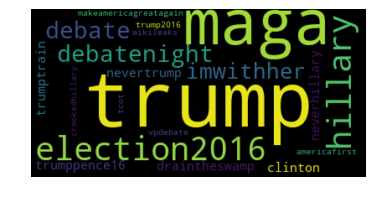

In [434]:
plt.imshow(nontroll_hashtag_cloud,interpolation='bilinear')
plt.plot(figsize = (8,4))
plt.axis('off')
plt.show()

In [511]:
non_troll_data.columns

Index(['tweet_id_str', 'created_str', 'favorite_count', 'hashtags', 'lang',
       'mentions', 'retweet_count', 'retweeted', 'text', 'tweet_id', 'user_id',
       'hashtags_count', 'mentions_count', 'date_time', 'target'],
      dtype='object')

In [528]:
troll_data.columns

Index(['user_id', 'created_str', 'retweet_count', 'retweeted',
       'favorite_count', 'text', 'tweet_id', 'hashtags', 'mentions', 'target',
       'mentions_count', 'hashtags_count', 'tweet_id_str', 'lang',
       'date_time'],
      dtype='object')

In [561]:
troll_data.drop(columns = ["user_key", "created_at", "user_id_str"], inplace = True)

In [562]:
troll_data=clean_tweets_df(troll_data, 1)

37951
37951


In [544]:
len(troll_data)

37951

In [564]:
troll_data.isnull().sum()

user_id               0
created_str           0
retweet_count     27360
retweeted             0
favorite_count    27360
text                  0
tweet_id              0
hashtags              0
mentions              0
target                0
mentions_count        0
hashtags_count        0
tweet_id_str          0
lang                  0
date_time             0
dtype: int64

In [531]:
troll_data.lang.value_counts()

en    37951
Name: lang, dtype: int64

In [565]:
get_hashtag_counts(troll_data).most_common(10)

[('maga', 695),
 ('trump', 564),
 ('tcot', 522),
 ('neverhillary', 368),
 ('pjnet', 230),
 ('hillary', 216),
 ('trumppence16', 212),
 ('p2', 159),
 ('obama', 155),
 ('ccot', 135)]

In [435]:
non_troll_data["hashtag_list"] = non_troll_data["hashtags"].apply(to_list)
print(get_hashtag_counts(non_troll_data).most_common(20))
len(get_hashtag_counts(non_troll_data))

troll_hashtag_counts = get_hashtag_counts(non_troll_data)

#19011 total different hashtags
# top 10 hashtags



[('trump', 12016), ('maga', 6700), ('election2016', 2783), ('hillary', 2473), ('debatenight', 2340), ('debate', 2184), ('imwithher', 2170), ('draintheswamp', 2150), ('trumppence16', 2141), ('clinton', 1930), ('nevertrump', 1619), ('trumptrain', 1618), ('neverhillary', 1464), ('makeamericagreatagain', 1445), ('americafirst', 1430), ('crookedhillary', 1396), ('tcot', 1302), ('vpdebate', 1253), ('trump2016', 1175), ('wikileaks', 1076)]


In [440]:
troll_hashtag_cloud=WordCloud().generate(' '.join([word[0]*word[1] for word in troll_hashtag_counts.most_common(30)]))


KeyboardInterrupt: 

In [ ]:
plt.imshow(troll_hashtag_cloud,interpolation='bilinear')
plt.plot(figsize = (8,4))
plt.axis('off')
plt.show()

In [574]:
min_time=troll_data.date_time.min()
max_time=troll_data.date_time.max()
print(min_time, max_time)

2014-07-20 06:30:01 2017-08-15 09:57:32


In [571]:
min_time=non_troll_data.date_time.min()
max_time=non_troll_data.date_time.max()
print(min_time, max_time)

2016-07-13 13:52:04 2016-11-10 18:35:31


In [575]:
troll_time = troll_data[(troll_data['date_time'] >= min_time) & (troll_data['date_time'] <= max_time)]
                

In [576]:
troll_time.to_csv("troll_filtered.csv")

In [418]:
troll_data_new["hashtag_list"] = troll_data_new["hashtags"].apply(to_list)

# visualization for non troll 

In [426]:
#troll_data_new = pd.read_csv("troll_filtered.csv")
get_hashtag_counts(troll_data_new) #4106
get_hashtag_counts(troll_data_new).most_common(20)


[('maga', 695),
 ('trump', 564),
 ('tcot', 522),
 ('neverhillary', 368),
 ('pjnet', 230),
 ('hillary', 216),
 ('trumppence16', 212),
 ('p2', 159),
 ('obama', 155),
 ('ccot', 135),
 ('teapartynews', 135),
 ('trump2016', 132),
 ('rejecteddebatetopics', 132),
 ('imwithher', 130),
 ('survivalguidetothanksgiving', 129),
 ('todolistbeforechristmas', 125),
 ('blacklivesmatter', 120),
 ('thingsyoucantignore', 118),
 ('igetdepressedwhen', 116),
 ('gop', 116)]

In [415]:
troll_data_new.hashtags

"['ChristmasAftermath']"

In [581]:
troll_time.isnull().sum()

user_id               0
created_str           0
retweet_count     27360
retweeted             0
favorite_count    27360
text                  0
tweet_id              0
hashtags              0
mentions              0
target                0
mentions_count        0
hashtags_count        0
tweet_id_str          0
lang                  0
date_time             0
dtype: int64

In [597]:
data = pd.concat([troll_time,non_troll_data])

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [585]:
len(troll_time) + len(non_troll_data)

417104

In [596]:
data.isnull().sum()

created_str       0
date_time         0
favorite_count    0
hashtags          0
hashtags_count    0
lang              0
mentions          0
mentions_count    0
retweet_count     0
retweeted         0
target            0
text              0
tweet_id          0
tweet_id_str      0
user_id           0
dtype: int64

In [598]:
data.favorite_count.mean()
data.retweet_count.median()

data.fillna(df.median(), inplace = True)

In [599]:
data.head()

created_str           date_time  favorite_count  \
3   2016-12-26 15:06:41 2016-12-26 15:06:41             0.0   
4   2017-08-06 02:36:24 2017-08-06 02:36:24             0.0   
17  2017-01-11 10:36:18 2017-01-11 10:36:18             0.0   
19  2017-02-09 10:26:17 2017-02-09 10:26:17             0.0   
30  2017-02-28 05:43:25 2017-02-28 05:43:25             0.0   

                hashtags  hashtags_count lang mentions  mentions_count  \
3   [ChristmasAftermath]               1   en       []               0   
4                     []               0   en       []               0   
17                   [1]               1   en       []               0   
19                    []               0   en       []               0   
30                    []               0   en       []               0   

    retweet_count  retweeted  target  \
3            33.0          1       1   
4            33.0          1       1   
17           33.0          1       1   
19           33.0          1       1   
30           33.0          1       1   

                                                 text      tweet_id  \
3               I don't have to guess your religion!   8.134006e+17   
4    Pence and his lawyers decided which of his of...  8.940243e+17   
17   . Scores FIRST  Hot 100 Hit With "Bad And Bou...  8.191308e+17   
19   The Marco Rubio knockdown of Elizabeth Warren...  8.296375e+17   
30   This week's "Sweden incident." https://t.co/E...  8.364517e+17   

             tweet_id_str       user_id  
3   8.134006499122176e+17  2.584153e+09  
4   8.940243270493635e+17  1.768260e+09  
17  8.191308087830118e+17  1.868496e+09  
19  8.296375374760018e+17  1.671235e+09  
30  8.364517191523492e+17  2.540882e+09

In [663]:
data.to_csv('data.csv')

In [1]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
np.random.seed(1942)

/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
data=pd.read_csv('cleaned_data.csv',index_col=0)

In [10]:
data.head()

created_str            date_time  favorite_count  \
3   2016-12-26 15:06:41  2016-12-26 15:06:41             0.0   
4   2017-08-06 02:36:24  2017-08-06 02:36:24             0.0   
17  2017-01-11 10:36:18  2017-01-11 10:36:18             0.0   
19  2017-02-09 10:26:17  2017-02-09 10:26:17             0.0   
30  2017-02-28 05:43:25  2017-02-28 05:43:25             0.0   

                  hashtags  hashtags_count lang mentions  mentions_count  \
3   ['ChristmasAftermath']               1   en       []               0   
4                       []               0   en       []               0   
17                   ['1']               1   en       []               0   
19                      []               0   en       []               0   
30                      []               0   en       []               0   

    retweet_count  retweeted  target  \
3            33.0          1       1   
4            33.0          1       1   
17           33.0          1       1   
19           33.0          1       1   
30           33.0          1       1   

                                                 text      tweet_id  \
3               I don't have to guess your religion!   8.134006e+17   
4    Pence and his lawyers decided which of his of...  8.940243e+17   
17   . Scores FIRST  Hot 100 Hit With "Bad And Bou...  8.191308e+17   
19   The Marco Rubio knockdown of Elizabeth Warren...  8.296375e+17   
30                    This week's "Sweden incident."   8.364517e+17   

    tweet_id_str       user_id  
3   8.134006e+17  2.584153e+09  
4   8.940243e+17  1.768260e+09  
17  8.191308e+17  1.868496e+09  
19  8.296375e+17  1.671235e+09  
30  8.364517e+17  2.540882e+09

In [12]:
len(data)

416157

In [4]:
data.drop(data[data['text'].isnull()].index,inplace=True)

In [5]:
len(data)

416157

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carolinevanacore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/carolinevanacore/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from sklearn.model_selection import train_test_split

In [13]:
text_data = data[['text']]
target = data[['target']]

In [14]:
stopwords_list=stopwords.words('english') +list(string.punctuation)
stopwords_list += ["'",'"','...','``','…','’','‘','“',"''",'""','”','”',"'s'",'\'s','n\'t','\'m','\'re','amp','https']

In [392]:
def process_tweet(tweet):
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed

In [161]:
data.shape

(416157, 15)

In [611]:
processed_data = text_data['text'].apply(process_tweet)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data['text'])
data_counts.shape

(416157, 261143)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
tf_transformer = TfidfTransformer(use_idf=False).fit(data_counts)
text_data_tfidf = tf_transformer.transform(data_counts)
text_data_tfidf.shape

(416157, 261143)

In [19]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_clf = SGDClassifier()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(text_data_tfidf,target,train_size=.75, random_state=19,stratify=target)

In [20]:
from imblearn.under_sampling import RandomUnderSampler

## Random Under Sampling

In [39]:
rus=RandomUnderSampler(random_state=19)
X_train_res,y_train_res=rus.fit_sample(X_train,y_train)

## sgd

In [33]:
sgd_model = sgd_clf.fit(X_train_res,y_train_res)

/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [34]:
sgd_model.score(X_test,y_test)

0.7472222222222222

In [43]:
sgd_model.score(X_train_res,y_train_res)

0.7795719775764199

In [170]:
from sklearn.metrics import classification_report, confusion_matrix

### Classification Report

- precision = of the ones it guessed to be that class, how many were actually that class
- recall = of the ones that were actually that class, how many did it catch 
- f1 score = harmonic mean of precision and recall 









In [37]:
print(classification_report(y_test,sgd_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.74      0.84     94586
          1       0.24      0.82      0.37      9454

avg / total       0.91      0.75      0.80    104040



98% of tweets model identified as non-troll were actually non-troll
24% of tweets model identified as troll were actually troll
74% of of the non-trolls were identified
82% of the trolls were identified

In [640]:
target.sum()/len(target)

target    0.090987
dtype: float64

In [3]:
from imblearn.over_sampling import SMOTE

In [ ]:
confusion_matrix

## Random Forest - under sampling

In [44]:
rf_clf=RandomForestClassifier(random_state=19)

In [48]:
rf_model=rf_clf.fit(X_train_res,y_train_res)
print(classification_report(y_test,rf_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.82      0.89     94586
          1       0.29      0.72      0.41      9454

avg / total       0.91      0.81      0.84    104040



## multinomial naive bayes - under sampling

In [47]:
mn_clf=MultinomialNB()

In [49]:
mn_model=mn_clf.fit(X_train_res,y_train_res)
print(classification_report(y_test,mn_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      0.94      0.95     94586
          1       0.46      0.47      0.46      9454

avg / total       0.90      0.90      0.90    104040



In [34]:
from sklearn.linear_model import LogisticRegression

## logistic regression - under sampling

In [58]:
lr_clf=LogisticRegression()

In [59]:
lr_model=lr_clf.fit(X_train_res,y_train_res)
print(classification_report(y_test,lr_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.78      0.87     94586
          1       0.27      0.79      0.40      9454

avg / total       0.91      0.78      0.83    104040



## SVC - under sampling

In [36]:
from sklearn.svm import SVC

In [61]:
svc_clf = SVC(random_state=19)

In [62]:
svc_model=svc_clf.fit(X_train_res,y_train_res)
print(classification_report(y_test,svc_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.08      0.15     94586
          1       0.10      0.98      0.18      9454

avg / total       0.90      0.16      0.15    104040



# Over sampling


In [30]:
# oversampling
sm=SMOTE(random_state=19)
X_train_over,y_train_over=sm.fit_sample(X_train,y_train)
# x train and y train come from our train_test_ split above
# need to use our new x_train and y_train, and old X-test and y_test

## sgd - over sampling

In [64]:
sgd_clf_sm = SGDClassifier()
sgd_model_sm = sgd_clf_sm.fit(X_train_over,y_train_over)

/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [69]:
sgd_model_sm.score(X_test,y_test)

0.832006920415225

In [70]:
sgd_model_sm.score(X_train_over,y_train_over)

0.8575755760271221

In [71]:
print(classification_report(y_test,sgd_model_sm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.84      0.90     94586
          1       0.31      0.71      0.43      9454

avg / total       0.91      0.83      0.86    104040



## random forest - over sampling

In [77]:
rf_clf_sm=RandomForestClassifier(random_state=19)
rf_model_sm=rf_clf_sm.fit(X_train_over,y_train_over)
print(classification_report(y_test,rf_model_sm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.98      0.96     94586
          1       0.62      0.29      0.40      9454

avg / total       0.90      0.92      0.91    104040



## multinomial naive bayes - over sampling

In [76]:
mn_clf_sm=MultinomialNB()
mn_model_sm=mn_clf_sm.fit(X_train_over,y_train_over)
print(classification_report(y_test,mn_model_sm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      0.93      0.94     94586
          1       0.40      0.48      0.44      9454

avg / total       0.90      0.89      0.89    104040



## logistic regression - over sampling

In [75]:
lr_clf_sm=LogisticRegression()
lr_model_sm=lr_clf_sm.fit(X_train_over,y_train_over)
print(classification_report(y_test,lr_model_sm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.90      0.93     94586
          1       0.38      0.63      0.48      9454

avg / total       0.91      0.87      0.89    104040



## SVC - over sampling

In [ ]:
svc_clf_sm = SVC(random_state=19)
svc_model_sm=svc_clf_sm.fit(X_train_over,y_train_over)
print(classification_report(y_test,svc_model_sm.predict(X_test)))

(416157, 261143) stopwords in

# Stop Words

In [14]:
stopwords_list=stopwords.words('english') +list(string.punctuation)
stopwords_list += ["'",'"','...','``','…','’','‘','“',"''",'""','”','”',"'s'",'\'s','n\'t','\'m','\'re','amp','https']

In [40]:
count_vect_sw = CountVectorizer(stop_words = stopwords_list)
data_counts_sw = count_vect_sw.fit_transform(text_data["text"])
data_counts_sw.shape

(416157, 68995)

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer

In [44]:
tf_transformer_sw = TfidfTransformer(use_idf=False).fit(data_counts_sw)
text_data_tfidf_sw = tf_transformer_sw.transform(data_counts_sw)
text_data_tfidf_sw.shape

(416157, 68995)

In [21]:
sgd_clf_sw = SGDClassifier()

## Take out Stop Words - Under Sampling 

X_train_res_sw, y_train_res_sw, X_test_sw, y_test_sw

In [45]:

X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(text_data_tfidf_sw,target,train_size=.75, random_state=19,stratify=target)


/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [46]:
rus_sw=RandomUnderSampler(random_state=19)
X_train_res_sw,y_train_res_sw=rus_sw.fit_sample(X_train_sw,y_train_sw)

## SGD - no stop words, under sampling

In [26]:
sgd_model_sw = sgd_clf_sw.fit(X_train_res_sw,y_train_res_sw)
print(classification_report(y_test_sw,sgd_model_sw.predict(X_test_sw)))


             precision    recall  f1-score   support

          0       0.98      0.74      0.84     94586
          1       0.24      0.82      0.37      9454

avg / total       0.91      0.75      0.80    104040



## Random forest - no stop words, under sampling

In [27]:
rf_clf_sw=RandomForestClassifier(random_state=19)
rf_model_sw=rf_clf_sw.fit(X_train_res_sw,y_train_res_sw)
print(classification_report(y_test_sw,rf_model_sw.predict(X_test_sw)))

             precision    recall  f1-score   support

          0       0.97      0.83      0.90     94586
          1       0.30      0.74      0.43      9454

avg / total       0.91      0.82      0.85    104040



## multinomial - no stop words, under sampling

In [31]:
mn_clf_sw=MultinomialNB()
mn_model_sw=mn_clf_sw.fit(X_train_res_sw,y_train_res_sw)
print(classification_report(y_test_sw,mn_model_sw.predict(X_test_sw)))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93     94586
          1       0.39      0.55      0.46      9454

avg / total       0.90      0.88      0.89    104040



## Logistic Regression - no stop words, under sampling

In [35]:
lr_clf_sw=LogisticRegression()
lr_model_sw=lr_clf_sw.fit(X_train_res_sw,y_train_res_sw)
print(classification_report(y_test_sw,lr_model_sw.predict(X_test_sw)))

             precision    recall  f1-score   support

          0       0.98      0.78      0.86     94586
          1       0.26      0.81      0.40      9454

avg / total       0.91      0.78      0.82    104040



## SVC - no stop words, under sampling

In [37]:

print(classification_report(y_test_sw,svc_model_sw.predict(X_test_sw)))

NameError: name 'svc_model' is not defined

In [38]:
svc_clf_sw = SVC(random_state=19)
svc_model_sw=svc_clf_sw.fit(X_train_res_sw,y_train_res_sw)
print(classification_report(y_test_sw,svc_model_sw.predict(X_test_sw)))

             precision    recall  f1-score   support

          0       0.97      0.06      0.11     94586
          1       0.09      0.98      0.17      9454

avg / total       0.89      0.14      0.11    104040



# EDA

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

In [385]:
from nltk import FreqDist, word_tokenize

In [389]:
troll_text = data[data['target']==1]['text'].apply(strip_tweets)
non_troll_text = data[data['target']==0]['text'].apply(strip_tweets)

In [390]:
data['text']=data['text'].apply(strip_tweets)

In [164]:
data.to_csv('cleaned_data.csv')

## Frequency distributions

In [393]:
troll_joined = ' '.join([tweet.lower() for tweet in troll_text])
troll_tokens = process_tweet(troll_joined)
troll_freqdist = FreqDist(troll_tokens)
troll_freqdist.most_common(50)

[('trump', 4702),
 ('clinton', 2090),
 ('hillary', 1927),
 ('obama', 1623),
 ('people', 1322),
 ('like', 1074),
 ('get', 1050),
 ('one', 959),
 ('new', 947),
 ('donald', 896),
 ('us', 848),
 ('black', 795),
 ('via', 767),
 ('president', 631),
 ('would', 629),
 ('america', 622),
 ('time', 614),
 ('know', 601),
 ('want', 595),
 ('make', 591),
 ('vote', 556),
 ('white', 548),
 ('love', 543),
 ('never', 532),
 ('go', 531),
 ('day', 517),
 ('right', 517),
 ('good', 506),
 ('think', 499),
 ('see', 498),
 ('going', 488),
 ('let', 487),
 ('need', 483),
 ('man', 482),
 ('video', 481),
 ('says', 479),
 ('say', 478),
 ('media', 475),
 ('back', 472),
 ('ca', 437),
 ('election', 437),
 ('got', 432),
 ('2', 430),
 ('world', 416),
 ('take', 405),
 ('campaign', 402),
 ('watch', 400),
 ('today', 396),
 ('american', 395),
 ('really', 391)]

In [394]:
non_troll_joined = ' '.join([tweet.lower() for tweet in non_troll_text])
non_troll_tokens = process_tweet(non_troll_joined)
non_troll_freqdist = FreqDist(non_troll_tokens)
non_troll_freqdist.most_common(50)

[('trump', 189763),
 ('clinton', 79335),
 ('hillary', 51237),
 ('donald', 39207),
 ('election', 27722),
 ('vote', 16385),
 ('via', 15141),
 ('people', 14409),
 ('like', 14382),
 ('campaign', 13185),
 ('president', 12798),
 ('us', 11568),
 ('says', 10927),
 ('new', 10813),
 ('would', 10754),
 ('obama', 10619),
 ('one', 10152),
 ('get', 9728),
 ('america', 9649),
 ('media', 9010),
 ('women', 8875),
 ('said', 8392),
 ('make', 8288),
 ('know', 8243),
 ('debate', 8203),
 ('time', 7953),
 ('fbi', 7828),
 ('bill', 7594),
 ('never', 7434),
 ('say', 7094),
 ('great', 7076),
 ('going', 6906),
 ('emails', 6718),
 ('pence', 6609),
 ('let', 6601),
 ('today', 6600),
 ('supporters', 6568),
 ('think', 6522),
 ('go', 6443),
 ('win', 6216),
 ('want', 6143),
 ('video', 6065),
 ('right', 6047),
 ('foundation', 6029),
 ('news', 6009),
 ('see', 5979),
 ('poll', 5868),
 ('day', 5851),
 ('ca', 5834),
 ('could', 5824)]

## Wordcloud Visualizations

In [395]:
from wordcloud import WordCloud

In [396]:
trollcloud=WordCloud().generate(' '.join([word for word in troll_tokens]))

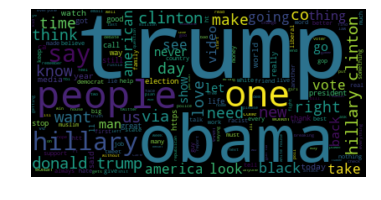

In [402]:
plt.imshow(trollcloud,interpolation='bilinear')
plt.plot(figsize = (8,4))
plt.axis('off')
plt.show()

In [398]:
nontrollcloud=WordCloud().generate(' '.join([word for word in non_troll_tokens]))

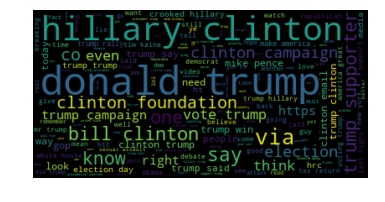

In [115]:
plt.imshow(nontrollcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

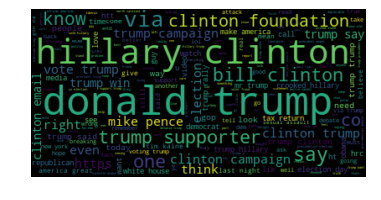

In [400]:
plt.imshow(nontrollcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Lemmatizing for visualizations

In [15]:
from nltk.stem import WordNetLemmatizer

In [117]:
lemm=WordNetLemmatizer()

In [125]:
troll_lemmings = [lemm.lemmatize(word) for word in troll_tokens]

In [127]:
len(troll_lemmings)

263307

In [128]:
non_troll_lemmings = [lemm.lemmatize(word) for word in non_troll_tokens]

In [129]:
len(non_troll_lemmings)

3477601

In [130]:
non_troll_lemmings[:50]

['email',
 'show',
 'staffer',
 'approving',
 'deal',
 'led',
 'speech',
 'paying',
 'bill',
 'clinton',
 '500,000',
 '//…',
 'medium',
 'politician',
 'big',
 'business',
 'trump',
 'trillion',
 'dollar',
 'stake',
 'huge',
 'globa…',
 'guy',
 'behind',
 'trump',
 'immediately',
 'realized',
 'said',
 'problem',
 'care',
 'show',
 'he',
 'mob',
 'putin',
 'kkk',
 'trump',
 'lie',
 'openly',
 'said',
 'commit',
 'war',
 'crime',
 'way',
 'beacon',
 'integrity',
 'people',
 'think',
 'trump',
 'dangerous',
 'lulz']

In [131]:
lemming_troll_freqdist = FreqDist(troll_lemmings)
lemming_troll_freqdist.most_common(50)

[('trump', 4728),
 ('clinton', 2135),
 ('hillary', 1933),
 ('obama', 1623),
 ('people', 1327),
 ('get', 1223),
 ('u', 1129),
 ('like', 1099),
 ('one', 1020),
 ('say', 957),
 ('new', 947),
 ('donald', 896),
 ('black', 867),
 ('want', 803),
 ('time', 783),
 ('via', 767),
 ('make', 761),
 ('day', 705),
 ('know', 686),
 ('woman', 681),
 ('american', 671),
 ('president', 643),
 ('go', 636),
 ('need', 631),
 ('right', 629),
 ('would', 629),
 ('america', 627),
 ('vote', 622),
 ('year', 609),
 ('love', 598),
 ('think', 583),
 ('white', 575),
 ('life', 540),
 ('never', 532),
 ('see', 523),
 ('let', 517),
 ('video', 511),
 ('take', 509),
 ('good', 508),
 ('thing', 490),
 ('back', 488),
 ('going', 488),
 ('show', 488),
 ('man', 484),
 ('election', 478),
 ('medium', 476),
 ('ca', 437),
 ('country', 432),
 ('got', 432),
 ('2', 430)]

In [132]:
lemming_non_troll_freqdist = FreqDist(non_troll_lemmings)
lemming_non_troll_freqdist.most_common(50)

[('trump', 190352),
 ('clinton', 80471),
 ('hillary', 51365),
 ('donald', 39207),
 ('election', 28512),
 ('vote', 18061),
 ('say', 18021),
 ('u', 15834),
 ('via', 15141),
 ('like', 14809),
 ('people', 14473),
 ('campaign', 13515),
 ('president', 12930),
 ('woman', 12815),
 ('get', 11792),
 ('email', 11486),
 ('time', 11216),
 ('new', 10813),
 ('would', 10754),
 ('obama', 10619),
 ('one', 10570),
 ('make', 10515),
 ('america', 9711),
 ('know', 9688),
 ('poll', 9598),
 ('want', 9333),
 ('debate', 9255),
 ('medium', 9027),
 ('day', 8980),
 ('supporter', 8954),
 ('win', 8950),
 ('american', 8635),
 ('said', 8392),
 ('go', 8153),
 ('think', 8138),
 ('tax', 7999),
 ('fbi', 7832),
 ('bill', 7758),
 ('never', 7434),
 ('need', 7363),
 ('let', 7313),
 ('voter', 7191),
 ('great', 7082),
 ('year', 6974),
 ('right', 6924),
 ('going', 6907),
 ('state', 6837),
 ('rally', 6700),
 ('penny', 6652),
 ('today', 6610)]

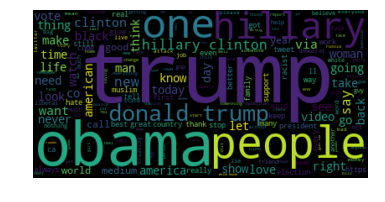

In [136]:
lemmingtrollcloud=WordCloud().generate(' '.join([word for word in troll_lemmings]))
plt.imshow(lemmingtrollcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

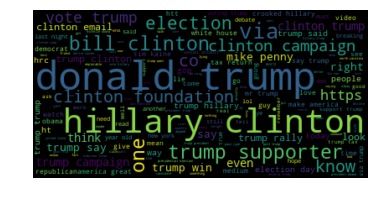

In [135]:
lemmingnontrollcloud=WordCloud().generate(' '.join([word for word in non_troll_lemmings]))
plt.imshow(lemmingnontrollcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Lemmatized Models w/ n_gram = 1-2

In [148]:
recleaned_data = data['text'].apply(lambda x: ' '.join([lemm.lemmatize(word) for word in x.split(' ')]))
target = data['target']

count_vect = CountVectorizer(ngram_range=(1,2))
lemm_data_counts = count_vect.fit_transform(recleaned_data)
print(lemm_data_counts.shape)

lemm_tf_transformer = TfidfTransformer(use_idf=False).fit(lemm_data_counts)
lemm_text_data_tfidf = lemm_tf_transformer.transform(lemm_data_counts)
print(lemm_text_data_tfidf.shape)

(416157, 1564895)
(416157, 1564895)


In [149]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(lemm_text_data_tfidf,target,train_size=.75, random_state=19,stratify=target)

## Random Under Sampling

rus=RandomUnderSampler(random_state=19)
X_train_res_lem,y_train_res_lem=rus.fit_sample(X_train_lem,y_train_lem)

/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Classification Report

- precision = of the ones it guessed to be that class, how many were actually that class
- recall = of the ones that were actually that class, how many did it catch 
- f1 score = harmonic mean of precision and recall 









## SGD - under sampling, lemm, n_gram 1-2

In [151]:
sgd_clf_lem = SGDClassifier()
sgd_model_lem = sgd_clf_lem.fit(X_train_res_lem,y_train_res_lem)
print(classification_report(y_test_lem,sgd_model_lem.predict(X_test_lem)))

             precision    recall  f1-score   support

          0       0.98      0.74      0.84     94586
          1       0.24      0.82      0.37      9454

avg / total       0.91      0.75      0.80    104040



/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


             precision    recall  f1-score   support

          0       0.98      0.74      0.84     94586
          1       0.24      0.82      0.37      9454

avg / total       0.91      0.75      0.80    104040



98% of tweets model identified as non-troll were actually non-troll
24% of tweets model identified as troll were actually troll
74% of of the non-trolls were identified
82% of the trolls were identified

In [171]:
print(confusion_matrix(y_test_lem, sgd_model_lem.predict(X_test_lem)))

[[70094 24492]
 [ 1730  7724]]


## Random Forest - under sampling, lemm, n_gram 1-2

In [152]:
rf_clf_lem=RandomForestClassifier(random_state=19)
rf_model_lem=rf_clf_lem.fit(X_train_res_lem,y_train_res_lem)
print(classification_report(y_test_lem,rf_model_lem.predict(X_test_lem)))

             precision    recall  f1-score   support

          0       0.97      0.79      0.87     94586
          1       0.26      0.74      0.39      9454

avg / total       0.90      0.79      0.83    104040



             precision    recall  f1-score   support

          0       0.97      0.82      0.89     94586
          1       0.29      0.72      0.41      9454

avg / total       0.91      0.81      0.84    104040



## Multinomial naive bayes - under sampling, lemm, n_gram 1-2

In [154]:
mn_clf_lem=MultinomialNB()
mn_model_lem=mn_clf_lem.fit(X_train_res_lem,y_train_res_lem)
print(classification_report(y_test_lem,mn_model_lem.predict(X_test_lem)))

             precision    recall  f1-score   support

          0       0.95      0.96      0.95     94586
          1       0.50      0.45      0.48      9454

avg / total       0.91      0.91      0.91    104040



             precision    recall  f1-score   support

          0       0.95      0.94      0.95     94586
          1       0.46      0.47      0.46      9454

avg / total       0.90      0.90      0.90    104040



In [34]:
from sklearn.linear_model import LogisticRegression

## logistic regression - under sampling, lemm, n_gram 1-2

In [156]:
lr_clf_lem=LogisticRegression()
lr_model_lem=lr_clf_lem.fit(X_train_res_lem,y_train_res_lem)
print(classification_report(y_test_lem,lr_model_lem.predict(X_test_lem)))

             precision    recall  f1-score   support

          0       0.98      0.79      0.87     94586
          1       0.27      0.80      0.41      9454

avg / total       0.91      0.79      0.83    104040



             precision    recall  f1-score   support

          0       0.97      0.78      0.87     94586
          1       0.27      0.79      0.40      9454

avg / total       0.91      0.78      0.83    104040



## Lemmatized Optimization

In [158]:
count_vect = CountVectorizer()
lemm_data_counts = count_vect.fit_transform(recleaned_data)
print(lemm_data_counts.shape)

lemm_tf_transformer = TfidfTransformer(use_idf=False).fit(lemm_data_counts)
lemm_text_data_tfidf = lemm_tf_transformer.transform(lemm_data_counts)
print(lemm_text_data_tfidf.shape)

(416157, 260201)
(416157, 260201)


In [166]:
len(data[data.index.duplicated()])

109284

In [169]:
data[data.index==1982]

created_str            date_time  favorite_count  \
1982             2017-02-15 15:53:24  2017-02-15 15:53:24             0.0   
1982  Thu Aug 11 16:34:13 +0000 2016  2016-08-11 16:34:13             0.0   
1982  Mon Oct 03 01:11:58 +0000 2016  2016-10-03 01:11:58             0.0   
1982  Fri Oct 21 08:38:06 +0000 2016  2016-10-21 08:38:06            12.0   

     hashtags  hashtags_count lang          mentions  mentions_count  \
1982       []               0   en                []               0   
1982       []               0   en      ['ladyhaja']               1   
1982       []               0   en  ['newtgingrich']               1   
1982       []               0   en                []               0   

      retweet_count  retweeted  target  \
1982           33.0          1       1   
1982         1362.0          1       0   
1982         6592.0          1       0   
1982            8.0          0       0   

                                                   text      tweet_id  \
1982   \r\n\r\nGet caught with your fingers in the t...  8.318942e+17   
1982   This is brilliantly put by Patti Davis, Reaga...  7.637755e+17   
1982   The liberal media is working on every possibl...  7.827500e+17   
1982  Clinton's debate reference to nuclear response...  7.893853e+17   

      tweet_id_str       user_id  
1982  8.318942e+17  2.584153e+09  
1982  7.637755e+17  2.113222e+08  
1982  7.827500e+17  2.252507e+09  
1982  7.893853e+17  4.617478e+08

In [167]:
data.index.value_counts()

1982      4
1694      4
895       4
747       4
2206      4
626       4
2107      4
807       4
843       4
460       4
1111      4
149       4
207       4
450       4
1060      4
1577      4
2014      4
156       4
370       4
610       4
1894      4
804       4
1835      4
1441      4
2224      4
1849      4
1796      4
811       4
526       4
1172      4
         ..
206321    1
278034    1
310786    1
271889    1
273936    1
316943    1
312845    1
314892    1
325131    1
323080    1
300551    1
302598    1
296453    1
298500    1
308739    1
304641    1
212466    1
306688    1
218623    1
220670    1
214525    1
216572    1
226811    1
228858    1
222713    1
224760    1
202231    1
198133    1
200180    1
317413    1
Length: 306873, dtype: int64

## Non text features model

In [16]:
features_nt = data.drop(columns = 'text', axis = 1)

In [17]:
features_nt.columns

Index(['created_str', 'date_time', 'favorite_count', 'hashtags',
       'hashtags_count', 'lang', 'mentions', 'mentions_count', 'retweet_count',
       'retweeted', 'target', 'tweet_id', 'tweet_id_str', 'user_id'],
      dtype='object')

In [18]:
features_nt.drop(columns = ["created_str","lang","tweet_id","tweet_id_str", "user_id"], axis = 1, inplace = True)

In [19]:
features_nt["date_time"] = pd.to_datetime(features_nt["date_time"])

In [20]:
features_nt.dtypes

date_time         datetime64[ns]
favorite_count           float64
hashtags                  object
hashtags_count             int64
mentions                  object
mentions_count             int64
retweet_count            float64
retweeted                  int64
target                     int64
dtype: object

In [21]:
features_nt.reset_index(inplace = True, drop = True)

In [186]:
#features_nt.index.value_counts()

In [22]:
target = features_nt['target']

In [23]:
features_nt.drop(columns = "target", axis = 1, inplace = True)

In [417]:
import re

In [24]:
def to_list(string,apostrophe = 1):
    if apostrophe == 2:
        pattern = r"\"(.*?)\""
    else:
        pattern = r"\'(.*?)\'"
        
    if type(string) != str:
        return []
    items = re.findall(pattern, string)
    return items

In [27]:
# features_nt["mentions"] = features_nt["mentions"].apply(to_list)
# features_nt["hashtags"] = features_nt["hashtags"].apply(to_list)
features_nt.drop(columns=['mentions','hashtags'],axis=1,inplace=True)

In [198]:
features_nt['mentions'][8]

['amjoyshow', 'joyannreid']

In [200]:
from sklearn.preprocessing import MultiLabelBinarizer

In [201]:
one_hot = MultiLabelBinarizer()
one_hot_mentions = one_hot.fit_transform(features_nt["mentions"])
one_hot_hashtags = one_hot.fit_transform(features_nt["hashtags"])

one_hot_mentions_df = pd.DataFrame(one_hot_mentions)
one_hot_hashtags_df = pd.DataFrame(one_hot_hashtags)


In [204]:
print(one_hot_mentions_df.shape)
print(one_hot_hashtags_df.shape)

(416157, 59888)
(416157, 25340)


In [ ]:
hot_features_nt = pd.concat([features_nt.drop(columns = ["mentions","hashtags"], axis = 1), one_hot_mentions_df, one_hot_hashtags_df], axis = 1)


In [38]:
features_nt.columns

Index(['favorite_count', 'hashtags_count', 'mentions_count', 'retweet_count',
       'retweeted'],
      dtype='object')

## SGD classifier with huber loss

In [28]:
from sklearn.linear_model import SGDClassifier

In [86]:
features_nt.columns

Index(['favorite_count', 'hashtags_count', 'mentions_count', 'retweet_count',
       'retweeted'],
      dtype='object')

In [33]:
features_nt.drop(columns=['date_time'],inplace=True,axis=1)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(features_nt,target,train_size=.75,random_state=19,stratify=target)


/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
rus=RandomUnderSampler(random_state=19)
X_train_res,y_train_res = rus.fit_sample(X_train,y_train)

In [37]:
sgd_clf = SGDClassifier()
sgd_model = sgd_clf.fit(X_train_res,y_train_res)
print(classification_report(y_test,sgd_model.predict(X_test)))
print(confusion_matrix(y_test,sgd_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.67      0.79     94586
          1       0.19      0.79      0.31      9454

avg / total       0.90      0.68      0.75    104040

[[63306 31280]
 [ 1991  7463]]


/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [45]:

X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(text_data_tfidf_sw,target,train_size=.75, random_state=19,stratify=target)


/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [46]:
rus_sw=RandomUnderSampler(random_state=19)
X_train_res_sw,y_train_res_sw=rus_sw.fit_sample(X_train_sw,y_train_sw)

## SGD - no stop words, under sampling, probability output

In [48]:
sgd_feature = SGDClassifier(loss='modified_huber')

In [49]:
sgd_feat_model = sgd_feature.fit(X_train_res_sw,y_train_res_sw)
print(classification_report(y_test_sw,sgd_feat_model.predict(X_test_sw)))


             precision    recall  f1-score   support

          0       0.97      0.79      0.87     94586
          1       0.27      0.79      0.40      9454

avg / total       0.91      0.79      0.83    104040



/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [64]:
train_prob = sgd_feat_model.predict_proba(X_train_res_sw)
test_prob = sgd_feat_model.predict_proba(X_test_sw)

In [65]:
X_train_res.shape

(56726, 5)

In [75]:
X_test_sw.shape

(104040, 68995)

In [76]:
test_prob.shape

(104040, 2)

In [68]:
X_train_fin = np.concatenate([X_train_res,pd.DataFrame(train_prob)],axis=1)


In [80]:
X_test_fin = np.concatenate([X_test,pd.DataFrame(test_prob)],axis=1)


In [79]:
type(test_prob)

numpy.ndarray

In [81]:
X_test_fin.shape

(104040, 7)

In [48]:
sgd_clf = SGDClassifier()

In [82]:
sgd_model = sgd_clf.fit(X_train_fin,y_train_res)
print(classification_report(y_test,sgd_model.predict(X_test_fin)))


             precision    recall  f1-score   support

          0       0.98      0.72      0.83     94586
          1       0.24      0.88      0.37      9454

avg / total       0.92      0.73      0.79    104040



/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [83]:
print(confusion_matrix(y_test,sgd_model.predict(X_test_fin)))

[[67849 26737]
 [ 1149  8305]]


In [84]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [85]:
scaler=StandardScaler()

In [87]:
scaled_features = scaler.fit_transform(features_nt)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,target,train_size=.75,random_state=19,stratify=target)


/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
rus_sw=RandomUnderSampler(random_state=19)
X_train_res_sw,y_train_res_sw=rus_sw.fit_sample(X_train_sw,y_train_sw)

In [92]:
feature_sgd_param_grid = {
    'loss': ['modified_huber'],
    'penalty': ['l2','l1','elasticnet'],
    'alpha': [.0001,.001,.01],
    'max_iter': [5,10,15],
    'random_state':[19]
    
}

In [93]:
sgd_grid_search = GridSearchCV(sgd_feature,feature_sgd_param_grid,cv=3,return_train_score=True)
sgd_grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01], 'max_iter': [5, 10, 15], 'random_state': [19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
sgd_grid_search.best_params_

{'alpha': 0.0001,
 'loss': 'modified_huber',
 'max_iter': 5,
 'penalty': 'l1',
 'random_state': 19}

In [95]:
print(classification_report(y_train,sgd_grid_search.predict(X_train)))
print(classification_report(y_test,sgd_grid_search.predict(X_test)))


             precision    recall  f1-score   support

          0       0.96      0.99      0.97    283754
          1       0.86      0.57      0.69     28363

avg / total       0.95      0.95      0.95    312117

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     94586
          1       0.86      0.57      0.69      9454

avg / total       0.95      0.95      0.95    104040



In [163]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,target,train_size=.75,random_state=19,stratify=target)


/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [158]:
rus=RandomUnderSampler(random_state=19)
X_train_res,y_train_res=rus.fit_sample(X_train,y_train)

In [92]:
nt_res_param_grid = {
    'loss': ['modified_huber'],
    'penalty': ['l2','l1','elasticnet'],
    'alpha': [.0001,.001,.01],
    'max_iter': [5,10,15],
    'random_state':[19]
    
}

In [93]:
sgd_grid_search = GridSearchCV(sgd_feature,feature_sgd_param_grid,cv=3,return_train_score=True)
sgd_grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01], 'max_iter': [5, 10, 15], 'random_state': [19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
sgd_grid_search.best_params_

{'alpha': 0.0001,
 'loss': 'modified_huber',
 'max_iter': 5,
 'penalty': 'l1',
 'random_state': 19}

In [95]:
print(classification_report(y_train,sgd_grid_search.predict(X_train)))
print(classification_report(y_test,sgd_grid_search.predict(X_test)))


             precision    recall  f1-score   support

          0       0.96      0.99      0.97    283754
          1       0.86      0.57      0.69     28363

avg / total       0.95      0.95      0.95    312117

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     94586
          1       0.86      0.57      0.69      9454

avg / total       0.95      0.95      0.95    104040



In [160]:
feature_sgd_param_grid_2 = {
    'loss': ['modified_huber'],
    'penalty': ['l1'],
    'learning_rate':['constant','optimal'],
    'alpha': [.0001,.00001],
    'eta0': [.0001],
    'max_iter': [5,10,15],
    'random_state':[19]
    
}

In [103]:
sgd_grid_search_2 = GridSearchCV(sgd_feature,feature_sgd_param_grid_2,cv=3,return_train_score=True)
sgd_grid_search_2.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['modified_huber'], 'penalty': ['l1'], 'learning_rate': ['constant', 'optimal'], 'alpha': [0.0001, 1e-05], 'eta0': [0.0001], 'max_iter': [5, 10, 15], 'random_state': [19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [104]:
sgd_grid_search_2.best_params_

{'alpha': 0.0001,
 'eta0': 0.0001,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'max_iter': 5,
 'penalty': 'l1',
 'random_state': 19}

In [105]:
print(classification_report(y_train,sgd_grid_search_2.predict(X_train)))
print(classification_report(y_test,sgd_grid_search_2.predict(X_test)))


             precision    recall  f1-score   support

          0       0.96      0.99      0.97    283754
          1       0.86      0.57      0.69     28363

avg / total       0.95      0.95      0.95    312117

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     94586
          1       0.86      0.57      0.69      9454

avg / total       0.95      0.95      0.95    104040



Normalized confusion matrix
[[0.99093946 0.00906054]
 [0.42553417 0.57446583]]


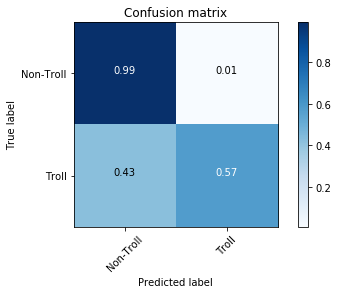

In [156]:
sgd_cm = confusion_matrix(y_test,sgd_grid_search_2.predict(X_test))
class_names = ["Non-Troll","Troll"]
plot_confusion_matrix(sgd_cm, class_names, normalize = True) 

             precision    recall  f1-score   support

          0       0.99      0.73      0.84     94586
          1       0.25      0.90      0.39      9454

avg / total       0.92      0.75      0.80    104040

Normalized confusion matrix
[[0.73374495 0.26625505]
 [0.09847684 0.90152316]]


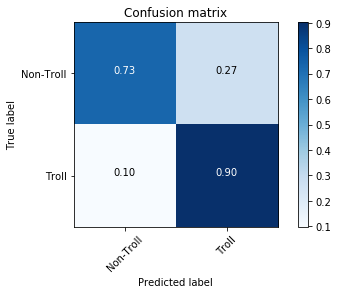

In [162]:
sgd_scaled_res = SGDClassifier('modified_huber','l1',0.0001,max_iter =5, random_state=19)
sgd_scaled_res_model = sgd_scaled_res.fit(X_train_res,y_train_res)
sgd_cm = confusion_matrix(y_test, sgd_scaled_res_model.predict(X_test))
print(classification_report(y_test, sgd_scaled_res_model.predict(X_test)))
plot_confusion_matrix(sgd_cm, class_names, normalize = True)

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     94586
          1       0.86      0.57      0.69      9454

avg / total       0.95      0.95      0.95    104040

Normalized confusion matrix
[[0.99093946 0.00906054]
 [0.42553417 0.57446583]]


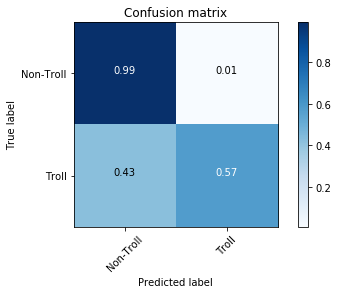

In [164]:
sgd_scaled = SGDClassifier('modified_huber','l1',0.0001,max_iter =5, random_state=19)
sgd_scaled_model = sgd_scaled.fit(X_train,y_train)
sgd_cm = confusion_matrix(y_test, sgd_scaled_model.predict(X_test))
print(classification_report(y_test, sgd_scaled_model.predict(X_test)))
plot_confusion_matrix(sgd_cm, class_names, normalize = True)

In [92]:
feature_sgd_param_grid = {
    'loss': ['modified_huber'],
    'penalty': ['l2','l1','elasticnet'],
    'alpha': [.0001,.001,.01],
    'max_iter': [5,10,15],
    'random_state':[19] 
}

In [93]:
sgd_grid_search = GridSearchCV(sgd_feature,feature_sgd_param_grid,cv=3,return_train_score=True)
sgd_grid_search.fit(X_train,y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01], 'max_iter': [5, 10, 15], 'random_state': [19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
sgd_grid_search.best_params_

{'alpha': 0.0001,
 'loss': 'modified_huber',
 'max_iter': 5,
 'penalty': 'l1',
 'random_state': 19}

In [95]:
print(classification_report(y_train,sgd_grid_search.predict(X_train)))
print(classification_report(y_test,sgd_grid_search.predict(X_test)))


             precision    recall  f1-score   support

          0       0.96      0.99      0.97    283754
          1       0.86      0.57      0.69     28363

avg / total       0.95      0.95      0.95    312117

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     94586
          1       0.86      0.57      0.69      9454

avg / total       0.95      0.95      0.95    104040



In [107]:
sgd_param_grid = {
    'loss': ['modified_huber'],
    'penalty': ['l2','l1','elasticnet'],
    'alpha': [.0001,.001,.01],
    'max_iter': [5,10,15],
    'random_state':[19]
}

In [106]:
sgd_text = SGDClassifier()

In [108]:
sgd_grid_search_t = GridSearchCV(sgd_text,sgd_param_grid,cv=3,return_train_score=True)
sgd_grid_search_t.fit(X_train_res_sw,y_train_res_sw)


GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01], 'max_iter': [5, 10, 15], 'random_state': [19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [109]:
sgd_grid_search_t.best_params_

{'alpha': 0.0001,
 'loss': 'modified_huber',
 'max_iter': 5,
 'penalty': 'l1',
 'random_state': 19}

In [110]:
print(classification_report(y_train_res,sgd_grid_search_t.predict(X_train_res_sw)))
print(classification_report(y_test,sgd_grid_search_t.predict(X_test_sw)))


             precision    recall  f1-score   support

          0       0.83      0.82      0.83     28363
          1       0.82      0.83      0.83     28363

avg / total       0.83      0.83      0.83     56726

             precision    recall  f1-score   support

          0       0.97      0.78      0.87     94586
          1       0.27      0.80      0.40      9454

avg / total       0.91      0.78      0.82    104040



Normalized confusion matrix
[[0.78018946 0.21981054]
 [0.20044426 0.79955574]]


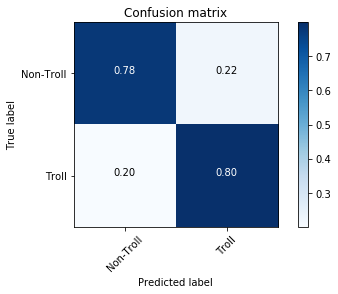

In [165]:
plot_confusion_matrix(confusion_matrix(y_test,sgd_grid_search_t.predict(X_test_sw)), class_names, normalize = True )


In [111]:
train_prob = sgd_grid_search_t.predict_proba(X_train_res_sw)
test_prob = sgd_grid_search_t.predict_proba(X_test_sw)

In [112]:
X_train_fin = np.concatenate([X_train_res,pd.DataFrame(train_prob)],axis=1)


In [113]:
X_test_fin = np.concatenate([X_test,pd.DataFrame(test_prob)],axis=1)


In [114]:
sgd_combined_clf = SGDClassifier(alpha=.0001,loss='modified_huber',max_iter=5,penalty='l1',random_state=19)

{'alpha': 0.0001,
 'loss': 'modified_huber',
 'max_iter': 5,
 'penalty': 'l1',
 'random_state': 19}

In [115]:
sgd_combined = sgd_combined_clf.fit(X_train_fin,y_train_res)
print(classification_report(y_test,sgd_combined.predict(X_test_fin)))


             precision    recall  f1-score   support

          0       0.97      0.48      0.64     94586
          1       0.14      0.84      0.24      9454

avg / total       0.89      0.51      0.60    104040



In [83]:
print(confusion_matrix(y_test,sgd_model.predict(X_test_fin)))

[[67849 26737]
 [ 1149  8305]]


In [116]:
combined_param_grid = {
    'loss': ['modified_huber','hinge','log','squared_loss'],
    'penalty': ['l2','l1','elasticnet'],
    'alpha': [.0001,.001,.01,.00001],
    'max_iter': [5,10,15],
    'random_state':[19]
    
}

In [123]:
sgd_combined_clf=SGDClassifier()

In [124]:
sgd_combined_search = GridSearchCV(sgd_combined_clf,combined_param_grid,cv=3,return_train_score=True)
sgd_combined_search.fit(X_train_fin,y_train_res)

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['modified_huber', 'hinge', 'log', 'squared_loss'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 1e-05], 'max_iter': [5, 10, 15], 'random_state': [19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [125]:
sgd_combined_search.best_params_

{'alpha': 1e-05,
 'loss': 'hinge',
 'max_iter': 15,
 'penalty': 'l1',
 'random_state': 19}

In [126]:
print(classification_report(y_train_res,sgd_combined_search.predict(X_train_fin)))
print(classification_report(y_test,sgd_combined_search.predict(X_test_fin)))


             precision    recall  f1-score   support

          0       0.90      0.87      0.88     28363
          1       0.87      0.90      0.89     28363

avg / total       0.89      0.89      0.89     56726

             precision    recall  f1-score   support

          0       0.96      0.54      0.69     94586
          1       0.14      0.76      0.24      9454

avg / total       0.88      0.56      0.65    104040



In [147]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [323]:
def plot_confusion_matrix(cm, classes=class_names,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show();

Normalized confusion matrix
[[0.53654875 0.46345125]
 [0.24011001 0.75988999]]


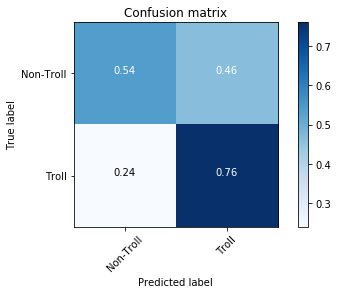

In [154]:
plot_confusion_matrix(confusion_matrix(y_test,sgd_combined_search.predict(X_test_fin)),['Non-Troll','Troll'], normalize = True )


# Combining Text and non-text models

In [175]:
# Non text
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, train_size =.75, random_state = 19)
X_train_res, y_train_res = rus.fit_sample(X_train, y_train)


## Best Non Text Models

             precision    recall  f1-score   support

          0       0.97      0.87      0.92     94658
          1       0.36      0.75      0.49      9382

avg / total       0.92      0.86      0.88    104040

Normalized confusion matrix
[[0.86856895 0.13143105]
 [0.24984012 0.75015988]]


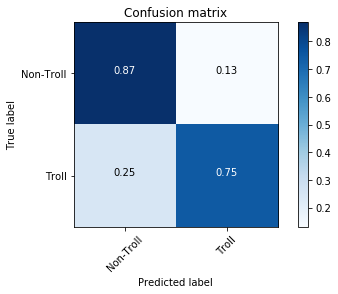

In [176]:
sgd_scaled_res = SGDClassifier('modified_huber','l1',0.0001,max_iter =5, random_state=19)
sgd_scaled_res_model = sgd_scaled_res.fit(X_train_res,y_train_res)
sgd_cm = confusion_matrix(y_test, sgd_scaled_res_model.predict(X_test))
print(classification_report(y_test, sgd_scaled_res_model.predict(X_test)))
plot_confusion_matrix(sgd_cm, class_names, normalize = True)

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     94658
          1       0.87      0.57      0.68      9382

avg / total       0.95      0.95      0.95    104040

Normalized confusion matrix
[[0.99129498 0.00870502]
 [0.43423577 0.56576423]]


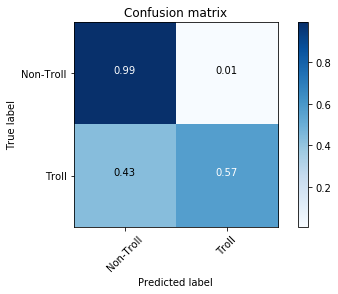

In [177]:
sgd_scaled = SGDClassifier('modified_huber','l1',0.0001,max_iter =5, random_state=19)
sgd_scaled_model = sgd_scaled.fit(X_train,y_train)
sgd_cm = confusion_matrix(y_test, sgd_scaled_model.predict(X_test))
print(classification_report(y_test, sgd_scaled_model.predict(X_test)))
plot_confusion_matrix(sgd_cm, class_names, normalize = True)

## Best Text Model

In [ ]:
{'alpha': 0.0001,
 'loss': 'modified_huber',
 'max_iter': 5,
 'penalty': 'l1',
 'random_state': 19}

In [213]:

X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(text_data_tfidf_sw,target,train_size=.75, random_state=19,stratify=target)
rus_sw=RandomUnderSampler(random_state=19)
X_train_res_sw,y_train_res_sw=rus_sw.fit_sample(X_train_sw,y_train_sw)

             precision    recall  f1-score   support

          0       0.97      0.77      0.86     94586
          1       0.25      0.79      0.38      9454

avg / total       0.91      0.77      0.82    104040

Normalized confusion matrix
[[0.76778804 0.23221196]
 [0.21218532 0.78781468]]


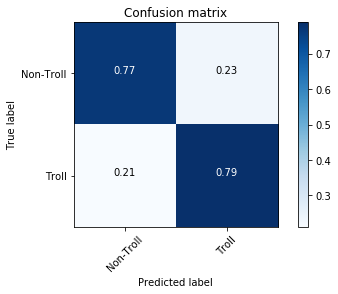

In [214]:
sgd_text = SGDClassifier('modified_huber','l1',0.0001,max_iter =5, random_state=19)
sgd_text_model = sgd_text.fit(X_train_res_sw,y_train_res_sw)
sgd_text_cm = confusion_matrix(y_test_sw, sgd_text_model.predict(X_test_sw))
print(classification_report(y_test_sw, sgd_text_model.predict(X_test_sw)))
plot_confusion_matrix(sgd_text_cm, class_names, normalize = True)


In [180]:
nt_sensitive_train = sgd_scaled_res_model.predict_proba(X_train_res)
nt_sensitive_test = sgd_scaled_res_model.predict_proba(X_test)

# nt_conservative_train = sgd_scaled_model.predict_proba(X_train)
# nt_conservative_test = sgd_scaled_model.predict_proba(X_test)

t_train = sgd_text_model.predict_proba(X_train_res_sw)
t_test = sgd_text_model.predict_proba(X_test_sw)



In [185]:
text_data_tfidf_sw.shape

(416157, 68995)

In [186]:
scaled_features.shape

(416157, 5)

In [229]:
features.columns

Index(['index', 'favorite_count', 'hashtags_count', 'mentions_count',
       'retweet_count', 'retweeted', 'text'],
      dtype='object')

In [244]:
data.reset_index(inplace=True)

In [219]:
features=data.drop(columns=['target','created_str','date_time','hashtags','mentions','lang','tweet_id','tweet_id_str','user_id'],axis=1)
target=data.target

In [284]:
text_df = features[['text']]

In [293]:
cv = CountVectorizer(stop_words=stopwords_list)
tfidf = TfidfTransformer(use_idf = True)
cv.fit(text_df.text)
dummy_vocab = cv.transform(text_df.text)
tfidf.fit(dummy_vocab)


tf = TfidfTransformer(use_idf = False)
tf.fit(dummy_vocab)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False,
         use_idf=False)

In [294]:
dummy_vocab.shape

(416157, 68995)

In [287]:
features_train,features_test,y_train,y_test=train_test_split(features,target,random_state=19,train_size=.75)


/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [307]:
scaler = StandardScaler()
scaler.fit(features.drop(columns = ["text","index"], axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [221]:
rus=RandomUnderSampler(random_state=19)
features_train_res,y_train_res=rus.fit_sample(features_train.drop(columns=['text'],axis=1),y_train)


In [224]:
features_train_res[:,0]

array([ 84779., 355643., 241442., ...,   8900.,  35633.,  10088.])

In [248]:
non_text_train_res=pd.DataFrame(features_train_res,columns=features.columns[0:-1])


In [249]:
non_text_train_res.head()

index  favorite_count  hashtags_count  mentions_count  retweet_count  \
0   84779.0             0.0             0.0             1.0            0.0   
1  355643.0             4.0             0.0             1.0            2.0   
2  241442.0             0.0             0.0             2.0           99.0   
3  149697.0             0.0             0.0             1.0        96317.0   
4  308671.0             0.0             1.0             1.0          578.0   

   retweeted  
0        0.0  
1        0.0  
2        1.0  
3        1.0  
4        1.0

In [304]:
nt_test = features_test.drop(columns = ['index', 'text'], axis = 1)

In [305]:
nt_train_res = non_text_train_res.drop(columns = ['index'], axis = 1)


In [308]:
nt_test = scaler.transform(nt_test)
nt_train_res = scaler.transform(nt_train_res)

             precision    recall  f1-score   support

          0       0.97      0.87      0.92     94658
          1       0.36      0.75      0.49      9382

avg / total       0.92      0.86      0.88    104040

Normalized confusion matrix
[[0.86856895 0.13143105]
 [0.24984012 0.75015988]]


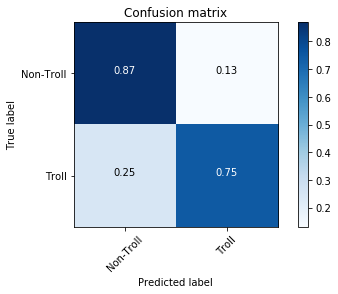

In [309]:
sgd_scaled_res = SGDClassifier('modified_huber','l1',0.0001,max_iter =5, random_state=19)
sgd_scaled_res_model = sgd_scaled_res.fit(nt_train_res,y_train_res)
sgd_cm = confusion_matrix(y_test, sgd_scaled_res_model.predict(nt_test))
print(classification_report(y_test, sgd_scaled_res_model.predict(nt_test)))
plot_confusion_matrix(sgd_cm, class_names, normalize = True)

In [311]:
nt_test_pred =  sgd_scaled_res_model.predict_proba(nt_test)
nt_train_pred = sgd_scaled_res_model.predict_proba(nt_train_res)

## Text

In [251]:
features_text = features[['text']]

In [253]:
features_text.head()

text
0              I don't have to guess your religion! 
1   Pence and his lawyers decided which of his of...
2   . Scores FIRST  Hot 100 Hit With "Bad And Bou...
3   The Marco Rubio knockdown of Elizabeth Warren...
4                    This week's "Sweden incident."

In [254]:
features_text.reset_index(inplace = True)

In [255]:
features_text.head()

index                                               text
0      0              I don't have to guess your religion! 
1      1   Pence and his lawyers decided which of his of...
2      2   . Scores FIRST  Hot 100 Hit With "Bad And Bou...
3      3   The Marco Rubio knockdown of Elizabeth Warren...
4      4                    This week's "Sweden incident."

In [257]:
text_train_res=pd.merge(non_text_train_res,features_text,how='left', left_on = 'index',right_on = 'index')
text_train_res.shape

(56870, 7)

In [258]:
non_text_train_res.shape

(56870, 6)

In [261]:
text_train_res = text_train_res[["index","text"]]

In [263]:
text_train_res.head()

index                                               text
0   84779.0  Why I Switched My Endorsement from Clinton to ...
1  355643.0  Ted Cruz to Campaign with Gov. Mike Pence for ...
2  241442.0   It's been a week since Trump told  that entir...
3  149697.0   How are so many people JUST NOW offended by T...
4  308671.0    Hillary's OWN team admitted the Clinton Foun...

In [264]:
stopwords_list=stopwords.words('english') +list(string.punctuation)
stopwords_list += ["'",'"','...','``','…','’','‘','“',"''",'""','”','”',"'s'",'\'s','n\'t','\'m','\'re','amp','https']

### Train

In [295]:
data_counts_train = cv.transform(text_train_res["text"])
data_counts_train.shape

(56870, 68995)

In [296]:
tf_train = tf.transform(data_counts_train)
tf_train.shape


(56870, 68995)

In [297]:
tfidf_train = tfidf.transform(data_counts_train)
tfidf_train.shape


(56870, 68995)

## Test

In [298]:

data_counts_test = cv.transform(features_test["text"])
data_counts_test.shape


(104040, 68995)

In [299]:
tf_test = tf.transform(data_counts_test)
tf_test.shape



(104040, 68995)

In [300]:
tfidf_test = tfidf.transform(data_counts_test)
tfidf_test.shape



(104040, 68995)

# tf Model

             precision    recall  f1-score   support

          0       0.97      0.78      0.86     94658
          1       0.25      0.76      0.38      9382

avg / total       0.91      0.78      0.82    104040

Normalized confusion matrix
[[0.77875087 0.22124913]
 [0.23715626 0.76284374]]


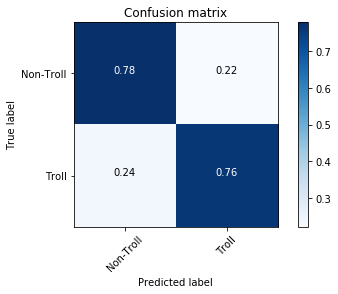

In [302]:
sgd_text_tf = SGDClassifier('modified_huber','l1',0.0001,max_iter =5, random_state=19)
sgd_text_tf_model = sgd_text_tf.fit(tf_train,y_train_res)
sgd_text_tf_cm = confusion_matrix(y_test, sgd_text_tf_model.predict(tf_test))
print(classification_report(y_test, sgd_text_tf_model.predict(tf_test)))
plot_confusion_matrix(sgd_text_tf_cm, class_names, normalize = True)


             precision    recall  f1-score   support

          0       0.97      0.76      0.85     94658
          1       0.24      0.77      0.37      9382

avg / total       0.91      0.76      0.81    104040

Normalized confusion matrix
[[0.75981956 0.24018044]
 [0.22873588 0.77126412]]


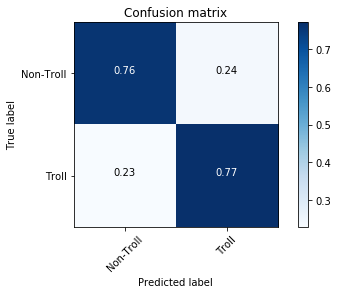

In [303]:
sgd_text_tfidf = SGDClassifier('modified_huber','l1',0.0001,max_iter =5, random_state=19)
sgd_text_tfidf_model = sgd_text_tfidf.fit(tfidf_train,y_train_res)
sgd_text_tfidf_cm = confusion_matrix(y_test, sgd_text_tfidf_model.predict(tfidf_test))
print(classification_report(y_test, sgd_text_tfidf_model.predict(tfidf_test)))
plot_confusion_matrix(sgd_text_tfidf_cm, class_names, normalize = True)


In [312]:
tfidf_test_pred =  sgd_text_tfidf_model.predict_proba(tfidf_test)
tfidf_train_pred = sgd_text_tfidf_model.predict_proba(tfidf_train)

In [313]:
tf_test_pred =  sgd_text_tf_model.predict_proba(tf_test)
tf_train_pred = sgd_text_tf_model.predict_proba(tf_train)

In [369]:
def predict(function,weight=1,nt_pred=nt_test_pred,tf_pred=tf_test_pred,tfidf_pred=tfidf_test_pred,y_test=y_test):
    tf_votes = function(nt_pred*weight,tf_pred)
    tfidf_votes = function(nt_pred*weight,tfidf_pred)
    print('TF Values:')
    plot_confusion_matrix(confusion_matrix(y_test,tf_votes))
    
    print('TFIDF Values:')
    plot_confusion_matrix(confusion_matrix(y_test,tfidf_votes))
    
def pred_geometric(non_text,text):
    votes = []
    for nt_pred,t_pred in zip(non_text,text):
        vote_null = (nt_pred[0]*t_pred[0])**.5
        vote_troll = (nt_pred[1]*t_pred[1])**.5
        votes.append(0 if vote_null>vote_troll else 1)
    return votes 

def pred_harmonic(non_text,text):
    votes = []
    for nt_pred,t_pred in zip(non_text,text):
        vote_null = 2*nt_pred[0]*t_pred[0]/(nt_pred[0]+t_pred[0])
        vote_troll = 2*nt_pred[1]*t_pred[1]/(nt_pred[1]+t_pred[1])
        votes.append(0 if vote_null>vote_troll else 1)
    return votes    

def pred_confidence(non_text,text):
    votes = []
    for nt_pred,t_pred in zip(non_text,text):
        vote_text = t_pred[1]-t_pred[0]
        vote_nt = nt_pred[1]-nt_pred[0]
        votes.append(1 if vote_text+vote_nt>0 else 0)
    return votes  

def pred_max(non_text,text):
    votes = []
    for nt_pred,t_pred in zip(non_text,text):
        vote = nt_pred+t_pred
        votes.append(0 if vote[0]>vote[1] else 1)
    return votes    

def decision_func(weight=1, non_text=nt_test_pred,text=tfidf_test_pred):
    confidences = []
    for nt_pred,t_pred in zip(non_text,text):
        vote = nt_pred+t_pred
        confidences.append(vote[1])
    return confidences
    

In [363]:
tf_test_pred

array([[0.69176924, 0.30823076],
       [0.78987502, 0.21012498],
       [0.15761372, 0.84238628],
       ...,
       [1.        , 0.        ],
       [0.26257155, 0.73742845],
       [1.        , 0.        ]])

TF Values:
Normalized confusion matrix
[[0.93051829 0.06948171]
 [0.29354082 0.70645918]]


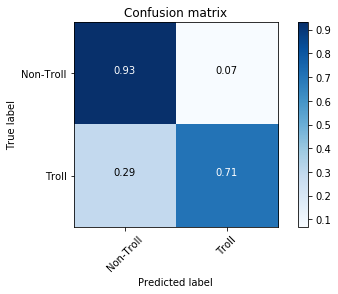

TFIDF Values:
Normalized confusion matrix
[[0.92185552 0.07814448]
 [0.28618631 0.71381369]]


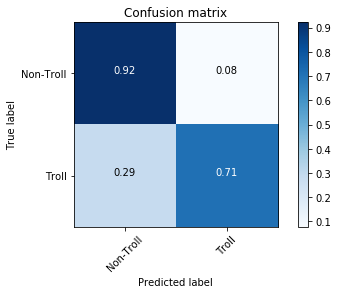

In [345]:
predict(pred_max,weight=2)

TF Values:
Normalized confusion matrix
[[0.91367872 0.08632128]
 [0.26689405 0.73310595]]


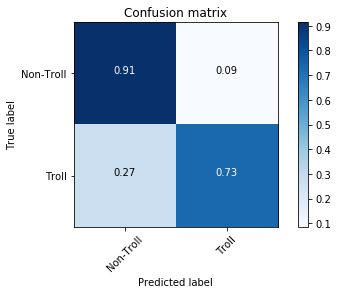

TFIDF Values:
Normalized confusion matrix
[[0.90787889 0.09212111]
 [0.26508207 0.73491793]]


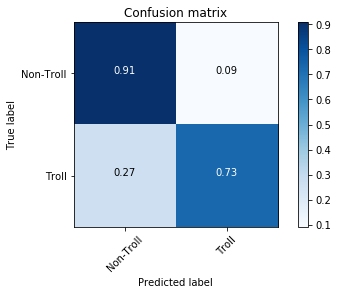

In [353]:
predict(pred_max,weight=3)

TF Values:
Normalized confusion matrix
[[0.93647658 0.06352342]
 [0.32551695 0.67448305]]


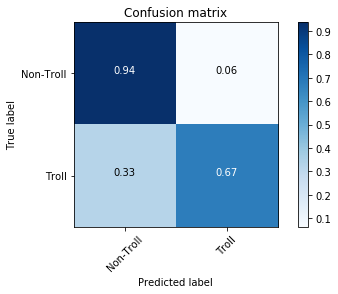

TFIDF Values:
Normalized confusion matrix
[[0.9261869  0.0738131 ]
 [0.31048817 0.68951183]]


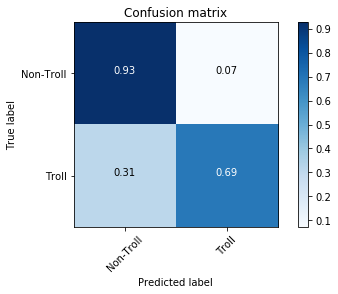

In [326]:
predict(pred_geometric)

/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/Users/carolinevanacore/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


TF Values:
Normalized confusion matrix
[[0.84185172 0.15814828]
 [0.32199957 0.67800043]]


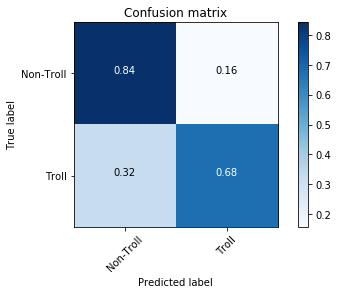

TFIDF Values:
Normalized confusion matrix
[[0.82938579 0.17061421]
 [0.30675762 0.69324238]]


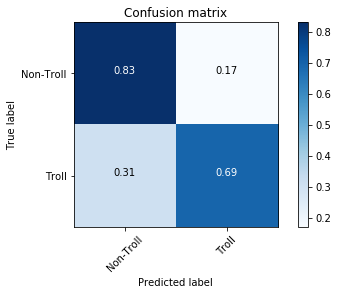

In [327]:
predict(pred_harmonic)

TF Values:
Normalized confusion matrix
[[0.94077627 0.05922373]
 [0.33276487 0.66723513]]


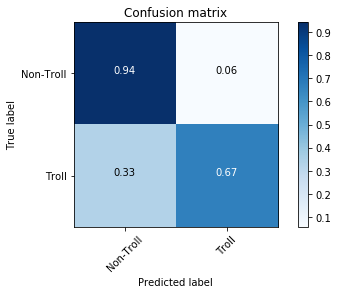

TFIDF Values:
Normalized confusion matrix
[[0.9327368  0.0672632 ]
 [0.31805585 0.68194415]]


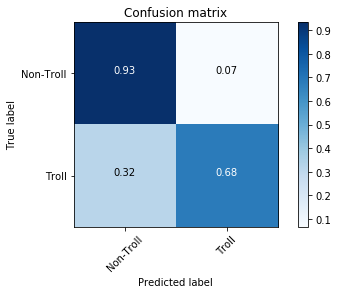

In [329]:
predict(pred_confidence)

In [464]:
y_score = decision_func(weight = 2)

In [465]:
from sklearn.metrics import roc_curve, auc

#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# y_train_score = model_log.decision_function(X_train)
# train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

AUC: 0.9176686769674736


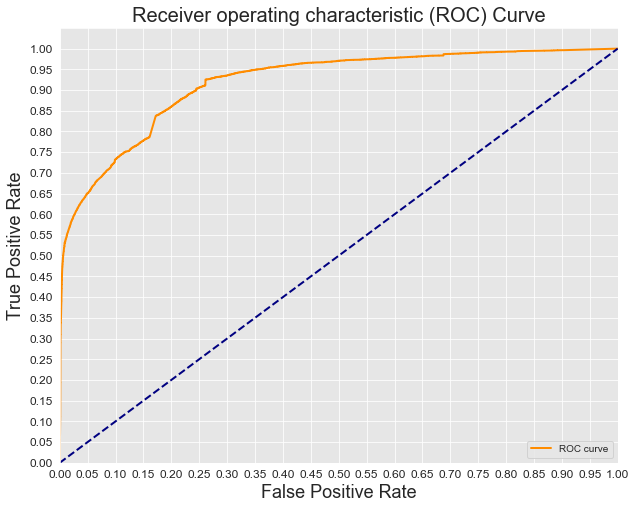

In [466]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)], fontsize = 12)
plt.xticks([i/20.0 for i in range(21)], fontsize = 12)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic (ROC) Curve', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

In [273]:
# check value counts for retweet count in troll and non troll data set 


AttributeError: 'numpy.ndarray' object has no attribute 'head'

level_0           0
index             0
created_str       0
date_time         0
favorite_count    0
hashtags          0
hashtags_count    0
lang              0
mentions          0
mentions_count    0
retweet_count     0
retweeted         0
target            0
text              0
tweet_id          0
tweet_id_str      0
user_id           0
dtype: int64

In [282]:
data.shape

(416157, 17)